In [1]:
%run dataImport.ipynb
%run Plots.ipynb
%run HelperFunctions.ipynb
%run tsMetrics.ipynb
from tabulate import tabulate
import pandas as pd
import numpy as np

In [2]:
df_or = pd.read_csv("time_series.csv")
df_train = pd.read_csv("train_df.csv")
df_test = pd.read_csv("test_df.csv")
# predict quarterly
time_horizon = 360

In [3]:
energy_demand = df_or["Aktueller_Strombezug_kW"].to_numpy() 
min_energy = energy_demand.min()
max_energy = energy_demand.max()

In [4]:
def normalize(df, var):
    x = (df[var]-df[var].min())/(df[var].max()-df[var].min())
    df[var] = x  

def denormalize(ynorm, maximum, minimum):
    denorm = (ynorm * (maximum - minimum)) + minimum
    return denorm

normalize(df_or, "Aktueller_Strombezug_kW")
normalize(df_train, "Aktueller_Strombezug_kW")
normalize(df_test, "Aktueller_Strombezug_kW")

In [10]:
seeds = [1,2,3,4,5,6,7,8,9,10]

# FLAML

In [6]:
df_train.Datetime=pd.to_datetime(df_train.Datetime, infer_datetime_format=True)

[flaml.automl.logger: 07-27 15:00:20] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 15:00:20] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 15:00:20] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 15:00:20] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 15:00:20] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'prophet', 'arima', 'sarimax', 'holt-winters']
[flaml.automl.logger: 07-27 15:00:20] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 07-27 15:00:21] {2347} INFO - Estimated sufficient time budget=1980s. Estimated necessary time budget=2s.
[flaml.automl.logger: 07-27 15:00:21] {2394} INFO -  at 0.3s,	estimator lgbm's best error=0.1127,	best estimator lgbm's best error=0.1127
[flaml.automl.logger: 07-27 15:00:21] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 07-27 15:00:21] {2394} INFO -  at 0.3s,	estim

15:00:24 - cmdstanpy - INFO - Chain [1] start processing
15:00:27 - cmdstanpy - INFO - Chain [1] done processing
15:00:28 - cmdstanpy - INFO - Chain [1] start processing
15:00:32 - cmdstanpy - INFO - Chain [1] done processing
15:00:33 - cmdstanpy - INFO - Chain [1] start processing
15:00:35 - cmdstanpy - INFO - Chain [1] done processing
15:00:36 - cmdstanpy - INFO - Chain [1] start processing
15:00:40 - cmdstanpy - INFO - Chain [1] done processing
15:00:41 - cmdstanpy - INFO - Chain [1] start processing
15:00:45 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:00:45] {2394} INFO -  at 25.0s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:00:45] {2221} INFO - iteration 15, current learner arima
[flaml.automl.logger: 07-27 15:01:39] {2394} INFO -  at 78.9s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:01:39] {2221} INFO - iteration 16, current learner sarimax
[flaml.automl.logger: 07-27 15:07:10] {2394} INFO -  at 409.8s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:10] {2221} INFO - iteration 17, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:07:14] {2394} INFO -  at 413.2s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:14] {2221} INFO - iteration 18, current learner extra_tree
[flaml.automl.logger: 07-27 15:07:14] {2394} INFO -  at 413.3s,	estimator extra_tree's best error=0.0475,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:14] {2221} INFO - iteration 19, current learner extra_tree
[flaml.automl.logger: 07-27 15:07:14] {2394} INFO -  at 413.4s,	estimator extra_tree's best error=0.0475,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:14] {2221} INFO - iteration 20, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 15:07:14] {2394} INFO -  at 413.6s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:14] {2221} INFO - iteration 21, current learner xgboost
[flaml.automl.logger: 07-

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:07:21] {2394} INFO -  at 420.6s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:21] {2221} INFO - iteration 34, current learner arima
[flaml.automl.logger: 07-27 15:07:52] {2394} INFO -  at 451.7s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:52] {2221} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 07-27 15:07:52] {2394} INFO -  at 452.0s,	estimator lgbm's best error=0.0319,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:52] {2221} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 07-27 15:07:53] {2394} INFO -  at 452.4s,	estimator lgbm's best error=0.0319,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:07:53] {2221} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 07-27 15:07:53] {2394} INFO -  at 452.7s,	estima

15:09:24 - cmdstanpy - INFO - Chain [1] start processing
15:09:27 - cmdstanpy - INFO - Chain [1] done processing
15:09:28 - cmdstanpy - INFO - Chain [1] start processing
15:09:31 - cmdstanpy - INFO - Chain [1] done processing
15:09:32 - cmdstanpy - INFO - Chain [1] start processing
15:09:35 - cmdstanpy - INFO - Chain [1] done processing
15:09:36 - cmdstanpy - INFO - Chain [1] start processing
15:09:39 - cmdstanpy - INFO - Chain [1] done processing
15:09:40 - cmdstanpy - INFO - Chain [1] start processing
15:09:44 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:09:45] {2394} INFO -  at 564.2s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:09:45] {2221} INFO - iteration 46, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:09:48] {2394} INFO -  at 567.7s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:09:48] {2221} INFO - iteration 47, current learner lgbm
[flaml.automl.logger: 07-27 15:09:48] {2394} INFO -  at 567.7s,	estimator lgbm's best error=0.0098,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:09:48] {2221} INFO - iteration 48, current learner prophet


15:09:48 - cmdstanpy - INFO - Chain [1] start processing
15:09:53 - cmdstanpy - INFO - Chain [1] done processing
15:09:53 - cmdstanpy - INFO - Chain [1] start processing
15:09:58 - cmdstanpy - INFO - Chain [1] done processing
15:09:59 - cmdstanpy - INFO - Chain [1] start processing
15:10:04 - cmdstanpy - INFO - Chain [1] done processing
15:10:05 - cmdstanpy - INFO - Chain [1] start processing
15:10:10 - cmdstanpy - INFO - Chain [1] done processing
15:10:11 - cmdstanpy - INFO - Chain [1] start processing
15:10:16 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:10:17] {2394} INFO -  at 596.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:10:17] {2221} INFO - iteration 49, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:10:20] {2394} INFO -  at 599.7s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:10:20] {2221} INFO - iteration 50, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 15:10:22] {2394} INFO -  at 601.9s,	estimator xgb_limitdepth's best error=0.0065,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:10:22] {2221} INFO - iteration 51, current learner xgboost
[flaml.automl.logger: 07-27 15:10:24] {2394} INFO -  at 604.0s,	estimator xgboost's best error=0.0101,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:10:24] {2221} INFO - iteration 52, current learner prophet


15:10:25 - cmdstanpy - INFO - Chain [1] start processing
15:10:28 - cmdstanpy - INFO - Chain [1] done processing
15:10:28 - cmdstanpy - INFO - Chain [1] start processing
15:10:32 - cmdstanpy - INFO - Chain [1] done processing
15:10:33 - cmdstanpy - INFO - Chain [1] start processing
15:10:36 - cmdstanpy - INFO - Chain [1] done processing
15:10:37 - cmdstanpy - INFO - Chain [1] start processing
15:10:41 - cmdstanpy - INFO - Chain [1] done processing
15:10:42 - cmdstanpy - INFO - Chain [1] start processing
15:10:45 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:10:46] {2394} INFO -  at 625.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:10:46] {2221} INFO - iteration 53, current learner rf
[flaml.automl.logger: 07-27 15:10:47] {2394} INFO -  at 626.1s,	estimator rf's best error=0.0202,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:10:47] {2221} INFO - iteration 54, current learner extra_tree
[flaml.automl.logger: 07-27 15:10:47] {2394} INFO -  at 626.3s,	estimator extra_tree's best error=0.0118,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:10:47] {2221} INFO - iteration 55, current learner extra_tree
[flaml.automl.logger: 07-27 15:10:47] {2394} INFO -  at 626.4s,	estimator extra_tree's best error=0.0118,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:10:47] {2221} INFO - iteration 56, current learner extra_tree
[flaml.automl.logger: 07-27 15:10:47] {2394} INFO -

15:10:53 - cmdstanpy - INFO - Chain [1] start processing
15:10:57 - cmdstanpy - INFO - Chain [1] done processing
15:10:58 - cmdstanpy - INFO - Chain [1] start processing
15:11:03 - cmdstanpy - INFO - Chain [1] done processing
15:11:04 - cmdstanpy - INFO - Chain [1] start processing
15:11:08 - cmdstanpy - INFO - Chain [1] done processing
15:11:09 - cmdstanpy - INFO - Chain [1] start processing
15:11:13 - cmdstanpy - INFO - Chain [1] done processing
15:11:14 - cmdstanpy - INFO - Chain [1] start processing
15:11:21 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:11:21] {2394} INFO -  at 661.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:21] {2221} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 07-27 15:11:25] {2394} INFO -  at 664.6s,	estimator xgboost's best error=0.0076,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:25] {2221} INFO - iteration 73, current learner lgbm
[flaml.automl.logger: 07-27 15:11:25] {2394} INFO -  at 664.7s,	estimator lgbm's best error=0.0091,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:25] {2221} INFO - iteration 74, current learner lgbm
[flaml.automl.logger: 07-27 15:11:26] {2394} INFO -  at 665.2s,	estimator lgbm's best error=0.0091,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:26] {2221} INFO - iteration 75, current learner xgboost
[flaml.automl.logger: 07-27 15:11:27] {2394} INFO -  at 666.4s,	esti

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:11:28] {2394} INFO -  at 667.3s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:28] {2221} INFO - iteration 78, current learner rf
[flaml.automl.logger: 07-27 15:11:28] {2394} INFO -  at 667.8s,	estimator rf's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:28] {2221} INFO - iteration 79, current learner prophet


15:11:28 - cmdstanpy - INFO - Chain [1] start processing
15:11:33 - cmdstanpy - INFO - Chain [1] done processing
15:11:34 - cmdstanpy - INFO - Chain [1] start processing
15:11:39 - cmdstanpy - INFO - Chain [1] done processing
15:11:40 - cmdstanpy - INFO - Chain [1] start processing
15:11:45 - cmdstanpy - INFO - Chain [1] done processing
15:11:46 - cmdstanpy - INFO - Chain [1] start processing
15:11:50 - cmdstanpy - INFO - Chain [1] done processing
15:11:51 - cmdstanpy - INFO - Chain [1] start processing
15:11:58 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:11:58] {2394} INFO -  at 697.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:58] {2221} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 07-27 15:11:58] {2394} INFO -  at 698.1s,	estimator lgbm's best error=0.0091,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:58] {2221} INFO - iteration 81, current learner lgbm
[flaml.automl.logger: 07-27 15:11:59] {2394} INFO -  at 698.8s,	estimator lgbm's best error=0.0070,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:11:59] {2221} INFO - iteration 82, current learner rf
[flaml.automl.logger: 07-27 15:12:00] {2394} INFO -  at 699.2s,	estimator rf's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:12:00] {2221} INFO - iteration 83, current learner rf
[flaml.automl.logger: 07-27 15:12:00] {2394} INFO -  at 700.0s,	estimator rf's best

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:12:04] {2394} INFO -  at 703.7s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:12:04] {2221} INFO - iteration 86, current learner rf
[flaml.automl.logger: 07-27 15:12:04] {2394} INFO -  at 704.0s,	estimator rf's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:12:04] {2221} INFO - iteration 87, current learner xgboost
[flaml.automl.logger: 07-27 15:12:06] {2394} INFO -  at 705.9s,	estimator xgboost's best error=0.0076,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:12:06] {2221} INFO - iteration 88, current learner xgboost
[flaml.automl.logger: 07-27 15:12:10] {2394} INFO -  at 709.8s,	estimator xgboost's best error=0.0076,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:12:10] {2221} INFO - iteration 89, current learner sarimax
[flaml.automl.logger: 07-27 15:16:50] {2394} INFO -  at 989.8

15:16:52 - cmdstanpy - INFO - Chain [1] start processing
15:16:55 - cmdstanpy - INFO - Chain [1] done processing
15:16:56 - cmdstanpy - INFO - Chain [1] start processing
15:16:59 - cmdstanpy - INFO - Chain [1] done processing
15:17:00 - cmdstanpy - INFO - Chain [1] start processing
15:17:04 - cmdstanpy - INFO - Chain [1] done processing
15:17:05 - cmdstanpy - INFO - Chain [1] start processing
15:17:09 - cmdstanpy - INFO - Chain [1] done processing
15:17:10 - cmdstanpy - INFO - Chain [1] start processing
15:17:14 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:17:15] {2394} INFO -  at 1014.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:17:15] {2221} INFO - iteration 95, current learner extra_tree
[flaml.automl.logger: 07-27 15:17:15] {2394} INFO -  at 1014.8s,	estimator extra_tree's best error=0.0066,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:17:15] {2221} INFO - iteration 96, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:17:16] {2394} INFO -  at 1015.3s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:17:16] {2221} INFO - iteration 97, current learner extra_tree
[flaml.automl.logger: 07-27 15:17:16] {2394} INFO -  at 1015.4s,	estimator extra_tree's best error=0.0059,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:17:16] {2221} INFO - iteration 98, current learner extra_tree
[flaml.automl.logger: 07-27 15:17:16] {2394} INFO -  at 1015.5s,	estimator extra_tree's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:17:16] {2221} INFO - iteration 99, current learner rf
[flaml.automl.logger: 07-27 15:17:16] {2394} INFO -  at 1015.9s,	estimator rf's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:17:16] {2221} INFO - iteration 100, current learner sarimax
[flaml.automl.logger: 07-27 15:21:34] {2394}

15:32:51 - cmdstanpy - INFO - Chain [1] start processing
15:32:56 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:32:56] {2630} INFO - retrain prophet for 5.4s
[flaml.automl.logger: 07-27 15:32:56] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdbade8dea0>
[flaml.automl.logger: 07-27 15:32:56] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 15:32:56] {1942} INFO - Time taken to find the best model: 661.092859506607
Total fitting time:  32m35s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5611.55     \\
 RMSE     &   74.9103   \\
 MAE      &   24.9768   \\
 MAPE     &    0.181922 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 15:32:56] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 15:32:56] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 15:32:56] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 15:32:56] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 15:32:56] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboos

15:33:07 - cmdstanpy - INFO - Chain [1] start processing
15:33:09 - cmdstanpy - INFO - Chain [1] done processing
15:33:10 - cmdstanpy - INFO - Chain [1] start processing
15:33:14 - cmdstanpy - INFO - Chain [1] done processing
15:33:15 - cmdstanpy - INFO - Chain [1] start processing
15:33:18 - cmdstanpy - INFO - Chain [1] done processing
15:33:19 - cmdstanpy - INFO - Chain [1] start processing
15:33:22 - cmdstanpy - INFO - Chain [1] done processing
15:33:23 - cmdstanpy - INFO - Chain [1] start processing
15:33:28 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:33:29] {2394} INFO -  at 32.2s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:33:29] {2221} INFO - iteration 30, current learner arima
[flaml.automl.logger: 07-27 15:34:26] {2394} INFO -  at 89.5s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:34:26] {2221} INFO - iteration 31, current learner sarimax
[flaml.automl.logger: 07-27 15:39:59] {2394} INFO -  at 422.5s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:39:59] {2221} INFO - iteration 32, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:40:02] {2394} INFO -  at 425.9s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:40:02] {2221} INFO - iteration 33, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:40:06] {2394} INFO -  at 429.3s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 15:40:06] {2221} INFO - iteration 34, current learner prophet


15:40:06 - cmdstanpy - INFO - Chain [1] start processing
15:40:10 - cmdstanpy - INFO - Chain [1] done processing
15:40:11 - cmdstanpy - INFO - Chain [1] start processing
15:40:16 - cmdstanpy - INFO - Chain [1] done processing
15:40:17 - cmdstanpy - INFO - Chain [1] start processing
15:40:22 - cmdstanpy - INFO - Chain [1] done processing
15:40:23 - cmdstanpy - INFO - Chain [1] start processing
15:40:29 - cmdstanpy - INFO - Chain [1] done processing
15:40:30 - cmdstanpy - INFO - Chain [1] start processing
15:40:35 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:40:36] {2394} INFO -  at 459.8s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:40:36] {2221} INFO - iteration 35, current learner rf
[flaml.automl.logger: 07-27 15:40:37] {2394} INFO -  at 460.1s,	estimator rf's best error=0.0074,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:40:37] {2221} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 07-27 15:40:37] {2394} INFO -  at 460.2s,	estimator lgbm's best error=0.0386,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:40:37] {2221} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 07-27 15:40:37] {2394} INFO -  at 460.7s,	estimator lgbm's best error=0.0343,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:40:37] {2221} INFO - iteration 38, current learner prophet


15:40:37 - cmdstanpy - INFO - Chain [1] start processing
15:40:42 - cmdstanpy - INFO - Chain [1] done processing
15:40:43 - cmdstanpy - INFO - Chain [1] start processing
15:40:48 - cmdstanpy - INFO - Chain [1] done processing
15:40:49 - cmdstanpy - INFO - Chain [1] start processing
15:40:54 - cmdstanpy - INFO - Chain [1] done processing
15:40:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:00 - cmdstanpy - INFO - Chain [1] done processing
15:41:01 - cmdstanpy - INFO - Chain [1] start processing
15:41:07 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:41:08] {2394} INFO -  at 491.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:41:08] {2221} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 07-27 15:41:09] {2394} INFO -  at 492.2s,	estimator lgbm's best error=0.0343,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:41:09] {2221} INFO - iteration 40, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 15:41:09] {2394} INFO -  at 492.5s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:41:09] {2221} INFO - iteration 41, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:41:12] {2394} INFO -  at 495.9s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:41:12] {2221} INFO - iteration 42, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 15:41:12] {2394} INFO -  at 496.0s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:41:12] {2221} INFO - iteration 43, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 15:41:13] {2394} INFO -  at 496.5s,	estimator xgb_limitdepth's best error=0.0071,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:41:13] {2221} INFO - iteration 44, current learner rf
[flaml.automl.logger: 07-27 15:41:13] {2394} INFO -  at 496.8s,	estimator rf's best error=0.0074,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:41:13] {2221} INFO - iteration 45, current learner xgb_limitdepth
[flaml.automl.logger: 07-2

15:42:30 - cmdstanpy - INFO - Chain [1] start processing
15:42:33 - cmdstanpy - INFO - Chain [1] done processing
15:42:34 - cmdstanpy - INFO - Chain [1] start processing
15:42:38 - cmdstanpy - INFO - Chain [1] done processing
15:42:39 - cmdstanpy - INFO - Chain [1] start processing
15:42:43 - cmdstanpy - INFO - Chain [1] done processing
15:42:44 - cmdstanpy - INFO - Chain [1] start processing
15:42:47 - cmdstanpy - INFO - Chain [1] done processing
15:42:48 - cmdstanpy - INFO - Chain [1] start processing
15:42:52 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:42:53] {2394} INFO -  at 596.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:42:53] {2221} INFO - iteration 49, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:42:56] {2394} INFO -  at 600.0s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:42:56] {2221} INFO - iteration 50, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 15:42:57] {2394} INFO -  at 600.3s,	estimator xgb_limitdepth's best error=0.0071,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:42:57] {2221} INFO - iteration 51, current learner rf
[flaml.automl.logger: 07-27 15:42:57] {2394} INFO -  at 600.8s,	estimator rf's best error=0.0047,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:42:57] {2221} INFO - iteration 52, current learner prophet


15:42:57 - cmdstanpy - INFO - Chain [1] start processing
15:43:02 - cmdstanpy - INFO - Chain [1] done processing
15:43:03 - cmdstanpy - INFO - Chain [1] start processing
15:43:07 - cmdstanpy - INFO - Chain [1] done processing
15:43:08 - cmdstanpy - INFO - Chain [1] start processing
15:43:14 - cmdstanpy - INFO - Chain [1] done processing
15:43:15 - cmdstanpy - INFO - Chain [1] start processing
15:43:22 - cmdstanpy - INFO - Chain [1] done processing
15:43:23 - cmdstanpy - INFO - Chain [1] start processing
15:43:30 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:43:31] {2394} INFO -  at 634.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:43:31] {2221} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 07-27 15:43:32] {2394} INFO -  at 635.3s,	estimator lgbm's best error=0.0091,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:43:32] {2221} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 07-27 15:43:33] {2394} INFO -  at 636.8s,	estimator lgbm's best error=0.0073,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:43:33] {2221} INFO - iteration 55, current learner sarimax
[flaml.automl.logger: 07-27 15:49:52] {2394} INFO -  at 1015.3s,	estimator sarimax's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:49:52] {2221} INFO - iteration 56, current learner rf
[flaml.automl.logger: 07-27 15:49:52] {2394} INFO -  at 1015.7s,	estimat

15:50:04 - cmdstanpy - INFO - Chain [1] start processing
15:50:09 - cmdstanpy - INFO - Chain [1] done processing
15:50:10 - cmdstanpy - INFO - Chain [1] start processing
15:50:14 - cmdstanpy - INFO - Chain [1] done processing
15:50:15 - cmdstanpy - INFO - Chain [1] start processing
15:50:22 - cmdstanpy - INFO - Chain [1] done processing
15:50:22 - cmdstanpy - INFO - Chain [1] start processing
15:50:28 - cmdstanpy - INFO - Chain [1] done processing
15:50:29 - cmdstanpy - INFO - Chain [1] start processing
15:50:34 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:50:35] {2394} INFO -  at 1058.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:50:35] {2221} INFO - iteration 68, current learner arima
[flaml.automl.logger: 07-27 15:51:24] {2394} INFO -  at 1107.6s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:51:24] {2221} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 07-27 15:51:25] {2394} INFO -  at 1108.1s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:51:25] {2221} INFO - iteration 70, current learner extra_tree
[flaml.automl.logger: 07-27 15:51:25] {2394} INFO -  at 1108.3s,	estimator extra_tree's best error=0.0393,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:51:25] {2221} INFO - iteration 71, current learner extra_tree
[flaml.automl.logger: 07-27 15:51:25] {2394} INFO -  

15:51:27 - cmdstanpy - INFO - Chain [1] start processing
15:51:30 - cmdstanpy - INFO - Chain [1] done processing
15:51:31 - cmdstanpy - INFO - Chain [1] start processing
15:51:34 - cmdstanpy - INFO - Chain [1] done processing
15:51:35 - cmdstanpy - INFO - Chain [1] start processing
15:51:38 - cmdstanpy - INFO - Chain [1] done processing
15:51:39 - cmdstanpy - INFO - Chain [1] start processing
15:51:43 - cmdstanpy - INFO - Chain [1] done processing
15:51:44 - cmdstanpy - INFO - Chain [1] start processing
15:51:48 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:51:49] {2394} INFO -  at 1132.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:51:49] {2221} INFO - iteration 86, current learner extra_tree
[flaml.automl.logger: 07-27 15:51:49] {2394} INFO -  at 1132.7s,	estimator extra_tree's best error=0.0055,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:51:49] {2221} INFO - iteration 87, current learner extra_tree
[flaml.automl.logger: 07-27 15:51:49] {2394} INFO -  at 1132.9s,	estimator extra_tree's best error=0.0055,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:51:49] {2221} INFO - iteration 88, current learner extra_tree
[flaml.automl.logger: 07-27 15:51:50] {2394} INFO -  at 1133.1s,	estimator extra_tree's best error=0.0055,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:51:50] {2221} INFO - iteration 89, current learner prophet


15:51:50 - cmdstanpy - INFO - Chain [1] start processing
15:51:53 - cmdstanpy - INFO - Chain [1] done processing
15:51:54 - cmdstanpy - INFO - Chain [1] start processing
15:51:57 - cmdstanpy - INFO - Chain [1] done processing
15:51:58 - cmdstanpy - INFO - Chain [1] start processing
15:52:01 - cmdstanpy - INFO - Chain [1] done processing
15:52:02 - cmdstanpy - INFO - Chain [1] start processing
15:52:06 - cmdstanpy - INFO - Chain [1] done processing
15:52:07 - cmdstanpy - INFO - Chain [1] start processing
15:52:11 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:52:12] {2394} INFO -  at 1155.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:12] {2221} INFO - iteration 90, current learner extra_tree
[flaml.automl.logger: 07-27 15:52:12] {2394} INFO -  at 1155.5s,	estimator extra_tree's best error=0.0048,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:12] {2221} INFO - iteration 91, current learner prophet


15:52:12 - cmdstanpy - INFO - Chain [1] start processing
15:52:16 - cmdstanpy - INFO - Chain [1] done processing
15:52:17 - cmdstanpy - INFO - Chain [1] start processing
15:52:22 - cmdstanpy - INFO - Chain [1] done processing
15:52:23 - cmdstanpy - INFO - Chain [1] start processing
15:52:29 - cmdstanpy - INFO - Chain [1] done processing
15:52:30 - cmdstanpy - INFO - Chain [1] start processing
15:52:36 - cmdstanpy - INFO - Chain [1] done processing
15:52:37 - cmdstanpy - INFO - Chain [1] start processing
15:52:43 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:52:44] {2394} INFO -  at 1187.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:44] {2221} INFO - iteration 92, current learner extra_tree
[flaml.automl.logger: 07-27 15:52:44] {2394} INFO -  at 1187.7s,	estimator extra_tree's best error=0.0048,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:44] {2221} INFO - iteration 93, current learner extra_tree
[flaml.automl.logger: 07-27 15:52:44] {2394} INFO -  at 1187.9s,	estimator extra_tree's best error=0.0048,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:44] {2221} INFO - iteration 94, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:52:45] {2394} INFO -  at 1188.4s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:45] {2221} INFO - iteration 95, current learner extra_tree
[flaml.automl.logger: 07-27 15:52:45] {2394} INFO -  at 1188.8s,	estimator extra_tree's best error=0.0048,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:45] {2221} INFO - iteration 96, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:52:46] {2394} INFO -  at 1189.5s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:46] {2221} INFO - iteration 97, current learner extra_tree
[flaml.automl.logger: 07-27 15:52:46] {2394} INFO -  at 1189.8s,	estimator extra_tree's best error=0.0042,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:46] {2221} INFO - iteration 98, current learner extra_tree
[flaml.automl.logger: 07-27 15:52:46] {2394} INFO -  at 1190.1s,	estimator extra_tree's best error=0.0042,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:46] {2221} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 07-27 15:52:47] {2394} INFO -  at 1190.4s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:52:47] {2221} INFO - iteration 100, current learner arima
[flaml.automl.logger: 07-27 15:53:41] {239

15:53:44 - cmdstanpy - INFO - Chain [1] start processing
15:53:47 - cmdstanpy - INFO - Chain [1] done processing
15:53:48 - cmdstanpy - INFO - Chain [1] start processing
15:53:52 - cmdstanpy - INFO - Chain [1] done processing
15:53:53 - cmdstanpy - INFO - Chain [1] start processing
15:53:57 - cmdstanpy - INFO - Chain [1] done processing
15:53:58 - cmdstanpy - INFO - Chain [1] start processing
15:54:02 - cmdstanpy - INFO - Chain [1] done processing
15:54:03 - cmdstanpy - INFO - Chain [1] start processing
15:54:07 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:54:08] {2394} INFO -  at 1271.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:54:08] {2221} INFO - iteration 106, current learner extra_tree
[flaml.automl.logger: 07-27 15:54:08] {2394} INFO -  at 1271.8s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:54:08] {2221} INFO - iteration 107, current learner lgbm
[flaml.automl.logger: 07-27 15:54:11] {2394} INFO -  at 1274.5s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:54:11] {2221} INFO - iteration 108, current learner extra_tree
[flaml.automl.logger: 07-27 15:54:11] {2394} INFO -  at 1274.9s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:54:11] {2221} INFO - iteration 109, current learner rf
[flaml.automl.logger: 07-27 15:54:12] {2394} IN

15:54:13 - cmdstanpy - INFO - Chain [1] start processing
15:54:19 - cmdstanpy - INFO - Chain [1] done processing
15:54:20 - cmdstanpy - INFO - Chain [1] start processing
15:54:24 - cmdstanpy - INFO - Chain [1] done processing
15:54:25 - cmdstanpy - INFO - Chain [1] start processing
15:54:29 - cmdstanpy - INFO - Chain [1] done processing
15:54:30 - cmdstanpy - INFO - Chain [1] start processing
15:54:37 - cmdstanpy - INFO - Chain [1] done processing
15:54:38 - cmdstanpy - INFO - Chain [1] start processing
15:54:45 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:54:46] {2394} INFO -  at 1309.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:54:46] {2221} INFO - iteration 112, current learner rf
[flaml.automl.logger: 07-27 15:54:48] {2394} INFO -  at 1311.9s,	estimator rf's best error=0.0041,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:54:48] {2221} INFO - iteration 113, current learner prophet


15:54:49 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing
15:54:54 - cmdstanpy - INFO - Chain [1] start processing
15:55:00 - cmdstanpy - INFO - Chain [1] done processing
15:55:01 - cmdstanpy - INFO - Chain [1] start processing
15:55:07 - cmdstanpy - INFO - Chain [1] done processing
15:55:07 - cmdstanpy - INFO - Chain [1] start processing
15:55:14 - cmdstanpy - INFO - Chain [1] done processing
15:55:15 - cmdstanpy - INFO - Chain [1] start processing
15:55:20 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:55:21] {2394} INFO -  at 1344.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:55:21] {2221} INFO - iteration 114, current learner extra_tree
[flaml.automl.logger: 07-27 15:55:21] {2394} INFO -  at 1344.7s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:55:21] {2221} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 07-27 15:55:22] {2394} INFO -  at 1345.4s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:55:22] {2221} INFO - iteration 116, current learner arima
[flaml.automl.logger: 07-27 15:56:15] {2394} INFO -  at 1398.4s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:56:15] {2221} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 15:56:15] {2394} 

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 15:56:19] {2394} INFO -  at 1402.2s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:56:19] {2221} INFO - iteration 119, current learner lgbm
[flaml.automl.logger: 07-27 15:56:20] {2394} INFO -  at 1403.3s,	estimator lgbm's best error=0.0050,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:56:20] {2221} INFO - iteration 120, current learner rf
[flaml.automl.logger: 07-27 15:56:22] {2394} INFO -  at 1405.3s,	estimator rf's best error=0.0039,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:56:22] {2221} INFO - iteration 121, current learner arima
[flaml.automl.logger: 07-27 15:57:21] {2394} INFO -  at 1464.2s,	estimator arima's best error=0.0021,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:57:21] {2221} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 15:57:23] {2394} INFO -  at 

15:57:25 - cmdstanpy - INFO - Chain [1] start processing
15:57:28 - cmdstanpy - INFO - Chain [1] done processing
15:57:29 - cmdstanpy - INFO - Chain [1] start processing
15:57:32 - cmdstanpy - INFO - Chain [1] done processing
15:57:33 - cmdstanpy - INFO - Chain [1] start processing
15:57:37 - cmdstanpy - INFO - Chain [1] done processing
15:57:38 - cmdstanpy - INFO - Chain [1] start processing
15:57:42 - cmdstanpy - INFO - Chain [1] done processing
15:57:43 - cmdstanpy - INFO - Chain [1] start processing
15:57:47 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:57:48] {2394} INFO -  at 1491.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:57:48] {2221} INFO - iteration 125, current learner prophet


15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:51 - cmdstanpy - INFO - Chain [1] done processing
15:57:52 - cmdstanpy - INFO - Chain [1] start processing
15:57:56 - cmdstanpy - INFO - Chain [1] done processing
15:57:57 - cmdstanpy - INFO - Chain [1] start processing
15:58:02 - cmdstanpy - INFO - Chain [1] done processing
15:58:03 - cmdstanpy - INFO - Chain [1] start processing
15:58:07 - cmdstanpy - INFO - Chain [1] done processing
15:58:08 - cmdstanpy - INFO - Chain [1] start processing
15:58:12 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:58:13] {2394} INFO -  at 1516.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:58:13] {2221} INFO - iteration 126, current learner prophet


15:58:13 - cmdstanpy - INFO - Chain [1] start processing
15:58:16 - cmdstanpy - INFO - Chain [1] done processing
15:58:17 - cmdstanpy - INFO - Chain [1] start processing
15:58:21 - cmdstanpy - INFO - Chain [1] done processing
15:58:22 - cmdstanpy - INFO - Chain [1] start processing
15:58:25 - cmdstanpy - INFO - Chain [1] done processing
15:58:26 - cmdstanpy - INFO - Chain [1] start processing
15:58:31 - cmdstanpy - INFO - Chain [1] done processing
15:58:32 - cmdstanpy - INFO - Chain [1] start processing
15:58:37 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:58:38] {2394} INFO -  at 1541.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:58:38] {2221} INFO - iteration 127, current learner prophet


15:58:38 - cmdstanpy - INFO - Chain [1] start processing
15:58:40 - cmdstanpy - INFO - Chain [1] done processing
15:58:41 - cmdstanpy - INFO - Chain [1] start processing
15:58:46 - cmdstanpy - INFO - Chain [1] done processing
15:58:47 - cmdstanpy - INFO - Chain [1] start processing
15:58:52 - cmdstanpy - INFO - Chain [1] done processing
15:58:53 - cmdstanpy - INFO - Chain [1] start processing
15:58:58 - cmdstanpy - INFO - Chain [1] done processing
15:59:00 - cmdstanpy - INFO - Chain [1] start processing
15:59:05 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:59:05] {2394} INFO -  at 1568.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:59:05] {2221} INFO - iteration 128, current learner xgboost
[flaml.automl.logger: 07-27 15:59:05] {2394} INFO -  at 1569.1s,	estimator xgboost's best error=0.0752,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:59:05] {2221} INFO - iteration 129, current learner xgboost
[flaml.automl.logger: 07-27 15:59:06] {2394} INFO -  at 1569.6s,	estimator xgboost's best error=0.0752,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:59:06] {2221} INFO - iteration 130, current learner xgboost
[flaml.automl.logger: 07-27 15:59:06] {2394} INFO -  at 1570.1s,	estimator xgboost's best error=0.0397,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:59:06] {2221} INFO - iteration 131, current learner xgboost
[flaml.automl.logger: 07-27 15:59:10] {2394} INF

15:59:10 - cmdstanpy - INFO - Chain [1] start processing
15:59:14 - cmdstanpy - INFO - Chain [1] done processing
15:59:15 - cmdstanpy - INFO - Chain [1] start processing
15:59:19 - cmdstanpy - INFO - Chain [1] done processing
15:59:20 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1] done processing
15:59:25 - cmdstanpy - INFO - Chain [1] start processing
15:59:32 - cmdstanpy - INFO - Chain [1] done processing
15:59:33 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 15:59:38] {2394} INFO -  at 1602.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:59:38] {2221} INFO - iteration 134, current learner xgboost
[flaml.automl.logger: 07-27 15:59:41] {2394} INFO -  at 1604.3s,	estimator xgboost's best error=0.0141,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:59:41] {2221} INFO - iteration 135, current learner xgboost
[flaml.automl.logger: 07-27 15:59:43] {2394} INFO -  at 1606.5s,	estimator xgboost's best error=0.0141,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:59:43] {2221} INFO - iteration 136, current learner extra_tree
[flaml.automl.logger: 07-27 15:59:43] {2394} INFO -  at 1606.8s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 15:59:43] {2221} INFO - iteration 137, current learner xgboost
[flaml.automl.logger: 07-27 15:59:44] {239

15:59:46 - cmdstanpy - INFO - Chain [1] start processing
15:59:50 - cmdstanpy - INFO - Chain [1] done processing
15:59:51 - cmdstanpy - INFO - Chain [1] start processing
15:59:55 - cmdstanpy - INFO - Chain [1] done processing
15:59:56 - cmdstanpy - INFO - Chain [1] start processing
16:00:00 - cmdstanpy - INFO - Chain [1] done processing
16:00:01 - cmdstanpy - INFO - Chain [1] start processing
16:00:06 - cmdstanpy - INFO - Chain [1] done processing
16:00:07 - cmdstanpy - INFO - Chain [1] start processing
16:00:12 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:00:13] {2394} INFO -  at 1636.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:00:13] {2221} INFO - iteration 140, current learner arima
[flaml.automl.logger: 07-27 16:01:30] {2394} INFO -  at 1714.1s,	estimator arima's best error=0.0021,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:01:30] {2221} INFO - iteration 141, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:01:31] {2394} INFO -  at 1715.1s,	estimator xgb_limitdepth's best error=0.0069,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:01:31] {2221} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 07-27 16:01:36] {2394} INFO -  at 1719.4s,	estimator lgbm's best error=0.0050,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:01:36] {2221} INFO - iteration 143, current learner prophet


16:01:36 - cmdstanpy - INFO - Chain [1] start processing
16:01:40 - cmdstanpy - INFO - Chain [1] done processing
16:01:41 - cmdstanpy - INFO - Chain [1] start processing
16:01:45 - cmdstanpy - INFO - Chain [1] done processing
16:01:46 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:51 - cmdstanpy - INFO - Chain [1] start processing
16:01:57 - cmdstanpy - INFO - Chain [1] done processing
16:01:58 - cmdstanpy - INFO - Chain [1] start processing
16:02:02 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:02:03] {2394} INFO -  at 1746.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:02:03] {2221} INFO - iteration 144, current learner xgboost
[flaml.automl.logger: 07-27 16:02:04] {2394} INFO -  at 1747.6s,	estimator xgboost's best error=0.0107,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:02:04] {2221} INFO - iteration 145, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:02:04] {2394} INFO -  at 1747.8s,	estimator xgb_limitdepth's best error=0.0069,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:02:04] {2221} INFO - iteration 146, current learner xgboost
[flaml.automl.logger: 07-27 16:02:06] {2394} INFO -  at 1749.2s,	estimator xgboost's best error=0.0089,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:02:06] {2221} INFO - iteration 147, current learner xgb_limitdepth
[flaml.automl.logger: 07-27

16:02:22 - cmdstanpy - INFO - Chain [1] start processing
16:02:26 - cmdstanpy - INFO - Chain [1] done processing
16:02:27 - cmdstanpy - INFO - Chain [1] start processing
16:02:32 - cmdstanpy - INFO - Chain [1] done processing
16:02:32 - cmdstanpy - INFO - Chain [1] start processing
16:02:38 - cmdstanpy - INFO - Chain [1] done processing
16:02:39 - cmdstanpy - INFO - Chain [1] start processing
16:02:44 - cmdstanpy - INFO - Chain [1] done processing
16:02:45 - cmdstanpy - INFO - Chain [1] start processing
16:02:51 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:02:52] {2394} INFO -  at 1795.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:02:52] {2221} INFO - iteration 161, current learner xgboost
[flaml.automl.logger: 07-27 16:02:57] {2394} INFO -  at 1800.6s,	estimator xgboost's best error=0.0089,	best estimator prophet's best error=0.0018


16:02:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:02 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:03:02] {2630} INFO - retrain prophet for 4.7s
[flaml.automl.logger: 07-27 16:03:02] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdbe01ee680>
[flaml.automl.logger: 07-27 16:03:02] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 16:03:02] {1942} INFO - Time taken to find the best model: 1568.895619392395
Total fitting time:  30m5s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5787.4      \\
 RMSE     &   76.0749   \\
 MAE      &   28.603    \\
 MAPE     &    0.204499 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 16:03:02] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 16:03:02] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 16:03:02] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 16:03:02] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 16:03:02] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboos

16:03:04 - cmdstanpy - INFO - Chain [1] start processing
16:03:07 - cmdstanpy - INFO - Chain [1] done processing
16:03:08 - cmdstanpy - INFO - Chain [1] start processing
16:03:11 - cmdstanpy - INFO - Chain [1] done processing
16:03:12 - cmdstanpy - INFO - Chain [1] start processing
16:03:14 - cmdstanpy - INFO - Chain [1] done processing
16:03:15 - cmdstanpy - INFO - Chain [1] start processing
16:03:19 - cmdstanpy - INFO - Chain [1] done processing
16:03:20 - cmdstanpy - INFO - Chain [1] start processing
16:03:24 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:03:24] {2394} INFO -  at 22.0s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:03:24] {2221} INFO - iteration 7, current learner arima
[flaml.automl.logger: 07-27 16:04:22] {2394} INFO -  at 79.1s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:04:22] {2221} INFO - iteration 8, current learner sarimax
[flaml.automl.logger: 07-27 16:10:04] {2394} INFO -  at 421.1s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:04] {2221} INFO - iteration 9, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:10:07] {2394} INFO -  at 425.0s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:07] {2221} INFO - iteration 10, current learner extra_tree
[flaml.automl.logger: 07-27 16:10:07] {2394} INFO -  at 425.0s,	estimator extra_tree's best error=0.0609,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:07] {2221} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 07-27 16:10:09] {2394} INFO -  at 426.4s,	estimator lgbm's best error=0.0824,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:09] {2221} INFO - iteration 12, current learner xgboost
[flaml.automl.logger: 07-27 16:10:09] {2394} INFO -  at 426.5s,	estimator xgboost's best error=0.0822,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:09] {2221} INFO - iteration 13, current learner rf
[flaml.automl.logger: 07-27 16:10:09] {2394} INFO -  at 

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:10:16] {2394} INFO -  at 433.2s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:16] {2221} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 07-27 16:10:17] {2394} INFO -  at 434.3s,	estimator xgboost's best error=0.0440,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:17] {2221} INFO - iteration 32, current learner extra_tree
[flaml.automl.logger: 07-27 16:10:17] {2394} INFO -  at 434.4s,	estimator extra_tree's best error=0.0344,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:17] {2221} INFO - iteration 33, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:10:17] {2394} INFO -  at 434.6s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:17] {2221} INFO - iteration 34, current learner xgb_limitdepth
[flaml.automl.logger: 07

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:10:58] {2394} INFO -  at 475.2s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:58] {2221} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 07-27 16:10:58] {2394} INFO -  at 475.4s,	estimator extra_tree's best error=0.0171,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:58] {2221} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 07-27 16:10:58] {2394} INFO -  at 475.5s,	estimator lgbm's best error=0.0060,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:58] {2221} INFO - iteration 52, current learner extra_tree
[flaml.automl.logger: 07-27 16:10:58] {2394} INFO -  at 475.6s,	estimator extra_tree's best error=0.0171,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:10:58] {2221} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 07-27 16:10:58] {2394} INF

16:11:07 - cmdstanpy - INFO - Chain [1] start processing
16:11:10 - cmdstanpy - INFO - Chain [1] done processing
16:11:11 - cmdstanpy - INFO - Chain [1] start processing
16:11:15 - cmdstanpy - INFO - Chain [1] done processing
16:11:16 - cmdstanpy - INFO - Chain [1] start processing
16:11:20 - cmdstanpy - INFO - Chain [1] done processing
16:11:21 - cmdstanpy - INFO - Chain [1] start processing
16:11:25 - cmdstanpy - INFO - Chain [1] done processing
16:11:26 - cmdstanpy - INFO - Chain [1] start processing
16:11:30 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:11:30] {2394} INFO -  at 507.8s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:11:30] {2221} INFO - iteration 78, current learner rf
[flaml.automl.logger: 07-27 16:11:31] {2394} INFO -  at 508.1s,	estimator rf's best error=0.0134,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:11:31] {2221} INFO - iteration 79, current learner prophet


16:11:31 - cmdstanpy - INFO - Chain [1] start processing
16:11:35 - cmdstanpy - INFO - Chain [1] done processing
16:11:36 - cmdstanpy - INFO - Chain [1] start processing
16:11:40 - cmdstanpy - INFO - Chain [1] done processing
16:11:41 - cmdstanpy - INFO - Chain [1] start processing
16:11:46 - cmdstanpy - INFO - Chain [1] done processing
16:11:46 - cmdstanpy - INFO - Chain [1] start processing
16:11:52 - cmdstanpy - INFO - Chain [1] done processing
16:11:53 - cmdstanpy - INFO - Chain [1] start processing
16:11:59 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:12:00] {2394} INFO -  at 537.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:00] {2221} INFO - iteration 80, current learner rf
[flaml.automl.logger: 07-27 16:12:00] {2394} INFO -  at 537.9s,	estimator rf's best error=0.0123,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:00] {2221} INFO - iteration 81, current learner rf
[flaml.automl.logger: 07-27 16:12:01] {2394} INFO -  at 538.2s,	estimator rf's best error=0.0123,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:01] {2221} INFO - iteration 82, current learner prophet


16:12:01 - cmdstanpy - INFO - Chain [1] start processing
16:12:05 - cmdstanpy - INFO - Chain [1] done processing
16:12:06 - cmdstanpy - INFO - Chain [1] start processing
16:12:10 - cmdstanpy - INFO - Chain [1] done processing
16:12:11 - cmdstanpy - INFO - Chain [1] start processing
16:12:15 - cmdstanpy - INFO - Chain [1] done processing
16:12:16 - cmdstanpy - INFO - Chain [1] start processing
16:12:23 - cmdstanpy - INFO - Chain [1] done processing
16:12:24 - cmdstanpy - INFO - Chain [1] start processing
16:12:30 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:12:31] {2394} INFO -  at 568.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:31] {2221} INFO - iteration 83, current learner extra_tree
[flaml.automl.logger: 07-27 16:12:31] {2394} INFO -  at 568.7s,	estimator extra_tree's best error=0.0040,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:31] {2221} INFO - iteration 84, current learner rf
[flaml.automl.logger: 07-27 16:12:32] {2394} INFO -  at 569.0s,	estimator rf's best error=0.0123,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:32] {2221} INFO - iteration 85, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:12:32] {2394} INFO -  at 569.6s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:32] {2221} INFO - iteration 86, current learner extra_tree
[flaml.automl.logger: 07-27 16:12:33] {2394} INFO -  at 570.1s,	estimator extra_tree's best error=0.0040,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:33] {2221} INFO - iteration 87, current learner extra_tree
[flaml.automl.logger: 07-27 16:12:33] {2394} INFO -  at 570.5s,	estimator extra_tree's best error=0.0040,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:33] {2221} INFO - iteration 88, current learner extra_tree
[flaml.automl.logger: 07-27 16:12:34] {2394} INFO -  at 571.8s,	estimator extra_tree's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:34] {2221} INFO - iteration 89, current learner prophet


16:12:34 - cmdstanpy - INFO - Chain [1] start processing
16:12:38 - cmdstanpy - INFO - Chain [1] done processing
16:12:39 - cmdstanpy - INFO - Chain [1] start processing
16:12:42 - cmdstanpy - INFO - Chain [1] done processing
16:12:43 - cmdstanpy - INFO - Chain [1] start processing
16:12:47 - cmdstanpy - INFO - Chain [1] done processing
16:12:47 - cmdstanpy - INFO - Chain [1] start processing
16:12:51 - cmdstanpy - INFO - Chain [1] done processing
16:12:52 - cmdstanpy - INFO - Chain [1] start processing
16:12:56 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:12:56] {2394} INFO -  at 593.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:56] {2221} INFO - iteration 90, current learner extra_tree
[flaml.automl.logger: 07-27 16:12:57] {2394} INFO -  at 594.3s,	estimator extra_tree's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:12:57] {2221} INFO - iteration 91, current learner prophet


16:12:57 - cmdstanpy - INFO - Chain [1] start processing
16:13:00 - cmdstanpy - INFO - Chain [1] done processing
16:13:01 - cmdstanpy - INFO - Chain [1] start processing
16:13:05 - cmdstanpy - INFO - Chain [1] done processing
16:13:06 - cmdstanpy - INFO - Chain [1] start processing
16:13:10 - cmdstanpy - INFO - Chain [1] done processing
16:13:11 - cmdstanpy - INFO - Chain [1] start processing
16:13:15 - cmdstanpy - INFO - Chain [1] done processing
16:13:16 - cmdstanpy - INFO - Chain [1] start processing
16:13:19 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:13:20] {2394} INFO -  at 617.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:13:20] {2221} INFO - iteration 92, current learner rf
[flaml.automl.logger: 07-27 16:13:21] {2394} INFO -  at 618.2s,	estimator rf's best error=0.0123,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:13:21] {2221} INFO - iteration 93, current learner lgbm
[flaml.automl.logger: 07-27 16:13:21] {2394} INFO -  at 619.0s,	estimator lgbm's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:13:21] {2221} INFO - iteration 94, current learner arima
[flaml.automl.logger: 07-27 16:14:31] {2394} INFO -  at 688.8s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:14:31] {2221} INFO - iteration 95, current learner xgboost
[flaml.automl.logger: 07-27 16:14:33] {2394} INFO -  at 690.0s,	estimator xg

16:19:15 - cmdstanpy - INFO - Chain [1] start processing
16:19:19 - cmdstanpy - INFO - Chain [1] done processing
16:19:20 - cmdstanpy - INFO - Chain [1] start processing
16:19:25 - cmdstanpy - INFO - Chain [1] done processing
16:19:26 - cmdstanpy - INFO - Chain [1] start processing
16:19:31 - cmdstanpy - INFO - Chain [1] done processing
16:19:32 - cmdstanpy - INFO - Chain [1] start processing
16:19:38 - cmdstanpy - INFO - Chain [1] done processing
16:19:39 - cmdstanpy - INFO - Chain [1] start processing
16:19:45 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:19:46] {2394} INFO -  at 1003.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:19:46] {2221} INFO - iteration 109, current learner rf
[flaml.automl.logger: 07-27 16:19:47] {2394} INFO -  at 1004.8s,	estimator rf's best error=0.0058,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:19:47] {2221} INFO - iteration 110, current learner rf
[flaml.automl.logger: 07-27 16:19:48] {2394} INFO -  at 1005.2s,	estimator rf's best error=0.0058,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:19:48] {2221} INFO - iteration 111, current learner rf
[flaml.automl.logger: 07-27 16:19:48] {2394} INFO -  at 1005.7s,	estimator rf's best error=0.0058,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:19:48] {2221} INFO - iteration 112, current learner rf
[flaml.automl.logger: 07-27 16:19:51] {2394} INFO -  at 1008.5s,	estimator rf's bes

16:19:51 - cmdstanpy - INFO - Chain [1] start processing
16:19:56 - cmdstanpy - INFO - Chain [1] done processing
16:19:56 - cmdstanpy - INFO - Chain [1] start processing
16:20:00 - cmdstanpy - INFO - Chain [1] done processing
16:20:01 - cmdstanpy - INFO - Chain [1] start processing
16:20:06 - cmdstanpy - INFO - Chain [1] done processing
16:20:07 - cmdstanpy - INFO - Chain [1] start processing
16:20:13 - cmdstanpy - INFO - Chain [1] done processing
16:20:14 - cmdstanpy - INFO - Chain [1] start processing
16:20:20 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:20:21] {2394} INFO -  at 1038.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:20:21] {2221} INFO - iteration 114, current learner rf
[flaml.automl.logger: 07-27 16:20:25] {2394} INFO -  at 1042.9s,	estimator rf's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:20:25] {2221} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 07-27 16:20:35] {2394} INFO -  at 1052.8s,	estimator lgbm's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:20:35] {2221} INFO - iteration 116, current learner arima
[flaml.automl.logger: 07-27 16:21:57] {2394} INFO -  at 1134.8s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:21:57] {2221} INFO - iteration 117, current learner xgboost
[flaml.automl.logger: 07-27 16:22:01] {2394} INFO -  at 1138.6s,	est

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:22:02] {2394} INFO -  at 1139.1s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:22:02] {2221} INFO - iteration 119, current learner rf
[flaml.automl.logger: 07-27 16:22:02] {2394} INFO -  at 1139.9s,	estimator rf's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:22:02] {2221} INFO - iteration 120, current learner rf
[flaml.automl.logger: 07-27 16:22:04] {2394} INFO -  at 1141.6s,	estimator rf's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:22:04] {2221} INFO - iteration 121, current learner arima
[flaml.automl.logger: 07-27 16:23:40] {2394} INFO -  at 1237.1s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:23:40] {2221} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:23:42] {2394} INFO -  at 1240

16:29:34 - cmdstanpy - INFO - Chain [1] start processing
16:29:36 - cmdstanpy - INFO - Chain [1] done processing
16:29:37 - cmdstanpy - INFO - Chain [1] start processing
16:29:41 - cmdstanpy - INFO - Chain [1] done processing
16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:46 - cmdstanpy - INFO - Chain [1] done processing
16:29:47 - cmdstanpy - INFO - Chain [1] start processing
16:29:53 - cmdstanpy - INFO - Chain [1] done processing
16:29:54 - cmdstanpy - INFO - Chain [1] start processing
16:29:58 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:29:59] {2394} INFO -  at 1616.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:29:59] {2221} INFO - iteration 144, current learner rf
[flaml.automl.logger: 07-27 16:30:00] {2394} INFO -  at 1617.6s,	estimator rf's best error=0.0041,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:30:00] {2221} INFO - iteration 145, current learner prophet


16:30:00 - cmdstanpy - INFO - Chain [1] start processing
16:30:05 - cmdstanpy - INFO - Chain [1] done processing
16:30:06 - cmdstanpy - INFO - Chain [1] start processing
16:30:11 - cmdstanpy - INFO - Chain [1] done processing
16:30:12 - cmdstanpy - INFO - Chain [1] start processing
16:30:18 - cmdstanpy - INFO - Chain [1] done processing
16:30:19 - cmdstanpy - INFO - Chain [1] start processing
16:30:25 - cmdstanpy - INFO - Chain [1] done processing
16:30:26 - cmdstanpy - INFO - Chain [1] start processing
16:30:34 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:30:34] {2394} INFO -  at 1651.8s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:30:34] {2221} INFO - iteration 146, current learner xgboost
[flaml.automl.logger: 07-27 16:30:35] {2394} INFO -  at 1652.2s,	estimator xgboost's best error=0.0106,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:30:35] {2221} INFO - iteration 147, current learner prophet


16:30:35 - cmdstanpy - INFO - Chain [1] start processing
16:30:37 - cmdstanpy - INFO - Chain [1] done processing
16:30:38 - cmdstanpy - INFO - Chain [1] start processing
16:30:42 - cmdstanpy - INFO - Chain [1] done processing
16:30:43 - cmdstanpy - INFO - Chain [1] start processing
16:30:46 - cmdstanpy - INFO - Chain [1] done processing
16:30:47 - cmdstanpy - INFO - Chain [1] start processing
16:30:50 - cmdstanpy - INFO - Chain [1] done processing
16:30:51 - cmdstanpy - INFO - Chain [1] start processing
16:30:55 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:30:56] {2394} INFO -  at 1673.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:30:56] {2221} INFO - iteration 148, current learner prophet


16:30:56 - cmdstanpy - INFO - Chain [1] start processing
16:30:59 - cmdstanpy - INFO - Chain [1] done processing
16:31:00 - cmdstanpy - INFO - Chain [1] start processing
16:31:04 - cmdstanpy - INFO - Chain [1] done processing
16:31:05 - cmdstanpy - INFO - Chain [1] start processing
16:31:09 - cmdstanpy - INFO - Chain [1] done processing
16:31:10 - cmdstanpy - INFO - Chain [1] start processing
16:31:13 - cmdstanpy - INFO - Chain [1] done processing
16:31:14 - cmdstanpy - INFO - Chain [1] start processing
16:31:18 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:31:19] {2394} INFO -  at 1696.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:31:19] {2221} INFO - iteration 149, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:31:20] {2394} INFO -  at 1697.6s,	estimator xgb_limitdepth's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:31:20] {2221} INFO - iteration 150, current learner rf
[flaml.automl.logger: 07-27 16:31:26] {2394} INFO -  at 1703.4s,	estimator rf's best error=0.0040,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:31:26] {2221} INFO - iteration 151, current learner lgbm
[flaml.automl.logger: 07-27 16:31:28] {2394} INFO -  at 1705.7s,	estimator lgbm's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:31:28] {2221} INFO - iteration 152, current learner lgbm
[flaml.automl.logger: 07-27 16:31:31] {2394} INFO -  

16:31:36 - cmdstanpy - INFO - Chain [1] start processing
16:31:41 - cmdstanpy - INFO - Chain [1] done processing
16:31:42 - cmdstanpy - INFO - Chain [1] start processing
16:31:48 - cmdstanpy - INFO - Chain [1] done processing
16:31:49 - cmdstanpy - INFO - Chain [1] start processing
16:31:54 - cmdstanpy - INFO - Chain [1] done processing
16:31:55 - cmdstanpy - INFO - Chain [1] start processing
16:32:00 - cmdstanpy - INFO - Chain [1] done processing
16:32:01 - cmdstanpy - INFO - Chain [1] start processing
16:32:07 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:32:08] {2394} INFO -  at 1745.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:08] {2221} INFO - iteration 157, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:32:11] {2394} INFO -  at 1748.5s,	estimator xgb_limitdepth's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:11] {2221} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 07-27 16:32:20] {2394} INFO -  at 1757.1s,	estimator lgbm's best error=0.0040,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:20] {2221} INFO - iteration 159, current learner lgbm
[flaml.automl.logger: 07-27 16:32:24] {2394} INFO -  at 1761.2s,	estimator lgbm's best error=0.0035,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:24] {2221} INFO - iteration 160, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:32:24] {2394} INFO -  at 1761.8s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:24] {2221} INFO - iteration 161, current learner extra_tree
[flaml.automl.logger: 07-27 16:32:28] {2394} INFO -  at 1765.2s,	estimator extra_tree's best error=0.0036,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:28] {2221} INFO - iteration 162, current learner lgbm
[flaml.automl.logger: 07-27 16:32:34] {2394} INFO -  at 1771.5s,	estimator lgbm's best error=0.0035,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:34] {2221} INFO - iteration 163, current learner lgbm
[flaml.automl.logger: 07-27 16:32:36] {2394} INFO -  at 1773.1s,	estimator lgbm's best error=0.0035,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:36] {2221} INFO - iteration 164, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:32:38] {239

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:32:50] {2394} INFO -  at 1787.4s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:50] {2221} INFO - iteration 168, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:32:52] {2394} INFO -  at 1789.4s,	estimator xgb_limitdepth's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:52] {2221} INFO - iteration 169, current learner lgbm
[flaml.automl.logger: 07-27 16:32:54] {2394} INFO -  at 1791.2s,	estimator lgbm's best error=0.0035,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:54] {2221} INFO - iteration 170, current learner xgboost
[flaml.automl.logger: 07-27 16:32:55] {2394} INFO -  at 1792.0s,	estimator xgboost's best error=0.0106,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:32:55] {2221} INFO - iteration 171, current learner extra_tree
[flaml.automl.logger: 07-27 16:3

16:33:03 - cmdstanpy - INFO - Chain [1] start processing
16:33:09 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:33:09] {2630} INFO - retrain prophet for 5.9s
[flaml.automl.logger: 07-27 16:33:09] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdbe1527b20>
[flaml.automl.logger: 07-27 16:33:09] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 16:33:09] {1942} INFO - Time taken to find the best model: 568.2325069904327
Total fitting time:  30m6s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5606.89     \\
 RMSE     &   74.8792   \\
 MAE      &   24.3119   \\
 MAPE     &    0.177883 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 16:33:10] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 16:33:10] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 16:33:10] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 16:33:10] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 16:33:10] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboos

16:33:12 - cmdstanpy - INFO - Chain [1] start processing
16:33:15 - cmdstanpy - INFO - Chain [1] done processing
16:33:16 - cmdstanpy - INFO - Chain [1] start processing
16:33:19 - cmdstanpy - INFO - Chain [1] done processing
16:33:20 - cmdstanpy - INFO - Chain [1] start processing
16:33:23 - cmdstanpy - INFO - Chain [1] done processing
16:33:24 - cmdstanpy - INFO - Chain [1] start processing
16:33:27 - cmdstanpy - INFO - Chain [1] done processing
16:33:28 - cmdstanpy - INFO - Chain [1] start processing
16:33:32 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:33:33] {2394} INFO -  at 23.0s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:33:33] {2221} INFO - iteration 16, current learner arima
[flaml.automl.logger: 07-27 16:34:30] {2394} INFO -  at 80.4s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:34:30] {2221} INFO - iteration 17, current learner sarimax
[flaml.automl.logger: 07-27 16:40:16] {2394} INFO -  at 426.0s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:40:16] {2221} INFO - iteration 18, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:40:19] {2394} INFO -  at 429.5s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:40:19] {2221} INFO - iteration 19, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:40:19] {2394} INFO -  at 429.6s,	estimator xgb_limitdepth's best error=0.0073,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:40:19] {2221} INFO - iteration 20, current learner extra_tree
[flaml.automl.logger: 07-27 16:40:19] {2394} INFO -  at 429.7s,	estimator extra_tree's best error=0.0277,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:40:19] {2221} INFO - iteration 21, current learner xgboost
[flaml.automl.logger: 07-27 16:40:19] {2394} INFO -  at 429.8s,	estimator xgboost's best error=0.1076,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 16:40:19] {2221} INFO - iteration 22, current learner prophet


16:40:20 - cmdstanpy - INFO - Chain [1] start processing
16:40:24 - cmdstanpy - INFO - Chain [1] done processing
16:40:25 - cmdstanpy - INFO - Chain [1] start processing
16:40:29 - cmdstanpy - INFO - Chain [1] done processing
16:40:30 - cmdstanpy - INFO - Chain [1] start processing
16:40:35 - cmdstanpy - INFO - Chain [1] done processing
16:40:36 - cmdstanpy - INFO - Chain [1] start processing
16:40:40 - cmdstanpy - INFO - Chain [1] done processing
16:40:41 - cmdstanpy - INFO - Chain [1] start processing
16:40:46 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:40:46] {2394} INFO -  at 456.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:40:46] {2221} INFO - iteration 23, current learner rf
[flaml.automl.logger: 07-27 16:40:46] {2394} INFO -  at 456.8s,	estimator rf's best error=0.0206,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:40:46] {2221} INFO - iteration 24, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:40:47] {2394} INFO -  at 457.0s,	estimator xgb_limitdepth's best error=0.0073,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:40:47] {2221} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 07-27 16:40:47] {2394} INFO -  at 457.1s,	estimator extra_tree's best error=0.0277,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:40:47] {2221} INFO - iteration 26, current learner extra_tree
[flaml.automl.logger: 07-27 16:40:47] {2394

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:40:48] {2394} INFO -  at 458.5s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:40:48] {2221} INFO - iteration 31, current learner extra_tree
[flaml.automl.logger: 07-27 16:40:48] {2394} INFO -  at 458.7s,	estimator extra_tree's best error=0.0112,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:40:48] {2221} INFO - iteration 32, current learner extra_tree
[flaml.automl.logger: 07-27 16:40:48] {2394} INFO -  at 458.8s,	estimator extra_tree's best error=0.0112,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:40:48] {2221} INFO - iteration 33, current learner extra_tree
[flaml.automl.logger: 07-27 16:40:49] {2394} INFO -  at 459.0s,	estimator extra_tree's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:40:49] {2221} INFO - iteration 34, current learner xgb_limitdepth
[flaml.automl.logger: 07-2

16:40:51 - cmdstanpy - INFO - Chain [1] start processing
16:40:55 - cmdstanpy - INFO - Chain [1] done processing
16:40:56 - cmdstanpy - INFO - Chain [1] start processing
16:41:01 - cmdstanpy - INFO - Chain [1] done processing
16:41:02 - cmdstanpy - INFO - Chain [1] start processing
16:41:07 - cmdstanpy - INFO - Chain [1] done processing
16:41:08 - cmdstanpy - INFO - Chain [1] start processing
16:41:13 - cmdstanpy - INFO - Chain [1] done processing
16:41:14 - cmdstanpy - INFO - Chain [1] start processing
16:41:20 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:41:20] {2394} INFO -  at 490.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:41:20] {2221} INFO - iteration 42, current learner extra_tree
[flaml.automl.logger: 07-27 16:41:21] {2394} INFO -  at 490.9s,	estimator extra_tree's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:41:21] {2221} INFO - iteration 43, current learner extra_tree
[flaml.automl.logger: 07-27 16:41:21] {2394} INFO -  at 491.0s,	estimator extra_tree's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:41:21] {2221} INFO - iteration 44, current learner xgboost
[flaml.automl.logger: 07-27 16:41:21] {2394} INFO -  at 491.1s,	estimator xgboost's best error=0.0614,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:41:21] {2221} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 07-27 16:41:21] {2394}

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:41:22] {2394} INFO -  at 492.2s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:41:22] {2221} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 07-27 16:41:22] {2394} INFO -  at 492.5s,	estimator extra_tree's best error=0.0051,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:41:22] {2221} INFO - iteration 51, current learner rf
[flaml.automl.logger: 07-27 16:41:23] {2394} INFO -  at 493.4s,	estimator rf's best error=0.0055,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:41:23] {2221} INFO - iteration 52, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:41:23] {2394} INFO -  at 493.7s,	estimator xgb_limitdepth's best error=0.0073,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:41:23] {2221} INFO - iteration 53, current learner rf
[flaml.automl.logger: 07-27 16:41:24] {2394} I

16:42:53 - cmdstanpy - INFO - Chain [1] start processing
16:42:56 - cmdstanpy - INFO - Chain [1] done processing
16:42:57 - cmdstanpy - INFO - Chain [1] start processing
16:43:00 - cmdstanpy - INFO - Chain [1] done processing
16:43:01 - cmdstanpy - INFO - Chain [1] start processing
16:43:05 - cmdstanpy - INFO - Chain [1] done processing
16:43:05 - cmdstanpy - INFO - Chain [1] start processing
16:43:09 - cmdstanpy - INFO - Chain [1] done processing
16:43:10 - cmdstanpy - INFO - Chain [1] start processing
16:43:14 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:43:15] {2394} INFO -  at 605.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:43:15] {2221} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 07-27 16:43:16] {2394} INFO -  at 605.9s,	estimator lgbm's best error=0.0059,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:43:16] {2221} INFO - iteration 81, current learner lgbm
[flaml.automl.logger: 07-27 16:43:17] {2394} INFO -  at 607.0s,	estimator lgbm's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:43:17] {2221} INFO - iteration 82, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:43:17] {2394} INFO -  at 607.4s,	estimator xgb_limitdepth's best error=0.0073,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:43:17] {2221} INFO - iteration 83, current learner rf
[flaml.automl.logger: 07-27 16:43:17] {2394} INFO -  at 607

16:43:20 - cmdstanpy - INFO - Chain [1] start processing
16:43:24 - cmdstanpy - INFO - Chain [1] done processing
16:43:25 - cmdstanpy - INFO - Chain [1] start processing
16:43:29 - cmdstanpy - INFO - Chain [1] done processing
16:43:30 - cmdstanpy - INFO - Chain [1] start processing
16:43:35 - cmdstanpy - INFO - Chain [1] done processing
16:43:36 - cmdstanpy - INFO - Chain [1] start processing
16:43:41 - cmdstanpy - INFO - Chain [1] done processing
16:43:42 - cmdstanpy - INFO - Chain [1] start processing
16:43:49 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:43:49] {2394} INFO -  at 639.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:43:49] {2221} INFO - iteration 86, current learner rf
[flaml.automl.logger: 07-27 16:43:50] {2394} INFO -  at 640.7s,	estimator rf's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:43:50] {2221} INFO - iteration 87, current learner extra_tree
[flaml.automl.logger: 07-27 16:43:51] {2394} INFO -  at 641.0s,	estimator extra_tree's best error=0.0039,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:43:51] {2221} INFO - iteration 88, current learner extra_tree
[flaml.automl.logger: 07-27 16:43:52] {2394} INFO -  at 642.2s,	estimator extra_tree's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:43:52] {2221} INFO - iteration 89, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 16:43:53] {2394} IN

16:43:57 - cmdstanpy - INFO - Chain [1] start processing
16:44:00 - cmdstanpy - INFO - Chain [1] done processing
16:44:00 - cmdstanpy - INFO - Chain [1] start processing
16:44:03 - cmdstanpy - INFO - Chain [1] done processing
16:44:04 - cmdstanpy - INFO - Chain [1] start processing
16:44:08 - cmdstanpy - INFO - Chain [1] done processing
16:44:09 - cmdstanpy - INFO - Chain [1] start processing
16:44:13 - cmdstanpy - INFO - Chain [1] done processing
16:44:14 - cmdstanpy - INFO - Chain [1] start processing
16:44:19 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:44:19] {2394} INFO -  at 669.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:44:19] {2221} INFO - iteration 95, current learner xgboost
[flaml.automl.logger: 07-27 16:44:20] {2394} INFO -  at 669.9s,	estimator xgboost's best error=0.0047,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:44:20] {2221} INFO - iteration 96, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 16:44:20] {2394} INFO -  at 670.5s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:44:20] {2221} INFO - iteration 97, current learner xgboost
[flaml.automl.logger: 07-27 16:44:21] {2394} INFO -  at 671.2s,	estimator xgboost's best error=0.0047,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:44:21] {2221} INFO - iteration 98, current learner xgboost
[flaml.automl.logger: 07-27 16:44:22] {2394} INFO -  at 672.1s,	estimator xgboost's best error=0.0047,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:44:22] {2221} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 07-27 16:44:24] {2394} INFO -  at 674.4s,	estimator lgbm's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:44:24] {2221} INFO - iteration 100, current learner sarimax
[flaml.automl.logger: 07-27 16:56:06] {2394} INFO -  at 

16:56:11 - cmdstanpy - INFO - Chain [1] start processing
16:56:17 - cmdstanpy - INFO - Chain [1] done processing
16:56:17 - cmdstanpy - INFO - Chain [1] start processing
16:56:22 - cmdstanpy - INFO - Chain [1] done processing
16:56:23 - cmdstanpy - INFO - Chain [1] start processing
16:56:27 - cmdstanpy - INFO - Chain [1] done processing
16:56:28 - cmdstanpy - INFO - Chain [1] start processing
16:56:33 - cmdstanpy - INFO - Chain [1] done processing
16:56:34 - cmdstanpy - INFO - Chain [1] start processing
16:56:39 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 16:56:40] {2394} INFO -  at 1410.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:56:40] {2221} INFO - iteration 106, current learner xgboost
[flaml.automl.logger: 07-27 16:56:40] {2394} INFO -  at 1410.8s,	estimator xgboost's best error=0.0045,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 16:56:40] {2221} INFO - iteration 107, current learner lgbm
[flaml.automl.logger: 07-27 17:04:12] {2394} INFO -  at 1862.0s,	estimator lgbm's best error=0.0043,	best estimator prophet's best error=0.0018


17:04:12 - cmdstanpy - INFO - Chain [1] start processing
17:04:18 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:04:18] {2630} INFO - retrain prophet for 5.8s
[flaml.automl.logger: 07-27 17:04:18] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdbe1527b20>
[flaml.automl.logger: 07-27 17:04:18] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 17:04:18] {1942} INFO - Time taken to find the best model: 1410.3121008872986
Total fitting time:  31m7s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5609.59     \\
 RMSE     &   74.8972   \\
 MAE      &   24.6321   \\
 MAPE     &    0.179806 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 17:04:18] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 17:04:18] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 17:04:18] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 17:04:18] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 17:04:18] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboo

17:04:24 - cmdstanpy - INFO - Chain [1] start processing
17:04:27 - cmdstanpy - INFO - Chain [1] done processing
17:04:28 - cmdstanpy - INFO - Chain [1] start processing
17:04:31 - cmdstanpy - INFO - Chain [1] done processing
17:04:32 - cmdstanpy - INFO - Chain [1] start processing
17:04:35 - cmdstanpy - INFO - Chain [1] done processing
17:04:36 - cmdstanpy - INFO - Chain [1] start processing
17:04:39 - cmdstanpy - INFO - Chain [1] done processing
17:04:40 - cmdstanpy - INFO - Chain [1] start processing
17:04:44 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:04:45] {2394} INFO -  at 26.3s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:04:45] {2221} INFO - iteration 17, current learner arima
[flaml.automl.logger: 07-27 17:05:42] {2394} INFO -  at 83.3s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:05:42] {2221} INFO - iteration 18, current learner sarimax
[flaml.automl.logger: 07-27 17:11:14] {2394} INFO -  at 415.8s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:11:14] {2221} INFO - iteration 19, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:11:17] {2394} INFO -  at 419.2s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:11:17] {2221} INFO - iteration 20, current learner extra_tree
[flaml.automl.logger: 07-27 17:11:18] {2394} INFO -  at 419.2s,	estimator extra_tree's best error=0.0564,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:11:18] {2221} INFO - iteration 21, current learner rf
[flaml.automl.logger: 07-27 17:11:18] {2394} INFO -  at 419.4s,	estimator rf's best error=0.0639,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:11:18] {2221} INFO - iteration 22, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:11:18] {2394} INFO -  at 419.5s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:11:18] {2221} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 07-27 17:11:18] {2394}

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:11:25] {2394} INFO -  at 426.9s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:11:25] {2221} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 07-27 17:11:26] {2394} INFO -  at 427.5s,	estimator xgboost's best error=0.0872,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:11:26] {2221} INFO - iteration 32, current learner extra_tree
[flaml.automl.logger: 07-27 17:11:26] {2394} INFO -  at 427.6s,	estimator extra_tree's best error=0.0455,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:11:26] {2221} INFO - iteration 33, current learner arima
[flaml.automl.logger: 07-27 17:12:24] {2394} INFO -  at 486.1s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:12:24] {2221} INFO - iteration 34, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:12:28] {2394} INFO -  at 489.5s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:12:28] {2221} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 07-27 17:12:28] {2394} INFO -  at 489.8s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:12:28] {2221} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 07-27 17:12:29] {2394} INFO -  at 490.7s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:12:29] {2221} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 07-27 17:12:30] {2394} INFO -  at 492.1s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:12:30] {2221} INFO - iteration 38, current learner prophet


17:12:31 - cmdstanpy - INFO - Chain [1] start processing
17:12:34 - cmdstanpy - INFO - Chain [1] done processing
17:12:35 - cmdstanpy - INFO - Chain [1] start processing
17:12:39 - cmdstanpy - INFO - Chain [1] done processing
17:12:40 - cmdstanpy - INFO - Chain [1] start processing
17:12:45 - cmdstanpy - INFO - Chain [1] done processing
17:12:46 - cmdstanpy - INFO - Chain [1] start processing
17:12:52 - cmdstanpy - INFO - Chain [1] done processing
17:12:53 - cmdstanpy - INFO - Chain [1] start processing
17:12:59 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:13:00] {2394} INFO -  at 521.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:00] {2221} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 07-27 17:13:00] {2394} INFO -  at 521.5s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:00] {2221} INFO - iteration 40, current learner extra_tree
[flaml.automl.logger: 07-27 17:13:00] {2394} INFO -  at 521.5s,	estimator extra_tree's best error=0.0455,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:00] {2221} INFO - iteration 41, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:13:03] {2394} INFO -  at 525.1s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:03] {2221} INFO - iteration 42, current learner extra_tree
[flaml.automl.logger: 07-27 17:13:03] {2394} INFO -  at 525.1s,	estimator extra_tree's best error=0.0455,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:03] {2221} INFO - iteration 43, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:13:04] {2394} INFO -  at 525.3s,	estimator xgb_limitdepth's best error=0.0058,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:04] {2221} INFO - iteration 44, current learner xgboost
[flaml.automl.logger: 07-27 17:13:04] {2394} INFO -  at 526.2s,	estimator xgboost's best error=0.0551,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:04] {2221} INFO - iteration 45, current learner extra_tree
[flaml.automl.logger: 07-27 

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:13:07] {2394} INFO -  at 529.2s,	estimator holt-winters's best error=0.1640,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:07] {2221} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 07-27 17:13:08] {2394} INFO -  at 529.3s,	estimator extra_tree's best error=0.0328,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:08] {2221} INFO - iteration 51, current learner xgboost
[flaml.automl.logger: 07-27 17:13:08] {2394} INFO -  at 529.4s,	estimator xgboost's best error=0.0551,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:08] {2221} INFO - iteration 52, current learner extra_tree
[flaml.automl.logger: 07-27 17:13:08] {2394} INFO -  at 529.5s,	estimator extra_tree's best error=0.0328,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:08] {2221} INFO - iteration 53, current learner rf
[flaml.automl.logger: 07-27 17:13:08] {2394}

17:13:21 - cmdstanpy - INFO - Chain [1] start processing
17:13:25 - cmdstanpy - INFO - Chain [1] done processing
17:13:26 - cmdstanpy - INFO - Chain [1] start processing
17:13:29 - cmdstanpy - INFO - Chain [1] done processing
17:13:30 - cmdstanpy - INFO - Chain [1] start processing
17:13:35 - cmdstanpy - INFO - Chain [1] done processing
17:13:36 - cmdstanpy - INFO - Chain [1] start processing
17:13:42 - cmdstanpy - INFO - Chain [1] done processing
17:13:42 - cmdstanpy - INFO - Chain [1] start processing
17:13:48 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:13:49] {2394} INFO -  at 570.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:49] {2221} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 07-27 17:13:49] {2394} INFO -  at 570.7s,	estimator lgbm's best error=0.0050,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:49] {2221} INFO - iteration 81, current learner rf
[flaml.automl.logger: 07-27 17:13:49] {2394} INFO -  at 570.9s,	estimator rf's best error=0.0247,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:13:49] {2221} INFO - iteration 82, current learner prophet


17:13:49 - cmdstanpy - INFO - Chain [1] start processing
17:13:52 - cmdstanpy - INFO - Chain [1] done processing
17:13:53 - cmdstanpy - INFO - Chain [1] start processing
17:13:57 - cmdstanpy - INFO - Chain [1] done processing
17:13:57 - cmdstanpy - INFO - Chain [1] start processing
17:14:01 - cmdstanpy - INFO - Chain [1] done processing
17:14:02 - cmdstanpy - INFO - Chain [1] start processing
17:14:06 - cmdstanpy - INFO - Chain [1] done processing
17:14:07 - cmdstanpy - INFO - Chain [1] start processing
17:14:11 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:14:12] {2394} INFO -  at 593.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:14:12] {2221} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 07-27 17:14:16] {2394} INFO -  at 597.7s,	estimator xgboost's best error=0.0103,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:14:16] {2221} INFO - iteration 84, current learner rf
[flaml.automl.logger: 07-27 17:14:16] {2394} INFO -  at 597.8s,	estimator rf's best error=0.0247,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:14:16] {2221} INFO - iteration 85, current learner arima
[flaml.automl.logger: 07-27 17:15:25] {2394} INFO -  at 666.5s,	estimator arima's best error=0.0021,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:15:25] {2221} INFO - iteration 86, current learner xgboost
[flaml.automl.logger: 07-27 17:15:26] {2394} INFO -  at 667.7s,	estima

17:15:28 - cmdstanpy - INFO - Chain [1] start processing
17:15:32 - cmdstanpy - INFO - Chain [1] done processing
17:15:33 - cmdstanpy - INFO - Chain [1] start processing
17:15:39 - cmdstanpy - INFO - Chain [1] done processing
17:15:39 - cmdstanpy - INFO - Chain [1] start processing
17:15:44 - cmdstanpy - INFO - Chain [1] done processing
17:15:45 - cmdstanpy - INFO - Chain [1] start processing
17:15:52 - cmdstanpy - INFO - Chain [1] done processing
17:15:52 - cmdstanpy - INFO - Chain [1] start processing
17:15:58 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:15:59] {2394} INFO -  at 700.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:15:59] {2221} INFO - iteration 90, current learner extra_tree
[flaml.automl.logger: 07-27 17:15:59] {2394} INFO -  at 700.5s,	estimator extra_tree's best error=0.0174,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:15:59] {2221} INFO - iteration 91, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:15:59] {2394} INFO -  at 701.2s,	estimator xgb_limitdepth's best error=0.0058,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:15:59] {2221} INFO - iteration 92, current learner xgboost
[flaml.automl.logger: 07-27 17:16:01] {2394} INFO -  at 702.7s,	estimator xgboost's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:16:01] {2221} INFO - iteration 93, current learner xgboost
[flaml.automl.logger: 07-27 17:16:03

17:16:03 - cmdstanpy - INFO - Chain [1] start processing
17:16:07 - cmdstanpy - INFO - Chain [1] done processing
17:16:08 - cmdstanpy - INFO - Chain [1] start processing
17:16:13 - cmdstanpy - INFO - Chain [1] done processing
17:16:14 - cmdstanpy - INFO - Chain [1] start processing
17:16:20 - cmdstanpy - INFO - Chain [1] done processing
17:16:21 - cmdstanpy - INFO - Chain [1] start processing
17:16:25 - cmdstanpy - INFO - Chain [1] done processing
17:16:26 - cmdstanpy - INFO - Chain [1] start processing
17:16:30 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:16:31] {2394} INFO -  at 732.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:16:31] {2221} INFO - iteration 95, current learner xgboost
[flaml.automl.logger: 07-27 17:16:33] {2394} INFO -  at 735.0s,	estimator xgboost's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:16:33] {2221} INFO - iteration 96, current learner arima
[flaml.automl.logger: 07-27 17:17:37] {2394} INFO -  at 798.8s,	estimator arima's best error=0.0021,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:17:37] {2221} INFO - iteration 97, current learner extra_tree
[flaml.automl.logger: 07-27 17:17:37] {2394} INFO -  at 798.9s,	estimator extra_tree's best error=0.0156,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:17:37] {2221} INFO - iteration 98, current learner extra_tree
[flaml.automl.logger: 07-27 17:17:37] {2394} INFO -

17:25:12 - cmdstanpy - INFO - Chain [1] start processing
17:25:15 - cmdstanpy - INFO - Chain [1] done processing
17:25:16 - cmdstanpy - INFO - Chain [1] start processing
17:25:20 - cmdstanpy - INFO - Chain [1] done processing
17:25:21 - cmdstanpy - INFO - Chain [1] start processing
17:25:24 - cmdstanpy - INFO - Chain [1] done processing
17:25:25 - cmdstanpy - INFO - Chain [1] start processing
17:25:29 - cmdstanpy - INFO - Chain [1] done processing
17:25:30 - cmdstanpy - INFO - Chain [1] start processing
17:25:33 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:25:34] {2394} INFO -  at 1275.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:25:34] {2221} INFO - iteration 144, current learner rf
[flaml.automl.logger: 07-27 17:25:34] {2394} INFO -  at 1275.8s,	estimator rf's best error=0.0055,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:25:34] {2221} INFO - iteration 145, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:25:36] {2394} INFO -  at 1277.3s,	estimator xgb_limitdepth's best error=0.0058,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:25:36] {2221} INFO - iteration 146, current learner extra_tree
[flaml.automl.logger: 07-27 17:25:36] {2394} INFO -  at 1277.5s,	estimator extra_tree's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:25:36] {2221} INFO - iteration 147, current learner prophet


17:25:36 - cmdstanpy - INFO - Chain [1] start processing
17:25:41 - cmdstanpy - INFO - Chain [1] done processing
17:25:42 - cmdstanpy - INFO - Chain [1] start processing
17:25:46 - cmdstanpy - INFO - Chain [1] done processing
17:25:47 - cmdstanpy - INFO - Chain [1] start processing
17:25:53 - cmdstanpy - INFO - Chain [1] done processing
17:25:54 - cmdstanpy - INFO - Chain [1] start processing
17:25:57 - cmdstanpy - INFO - Chain [1] done processing
17:25:58 - cmdstanpy - INFO - Chain [1] start processing
17:26:03 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:26:04] {2394} INFO -  at 1305.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:26:04] {2221} INFO - iteration 148, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:26:07] {2394} INFO -  at 1308.3s,	estimator xgb_limitdepth's best error=0.0051,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:26:07] {2221} INFO - iteration 149, current learner extra_tree
[flaml.automl.logger: 07-27 17:26:07] {2394} INFO -  at 1308.9s,	estimator extra_tree's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:26:07] {2221} INFO - iteration 150, current learner rf
[flaml.automl.logger: 07-27 17:26:07] {2394} INFO -  at 1309.1s,	estimator rf's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:26:07] {2221} INFO - iteration 151, current learner rf
[flaml.automl.logger: 07-27 17:26:08] {2394

17:36:13 - cmdstanpy - INFO - Chain [1] start processing
17:36:19 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:36:19] {2630} INFO - retrain prophet for 6.5s
[flaml.automl.logger: 07-27 17:36:19] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdba41132e0>
[flaml.automl.logger: 07-27 17:36:19] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 17:36:19] {1942} INFO - Time taken to find the best model: 570.3028328418732
Total fitting time:  32m1s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5606.3      \\
 RMSE     &   74.8752   \\
 MAE      &   23.9719   \\
 MAPE     &    0.175519 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 17:36:20] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 17:36:20] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 17:36:20] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 17:36:20] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 17:36:20] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboos

17:36:23 - cmdstanpy - INFO - Chain [1] start processing
17:36:26 - cmdstanpy - INFO - Chain [1] done processing
17:36:27 - cmdstanpy - INFO - Chain [1] start processing
17:36:30 - cmdstanpy - INFO - Chain [1] done processing
17:36:31 - cmdstanpy - INFO - Chain [1] start processing
17:36:34 - cmdstanpy - INFO - Chain [1] done processing
17:36:35 - cmdstanpy - INFO - Chain [1] start processing
17:36:38 - cmdstanpy - INFO - Chain [1] done processing
17:36:39 - cmdstanpy - INFO - Chain [1] start processing
17:36:43 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:36:43] {2394} INFO -  at 23.2s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:36:43] {2221} INFO - iteration 8, current learner arima
[flaml.automl.logger: 07-27 17:37:40] {2394} INFO -  at 80.0s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:37:40] {2221} INFO - iteration 9, current learner sarimax
[flaml.automl.logger: 07-27 17:43:13] {2394} INFO -  at 412.8s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:13] {2221} INFO - iteration 10, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:43:17] {2394} INFO -  at 416.4s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:17] {2221} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 07-27 17:43:17] {2394} INFO -  at 416.4s,	estimator lgbm's best error=0.0329,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:17] {2221} INFO - iteration 12, current learner xgboost
[flaml.automl.logger: 07-27 17:43:17] {2394} INFO -  at 416.5s,	estimator xgboost's best error=0.0331,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:17] {2221} INFO - iteration 13, current learner rf
[flaml.automl.logger: 07-27 17:43:17] {2394} INFO -  at 416.7s,	estimator rf's best error=0.0635,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:17] {2221} INFO - iteration 14, current learner xgboost
[flaml.automl.logger: 07-27 17:43:17] {2394} INFO -  at 416.8s,	est

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:43:25] {2394} INFO -  at 425.3s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:25] {2221} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 07-27 17:43:26] {2394} INFO -  at 425.4s,	estimator xgboost's best error=0.0163,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:26] {2221} INFO - iteration 32, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:43:26] {2394} INFO -  at 425.7s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:26] {2221} INFO - iteration 33, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:43:26] {2394} INFO -  at 426.2s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:26] {2221} INFO - iteration 34, current learner prophet


17:43:27 - cmdstanpy - INFO - Chain [1] start processing
17:43:29 - cmdstanpy - INFO - Chain [1] done processing
17:43:30 - cmdstanpy - INFO - Chain [1] start processing
17:43:34 - cmdstanpy - INFO - Chain [1] done processing
17:43:35 - cmdstanpy - INFO - Chain [1] start processing
17:43:39 - cmdstanpy - INFO - Chain [1] done processing
17:43:39 - cmdstanpy - INFO - Chain [1] start processing
17:43:43 - cmdstanpy - INFO - Chain [1] done processing
17:43:44 - cmdstanpy - INFO - Chain [1] start processing
17:43:48 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:43:48] {2394} INFO -  at 448.2s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:48] {2221} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 07-27 17:43:49] {2394} INFO -  at 449.2s,	estimator lgbm's best error=0.0055,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:49] {2221} INFO - iteration 36, current learner rf
[flaml.automl.logger: 07-27 17:43:50] {2394} INFO -  at 449.4s,	estimator rf's best error=0.0635,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:50] {2221} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 07-27 17:43:50] {2394} INFO -  at 449.5s,	estimator xgboost's best error=0.0151,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 17:43:50] {2221} INFO - iteration 38, current learner prophet


17:43:50 - cmdstanpy - INFO - Chain [1] start processing
17:43:55 - cmdstanpy - INFO - Chain [1] done processing
17:43:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:01 - cmdstanpy - INFO - Chain [1] done processing
17:44:01 - cmdstanpy - INFO - Chain [1] start processing
17:44:09 - cmdstanpy - INFO - Chain [1] done processing
17:44:10 - cmdstanpy - INFO - Chain [1] start processing
17:44:15 - cmdstanpy - INFO - Chain [1] done processing
17:44:16 - cmdstanpy - INFO - Chain [1] start processing
17:44:22 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:44:23] {2394} INFO -  at 482.8s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:23] {2221} INFO - iteration 39, current learner xgboost
[flaml.automl.logger: 07-27 17:44:24] {2394} INFO -  at 484.3s,	estimator xgboost's best error=0.0151,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:24] {2221} INFO - iteration 40, current learner extra_tree
[flaml.automl.logger: 07-27 17:44:25] {2394} INFO -  at 484.4s,	estimator extra_tree's best error=0.0375,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:25] {2221} INFO - iteration 41, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:44:25] {2394} INFO -  at 484.5s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:25] {2221} INFO - iteration 42, current learner extra_tree
[flaml.automl.logger: 07-27 17:44

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:44:29] {2394} INFO -  at 489.2s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:29] {2221} INFO - iteration 50, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:44:29] {2394} INFO -  at 489.3s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:29] {2221} INFO - iteration 51, current learner extra_tree
[flaml.automl.logger: 07-27 17:44:30] {2394} INFO -  at 489.4s,	estimator extra_tree's best error=0.0188,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:30] {2221} INFO - iteration 52, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:44:30] {2394} INFO -  at 489.7s,	estimator xgb_limitdepth's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:30] {2221} INFO - iteration 53, current learner xgboost
[flaml.automl.log

17:44:33 - cmdstanpy - INFO - Chain [1] start processing
17:44:36 - cmdstanpy - INFO - Chain [1] done processing
17:44:37 - cmdstanpy - INFO - Chain [1] start processing
17:44:40 - cmdstanpy - INFO - Chain [1] done processing
17:44:41 - cmdstanpy - INFO - Chain [1] start processing
17:44:44 - cmdstanpy - INFO - Chain [1] done processing
17:44:45 - cmdstanpy - INFO - Chain [1] start processing
17:44:48 - cmdstanpy - INFO - Chain [1] done processing
17:44:49 - cmdstanpy - INFO - Chain [1] start processing
17:44:53 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:44:54] {2394} INFO -  at 513.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:54] {2221} INFO - iteration 56, current learner extra_tree
[flaml.automl.logger: 07-27 17:44:54] {2394} INFO -  at 514.0s,	estimator extra_tree's best error=0.0188,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:54] {2221} INFO - iteration 57, current learner extra_tree
[flaml.automl.logger: 07-27 17:44:54] {2394} INFO -  at 514.1s,	estimator extra_tree's best error=0.0188,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:54] {2221} INFO - iteration 58, current learner xgboost
[flaml.automl.logger: 07-27 17:44:54] {2394} INFO -  at 514.3s,	estimator xgboost's best error=0.0119,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:44:54] {2221} INFO - iteration 59, current learner rf
[flaml.automl.logger: 07-27 17:44:55] {2394} INFO

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:45:04] {2394} INFO -  at 523.8s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:04] {2221} INFO - iteration 78, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:45:04] {2394} INFO -  at 524.0s,	estimator xgb_limitdepth's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:04] {2221} INFO - iteration 79, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:45:07] {2394} INFO -  at 527.3s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:07] {2221} INFO - iteration 80, current learner xgboost
[flaml.automl.logger: 07-27 17:45:12] {2394} INFO -  at 531.9s,	estimator xgboost's best error=0.0072,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:12] {2221} INFO - iteration 81, current learner xgboost
[flaml.automl.logger: 07-27 17:45:14] {2394} INFO -  at 533.9s,	estimator xgboost's best error=0.0072,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:14] {2221} INFO - iteration 82, current learner prophet


17:45:14 - cmdstanpy - INFO - Chain [1] start processing
17:45:18 - cmdstanpy - INFO - Chain [1] done processing
17:45:19 - cmdstanpy - INFO - Chain [1] start processing
17:45:24 - cmdstanpy - INFO - Chain [1] done processing
17:45:25 - cmdstanpy - INFO - Chain [1] start processing
17:45:30 - cmdstanpy - INFO - Chain [1] done processing
17:45:31 - cmdstanpy - INFO - Chain [1] start processing
17:45:37 - cmdstanpy - INFO - Chain [1] done processing
17:45:38 - cmdstanpy - INFO - Chain [1] start processing
17:45:43 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:45:43] {2394} INFO -  at 563.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:43] {2221} INFO - iteration 83, current learner extra_tree
[flaml.automl.logger: 07-27 17:45:44] {2394} INFO -  at 563.3s,	estimator extra_tree's best error=0.0045,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:44] {2221} INFO - iteration 84, current learner extra_tree
[flaml.automl.logger: 07-27 17:45:44] {2394} INFO -  at 563.5s,	estimator extra_tree's best error=0.0045,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:44] {2221} INFO - iteration 85, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:45:44] {2394} INFO -  at 564.0s,	estimator xgb_limitdepth's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:45:44] {2221} INFO - iteration 86, current learner extra_tree
[flaml.automl.logger: 07-27

17:45:46 - cmdstanpy - INFO - Chain [1] start processing
17:45:49 - cmdstanpy - INFO - Chain [1] done processing
17:45:50 - cmdstanpy - INFO - Chain [1] start processing
17:45:53 - cmdstanpy - INFO - Chain [1] done processing
17:45:54 - cmdstanpy - INFO - Chain [1] start processing
17:45:58 - cmdstanpy - INFO - Chain [1] done processing
17:45:59 - cmdstanpy - INFO - Chain [1] start processing
17:46:02 - cmdstanpy - INFO - Chain [1] done processing
17:46:03 - cmdstanpy - INFO - Chain [1] start processing
17:46:06 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:46:07] {2394} INFO -  at 586.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:07] {2221} INFO - iteration 95, current learner extra_tree
[flaml.automl.logger: 07-27 17:46:07] {2394} INFO -  at 587.1s,	estimator extra_tree's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:07] {2221} INFO - iteration 96, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:46:08] {2394} INFO -  at 587.5s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:08] {2221} INFO - iteration 97, current learner extra_tree
[flaml.automl.logger: 07-27 17:46:08] {2394} INFO -  at 587.9s,	estimator extra_tree's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:08] {2221} INFO - iteration 98, current learner extra_tree
[flaml.automl.logger: 07-27 17:46:08] {2394} INFO -  at 588.2s,	estimator extra_tree's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:08] {2221} INFO - iteration 99, current learner xgboost
[flaml.automl.logger: 07-27 17:46:14] {2394} INFO -  at 593.8s,	estimator xgboost's best error=0.0072,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:14] {2221} INFO - iteration 100, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:46:17] {2394} INFO -  at 597.3s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:17] {2221} INFO - iteration 101, current learner extra_tree
[flaml.automl.logger: 07-27 17:46:18] {2394} INFO -  at 597.5s,	estimator extra_tree's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:18] {2221} INFO - iteration 102, current learner extra_tree
[flaml.automl.logger: 07-27 17:46:18] {2394} INFO -  at 597.6s,	estimator extra_tree's best error=0.0032,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:18] {2221} INFO - iteration 103, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:46:18] {2394} INFO -  at 597.8s,	estimator xgb_limitdepth's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:18] {2221} INFO - iteration 104, current learner xgboost
[flaml.automl.logger:

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:46:24] {2394} INFO -  at 603.7s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:24] {2221} INFO - iteration 106, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:46:26] {2394} INFO -  at 605.4s,	estimator xgb_limitdepth's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:26] {2221} INFO - iteration 107, current learner lgbm
[flaml.automl.logger: 07-27 17:46:27] {2394} INFO -  at 606.6s,	estimator lgbm's best error=0.0055,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:27] {2221} INFO - iteration 108, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:46:27] {2394} INFO -  at 606.8s,	estimator xgb_limitdepth's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:46:27] {2221} INFO - iteration 109, current learner extra_tree
[flaml.automl.logger: 

17:47:50 - cmdstanpy - INFO - Chain [1] start processing
17:47:56 - cmdstanpy - INFO - Chain [1] done processing
17:47:57 - cmdstanpy - INFO - Chain [1] start processing
17:48:02 - cmdstanpy - INFO - Chain [1] done processing
17:48:03 - cmdstanpy - INFO - Chain [1] start processing
17:48:10 - cmdstanpy - INFO - Chain [1] done processing
17:48:11 - cmdstanpy - INFO - Chain [1] start processing
17:48:18 - cmdstanpy - INFO - Chain [1] done processing
17:48:19 - cmdstanpy - INFO - Chain [1] start processing
17:48:27 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:48:27] {2394} INFO -  at 727.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:48:27] {2221} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:48:28] {2394} INFO -  at 727.6s,	estimator xgb_limitdepth's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:48:28] {2221} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 07-27 17:48:29] {2394} INFO -  at 728.4s,	estimator lgbm's best error=0.0055,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:48:29] {2221} INFO - iteration 116, current learner prophet


17:48:29 - cmdstanpy - INFO - Chain [1] start processing
17:48:32 - cmdstanpy - INFO - Chain [1] done processing
17:48:33 - cmdstanpy - INFO - Chain [1] start processing
17:48:36 - cmdstanpy - INFO - Chain [1] done processing
17:48:37 - cmdstanpy - INFO - Chain [1] start processing
17:48:40 - cmdstanpy - INFO - Chain [1] done processing
17:48:41 - cmdstanpy - INFO - Chain [1] start processing
17:48:45 - cmdstanpy - INFO - Chain [1] done processing
17:48:46 - cmdstanpy - INFO - Chain [1] start processing
17:48:51 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 17:48:51] {2394} INFO -  at 751.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:48:51] {2221} INFO - iteration 117, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:48:52] {2394} INFO -  at 751.6s,	estimator xgb_limitdepth's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:48:52] {2221} INFO - iteration 118, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 17:48:55] {2394} INFO -  at 755.0s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:48:55] {2221} INFO - iteration 119, current learner xgboost
[flaml.automl.logger: 07-27 17:48:57] {2394} INFO -  at 756.6s,	estimator xgboost's best error=0.0061,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:48:57] {2221} INFO - iteration 120, current learner extra_tree
[flaml.automl.logger: 07-27 17:48:57] {2394} INFO -  at 756.8s,	estimator extra_tree's best error=0.0031,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:48:57] {2221} INFO - iteration 121, current learner arima
[flaml.automl.logger: 07-27 17:49:45] {2394} INFO -  at 805.0s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 17:49:45] {2221} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 17:49:46] 

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:05:52] {2394} INFO -  at 1772.0s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:05:52] {2221} INFO - iteration 181, current learner xgboost
[flaml.automl.logger: 07-27 18:05:53] {2394} INFO -  at 1772.4s,	estimator xgboost's best error=0.0061,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:05:53] {2221} INFO - iteration 182, current learner rf
[flaml.automl.logger: 07-27 18:05:53] {2394} INFO -  at 1772.9s,	estimator rf's best error=0.0031,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:05:53] {2221} INFO - iteration 183, current learner xgboost
[flaml.automl.logger: 07-27 18:05:59] {2394} INFO -  at 1778.5s,	estimator xgboost's best error=0.0060,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:05:59] {2221} INFO - iteration 184, current learner extra_tree
[flaml.automl.logger: 07-27 18:05:59] {2394} INFO 

18:06:20 - cmdstanpy - INFO - Chain [1] start processing
18:06:28 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:06:28] {2630} INFO - retrain prophet for 7.9s
[flaml.automl.logger: 07-27 18:06:28] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdbae053160>
[flaml.automl.logger: 07-27 18:06:28] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 18:06:28] {1942} INFO - Time taken to find the best model: 727.0004754066467
Total fitting time:  30m7s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5628.52     \\
 RMSE     &   75.0235   \\
 MAE      &   25.2937   \\
 MAPE     &    0.183955 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 18:06:29] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 18:06:29] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 18:06:29] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 18:06:29] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 18:06:29] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboos

18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:38 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:42 - cmdstanpy - INFO - Chain [1] done processing
18:06:43 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1] done processing
18:06:47 - cmdstanpy - INFO - Chain [1] start processing
18:06:51 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:06:52] {2394} INFO -  at 22.7s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:06:52] {2221} INFO - iteration 7, current learner arima
[flaml.automl.logger: 07-27 18:07:49] {2394} INFO -  at 80.2s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:07:49] {2221} INFO - iteration 8, current learner sarimax
[flaml.automl.logger: 07-27 18:13:22] {2394} INFO -  at 412.7s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:13:22] {2221} INFO - iteration 9, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:13:25] {2394} INFO -  at 416.2s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:13:25] {2221} INFO - iteration 10, current learner extra_tree
[flaml.automl.logger: 07-27 18:13:25] {2394} INFO -  at 416.2s,	estimator extra_tree's best error=0.0609,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:13:25] {2221} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 07-27 18:13:25] {2394} INFO -  at 416.3s,	estimator lgbm's best error=0.0898,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:13:25] {2221} INFO - iteration 12, current learner rf
[flaml.automl.logger: 07-27 18:13:25] {2394} INFO -  at 416.4s,	estimator rf's best error=0.0653,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:13:25] {2221} INFO - iteration 13, current learner rf
[flaml.automl.logger: 07-27 18:13:26] {2394} INFO -  at 416.6s,	es

18:13:29 - cmdstanpy - INFO - Chain [1] start processing
18:13:34 - cmdstanpy - INFO - Chain [1] done processing
18:13:35 - cmdstanpy - INFO - Chain [1] start processing
18:13:39 - cmdstanpy - INFO - Chain [1] done processing
18:13:40 - cmdstanpy - INFO - Chain [1] start processing
18:13:44 - cmdstanpy - INFO - Chain [1] done processing
18:13:45 - cmdstanpy - INFO - Chain [1] start processing
18:13:52 - cmdstanpy - INFO - Chain [1] done processing
18:13:53 - cmdstanpy - INFO - Chain [1] start processing
18:13:56 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:13:57] {2394} INFO -  at 448.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:13:57] {2221} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 07-27 18:13:57] {2394} INFO -  at 448.2s,	estimator lgbm's best error=0.0042,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:13:57] {2221} INFO - iteration 32, current learner rf
[flaml.automl.logger: 07-27 18:13:58] {2394} INFO -  at 448.7s,	estimator rf's best error=0.0172,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:13:58] {2221} INFO - iteration 33, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:13:58] {2394} INFO -  at 448.8s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:13:58] {2221} INFO - iteration 34, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:13:58] {2394} INFO -

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:14:05] {2394} INFO -  at 455.8s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:05] {2221} INFO - iteration 42, current learner extra_tree
[flaml.automl.logger: 07-27 18:14:05] {2394} INFO -  at 455.9s,	estimator extra_tree's best error=0.0237,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:05] {2221} INFO - iteration 43, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:14:05] {2394} INFO -  at 456.1s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:05] {2221} INFO - iteration 44, current learner rf
[flaml.automl.logger: 07-27 18:14:06] {2394} INFO -  at 456.5s,	estimator rf's best error=0.0172,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:06] {2221} INFO - iteration 45, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:14:

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:14:10] {2394} INFO -  at 461.3s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:10] {2221} INFO - iteration 50, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:14:11] {2394} INFO -  at 461.5s,	estimator xgb_limitdepth's best error=0.0068,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:11] {2221} INFO - iteration 51, current learner rf
[flaml.automl.logger: 07-27 18:14:11] {2394} INFO -  at 462.3s,	estimator rf's best error=0.0172,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:11] {2221} INFO - iteration 52, current learner extra_tree
[flaml.automl.logger: 07-27 18:14:12] {2394} INFO -  at 462.6s,	estimator extra_tree's best error=0.0237,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:12] {2221} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 07-27 18:14:12] {2394}

18:14:18 - cmdstanpy - INFO - Chain [1] start processing
18:14:21 - cmdstanpy - INFO - Chain [1] done processing
18:14:22 - cmdstanpy - INFO - Chain [1] start processing
18:14:26 - cmdstanpy - INFO - Chain [1] done processing
18:14:27 - cmdstanpy - INFO - Chain [1] start processing
18:14:31 - cmdstanpy - INFO - Chain [1] done processing
18:14:32 - cmdstanpy - INFO - Chain [1] start processing
18:14:38 - cmdstanpy - INFO - Chain [1] done processing
18:14:39 - cmdstanpy - INFO - Chain [1] start processing
18:14:45 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:14:46] {2394} INFO -  at 496.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:46] {2221} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 07-27 18:14:46] {2394} INFO -  at 497.4s,	estimator xgboost's best error=0.0118,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:46] {2221} INFO - iteration 73, current learner rf
[flaml.automl.logger: 07-27 18:14:47] {2394} INFO -  at 497.9s,	estimator rf's best error=0.0069,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:47] {2221} INFO - iteration 74, current learner rf
[flaml.automl.logger: 07-27 18:14:48] {2394} INFO -  at 498.5s,	estimator rf's best error=0.0069,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:48] {2221} INFO - iteration 75, current learner xgboost
[flaml.automl.logger: 07-27 18:14:48] {2394} INFO -  at 498.6s,	estimator xg

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:14:49] {2394} INFO -  at 499.7s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:49] {2221} INFO - iteration 78, current learner xgboost
[flaml.automl.logger: 07-27 18:14:49] {2394} INFO -  at 499.9s,	estimator xgboost's best error=0.0118,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:49] {2221} INFO - iteration 79, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:14:49] {2394} INFO -  at 500.4s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:49] {2221} INFO - iteration 80, current learner rf
[flaml.automl.logger: 07-27 18:14:50] {2394} INFO -  at 501.0s,	estimator rf's best error=0.0064,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:50] {2221} INFO - iteration 81, current learner xgboost
[flaml.automl.logger: 07-27 18:14:50] {2394} INFO -  at 501.1s,	estimator xgboost's best error=0.0118,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:14:50] {2221} INFO - iteration 82, current learner prophet


18:14:50 - cmdstanpy - INFO - Chain [1] start processing
18:14:55 - cmdstanpy - INFO - Chain [1] done processing
18:14:56 - cmdstanpy - INFO - Chain [1] start processing
18:15:01 - cmdstanpy - INFO - Chain [1] done processing
18:15:02 - cmdstanpy - INFO - Chain [1] start processing
18:15:06 - cmdstanpy - INFO - Chain [1] done processing
18:15:07 - cmdstanpy - INFO - Chain [1] start processing
18:15:11 - cmdstanpy - INFO - Chain [1] done processing
18:15:12 - cmdstanpy - INFO - Chain [1] start processing
18:15:18 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:15:18] {2394} INFO -  at 529.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:15:18] {2221} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 07-27 18:15:19] {2394} INFO -  at 529.7s,	estimator xgboost's best error=0.0118,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:15:19] {2221} INFO - iteration 84, current learner xgboost
[flaml.automl.logger: 07-27 18:15:19] {2394} INFO -  at 529.8s,	estimator xgboost's best error=0.0118,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:15:19] {2221} INFO - iteration 85, current learner arima
[flaml.automl.logger: 07-27 18:15:52] {2394} INFO -  at 563.3s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:15:52] {2221} INFO - iteration 86, current learner xgboost
[flaml.automl.logger: 07-27 18:15:53] {2394} INFO -  at 563.

18:15:53 - cmdstanpy - INFO - Chain [1] start processing
18:15:56 - cmdstanpy - INFO - Chain [1] done processing
18:15:57 - cmdstanpy - INFO - Chain [1] start processing
18:16:00 - cmdstanpy - INFO - Chain [1] done processing
18:16:01 - cmdstanpy - INFO - Chain [1] start processing
18:16:04 - cmdstanpy - INFO - Chain [1] done processing
18:16:05 - cmdstanpy - INFO - Chain [1] start processing
18:16:08 - cmdstanpy - INFO - Chain [1] done processing
18:16:09 - cmdstanpy - INFO - Chain [1] start processing
18:16:13 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:16:14] {2394} INFO -  at 584.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:16:14] {2221} INFO - iteration 88, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:16:16] {2394} INFO -  at 586.7s,	estimator xgb_limitdepth's best error=0.0068,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:16:16] {2221} INFO - iteration 89, current learner prophet


18:16:16 - cmdstanpy - INFO - Chain [1] start processing
18:16:21 - cmdstanpy - INFO - Chain [1] done processing
18:16:22 - cmdstanpy - INFO - Chain [1] start processing
18:16:27 - cmdstanpy - INFO - Chain [1] done processing
18:16:28 - cmdstanpy - INFO - Chain [1] start processing
18:16:32 - cmdstanpy - INFO - Chain [1] done processing
18:16:33 - cmdstanpy - INFO - Chain [1] start processing
18:16:39 - cmdstanpy - INFO - Chain [1] done processing
18:16:40 - cmdstanpy - INFO - Chain [1] start processing
18:16:46 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:16:47] {2394} INFO -  at 617.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:16:47] {2221} INFO - iteration 90, current learner xgboost
[flaml.automl.logger: 07-27 18:16:48] {2394} INFO -  at 619.0s,	estimator xgboost's best error=0.0108,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:16:48] {2221} INFO - iteration 91, current learner prophet


18:16:48 - cmdstanpy - INFO - Chain [1] start processing
18:16:51 - cmdstanpy - INFO - Chain [1] done processing
18:16:52 - cmdstanpy - INFO - Chain [1] start processing
18:16:55 - cmdstanpy - INFO - Chain [1] done processing
18:16:56 - cmdstanpy - INFO - Chain [1] start processing
18:17:00 - cmdstanpy - INFO - Chain [1] done processing
18:17:01 - cmdstanpy - INFO - Chain [1] start processing
18:17:05 - cmdstanpy - INFO - Chain [1] done processing
18:17:05 - cmdstanpy - INFO - Chain [1] start processing
18:17:09 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:17:09] {2394} INFO -  at 640.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:17:09] {2221} INFO - iteration 92, current learner xgboost
[flaml.automl.logger: 07-27 18:17:09] {2394} INFO -  at 640.4s,	estimator xgboost's best error=0.0108,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:17:09] {2221} INFO - iteration 93, current learner rf
[flaml.automl.logger: 07-27 18:17:10] {2394} INFO -  at 641.0s,	estimator rf's best error=0.0064,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:17:10] {2221} INFO - iteration 94, current learner arima
[flaml.automl.logger: 07-27 18:18:21] {2394} INFO -  at 711.6s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:18:21] {2221} INFO - iteration 95, current learner xgboost
[flaml.automl.logger: 07-27 18:18:21] {2394} INFO -  at 711.8s,	estima

18:21:06 - cmdstanpy - INFO - Chain [1] start processing
18:21:09 - cmdstanpy - INFO - Chain [1] done processing
18:21:10 - cmdstanpy - INFO - Chain [1] start processing
18:21:13 - cmdstanpy - INFO - Chain [1] done processing
18:21:14 - cmdstanpy - INFO - Chain [1] start processing
18:21:18 - cmdstanpy - INFO - Chain [1] done processing
18:21:18 - cmdstanpy - INFO - Chain [1] start processing
18:21:23 - cmdstanpy - INFO - Chain [1] done processing
18:21:24 - cmdstanpy - INFO - Chain [1] start processing
18:21:28 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:21:29] {2394} INFO -  at 899.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:21:29] {2221} INFO - iteration 106, current learner xgboost
[flaml.automl.logger: 07-27 18:21:29] {2394} INFO -  at 900.3s,	estimator xgboost's best error=0.0080,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:21:29] {2221} INFO - iteration 107, current learner lgbm
[flaml.automl.logger: 07-27 18:21:30] {2394} INFO -  at 901.3s,	estimator lgbm's best error=0.0039,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:21:30] {2221} INFO - iteration 108, current learner extra_tree
[flaml.automl.logger: 07-27 18:21:31] {2394} INFO -  at 901.5s,	estimator extra_tree's best error=0.0235,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:21:31] {2221} INFO - iteration 109, current learner xgboost
[flaml.automl.logger: 07-27 18:21:33] {2394} INFO - 

18:23:05 - cmdstanpy - INFO - Chain [1] start processing
18:23:09 - cmdstanpy - INFO - Chain [1] done processing
18:23:10 - cmdstanpy - INFO - Chain [1] start processing
18:23:15 - cmdstanpy - INFO - Chain [1] done processing
18:23:16 - cmdstanpy - INFO - Chain [1] start processing
18:23:21 - cmdstanpy - INFO - Chain [1] done processing
18:23:22 - cmdstanpy - INFO - Chain [1] start processing
18:23:27 - cmdstanpy - INFO - Chain [1] done processing
18:23:28 - cmdstanpy - INFO - Chain [1] start processing
18:23:33 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:23:34] {2394} INFO -  at 1024.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:23:34] {2221} INFO - iteration 117, current learner rf
[flaml.automl.logger: 07-27 18:23:38] {2394} INFO -  at 1029.2s,	estimator rf's best error=0.0059,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:23:38] {2221} INFO - iteration 118, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:23:42] {2394} INFO -  at 1032.5s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:23:42] {2221} INFO - iteration 119, current learner lgbm
[flaml.automl.logger: 07-27 18:23:42] {2394} INFO -  at 1032.8s,	estimator lgbm's best error=0.0035,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:23:42] {2221} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 07-27 18:23:44] {2394} INFO -  at 1035.0s,	estimator lgbm's best error=0.0035,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:23:44] {2221} INFO - iteration 121, current learner arima
[flaml.automl.logger: 07-27 18:24:53] {2394} INFO -  at 1103.5s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:24:53] {2221} INFO - iteration 122, current learner extra_tree
[flaml.automl.logger: 07-27 18:24:53] {2394} INFO -  at 

18:25:06 - cmdstanpy - INFO - Chain [1] start processing
18:25:09 - cmdstanpy - INFO - Chain [1] done processing
18:25:10 - cmdstanpy - INFO - Chain [1] start processing
18:25:12 - cmdstanpy - INFO - Chain [1] done processing
18:25:13 - cmdstanpy - INFO - Chain [1] start processing
18:25:16 - cmdstanpy - INFO - Chain [1] done processing
18:25:17 - cmdstanpy - INFO - Chain [1] start processing
18:25:21 - cmdstanpy - INFO - Chain [1] done processing
18:25:22 - cmdstanpy - INFO - Chain [1] start processing
18:25:25 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:25:26] {2394} INFO -  at 1137.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:25:26] {2221} INFO - iteration 141, current learner extra_tree
[flaml.automl.logger: 07-27 18:25:27] {2394} INFO -  at 1137.6s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:25:27] {2221} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 07-27 18:25:28] {2394} INFO -  at 1138.5s,	estimator lgbm's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:25:28] {2221} INFO - iteration 143, current learner extra_tree
[flaml.automl.logger: 07-27 18:25:28] {2394} INFO -  at 1138.9s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:25:28] {2221} INFO - iteration 144, current learner rf
[flaml.automl.logger: 07-27 18:25:29] {2394} IN

18:25:34 - cmdstanpy - INFO - Chain [1] start processing
18:25:39 - cmdstanpy - INFO - Chain [1] done processing
18:25:40 - cmdstanpy - INFO - Chain [1] start processing
18:25:46 - cmdstanpy - INFO - Chain [1] done processing
18:25:47 - cmdstanpy - INFO - Chain [1] start processing
18:25:53 - cmdstanpy - INFO - Chain [1] done processing
18:25:54 - cmdstanpy - INFO - Chain [1] start processing
18:26:00 - cmdstanpy - INFO - Chain [1] done processing
18:26:01 - cmdstanpy - INFO - Chain [1] start processing
18:26:06 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:26:06] {2394} INFO -  at 1177.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:26:06] {2221} INFO - iteration 148, current learner extra_tree
[flaml.automl.logger: 07-27 18:26:07] {2394} INFO -  at 1177.8s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:26:07] {2221} INFO - iteration 149, current learner xgboost
[flaml.automl.logger: 07-27 18:26:07] {2394} INFO -  at 1178.5s,	estimator xgboost's best error=0.0072,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:26:08] {2221} INFO - iteration 150, current learner rf
[flaml.automl.logger: 07-27 18:26:13] {2394} INFO -  at 1183.6s,	estimator rf's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:26:13] {2221} INFO - iteration 151, current learner lgbm
[flaml.automl.logger: 07-27 18:26:13] {2394} INFO -  at

18:26:21 - cmdstanpy - INFO - Chain [1] start processing
18:26:25 - cmdstanpy - INFO - Chain [1] done processing
18:26:26 - cmdstanpy - INFO - Chain [1] start processing
18:26:29 - cmdstanpy - INFO - Chain [1] done processing
18:26:30 - cmdstanpy - INFO - Chain [1] start processing
18:26:35 - cmdstanpy - INFO - Chain [1] done processing
18:26:36 - cmdstanpy - INFO - Chain [1] start processing
18:26:42 - cmdstanpy - INFO - Chain [1] done processing
18:26:43 - cmdstanpy - INFO - Chain [1] start processing
18:26:47 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:26:48] {2394} INFO -  at 1218.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:26:48] {2221} INFO - iteration 157, current learner prophet


18:26:48 - cmdstanpy - INFO - Chain [1] start processing
18:26:52 - cmdstanpy - INFO - Chain [1] done processing
18:26:53 - cmdstanpy - INFO - Chain [1] start processing
18:26:56 - cmdstanpy - INFO - Chain [1] done processing
18:26:57 - cmdstanpy - INFO - Chain [1] start processing
18:27:01 - cmdstanpy - INFO - Chain [1] done processing
18:27:02 - cmdstanpy - INFO - Chain [1] start processing
18:27:05 - cmdstanpy - INFO - Chain [1] done processing
18:27:06 - cmdstanpy - INFO - Chain [1] start processing
18:27:10 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:27:11] {2394} INFO -  at 1242.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:27:11] {2221} INFO - iteration 158, current learner rf
[flaml.automl.logger: 07-27 18:27:13] {2394} INFO -  at 1243.6s,	estimator rf's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:27:13] {2221} INFO - iteration 159, current learner rf
[flaml.automl.logger: 07-27 18:27:15] {2394} INFO -  at 1245.6s,	estimator rf's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:27:15] {2221} INFO - iteration 160, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:27:15] {2394} INFO -  at 1246.2s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:27:15] {2221} INFO - iteration 161, current learner prophet


18:27:15 - cmdstanpy - INFO - Chain [1] start processing
18:27:20 - cmdstanpy - INFO - Chain [1] done processing
18:27:21 - cmdstanpy - INFO - Chain [1] start processing
18:27:24 - cmdstanpy - INFO - Chain [1] done processing
18:27:25 - cmdstanpy - INFO - Chain [1] start processing
18:27:29 - cmdstanpy - INFO - Chain [1] done processing
18:27:30 - cmdstanpy - INFO - Chain [1] start processing
18:27:35 - cmdstanpy - INFO - Chain [1] done processing
18:27:35 - cmdstanpy - INFO - Chain [1] start processing
18:27:39 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:27:40] {2394} INFO -  at 1270.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:27:40] {2221} INFO - iteration 162, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:27:40] {2394} INFO -  at 1271.2s,	estimator xgb_limitdepth's best error=0.0068,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:27:40] {2221} INFO - iteration 163, current learner prophet


18:27:41 - cmdstanpy - INFO - Chain [1] start processing
18:27:45 - cmdstanpy - INFO - Chain [1] done processing
18:27:46 - cmdstanpy - INFO - Chain [1] start processing
18:27:52 - cmdstanpy - INFO - Chain [1] done processing
18:27:53 - cmdstanpy - INFO - Chain [1] start processing
18:27:58 - cmdstanpy - INFO - Chain [1] done processing
18:27:59 - cmdstanpy - INFO - Chain [1] start processing
18:28:05 - cmdstanpy - INFO - Chain [1] done processing
18:28:06 - cmdstanpy - INFO - Chain [1] start processing
18:28:14 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:28:14] {2394} INFO -  at 1305.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:28:14] {2221} INFO - iteration 164, current learner prophet


18:28:15 - cmdstanpy - INFO - Chain [1] start processing
18:28:19 - cmdstanpy - INFO - Chain [1] done processing
18:28:20 - cmdstanpy - INFO - Chain [1] start processing
18:28:24 - cmdstanpy - INFO - Chain [1] done processing
18:28:25 - cmdstanpy - INFO - Chain [1] start processing
18:28:30 - cmdstanpy - INFO - Chain [1] done processing
18:28:31 - cmdstanpy - INFO - Chain [1] start processing
18:28:38 - cmdstanpy - INFO - Chain [1] done processing
18:28:39 - cmdstanpy - INFO - Chain [1] start processing
18:28:45 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:28:46] {2394} INFO -  at 1336.8s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:28:46] {2221} INFO - iteration 165, current learner extra_tree
[flaml.automl.logger: 07-27 18:28:46] {2394} INFO -  at 1337.2s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:28:46] {2221} INFO - iteration 166, current learner prophet


18:28:47 - cmdstanpy - INFO - Chain [1] start processing
18:28:49 - cmdstanpy - INFO - Chain [1] done processing
18:28:50 - cmdstanpy - INFO - Chain [1] start processing
18:28:53 - cmdstanpy - INFO - Chain [1] done processing
18:28:53 - cmdstanpy - INFO - Chain [1] start processing
18:28:57 - cmdstanpy - INFO - Chain [1] done processing
18:28:58 - cmdstanpy - INFO - Chain [1] start processing
18:29:03 - cmdstanpy - INFO - Chain [1] done processing
18:29:04 - cmdstanpy - INFO - Chain [1] start processing
18:29:09 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:29:09] {2394} INFO -  at 1360.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:29:09] {2221} INFO - iteration 167, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:29:10] {2394} INFO -  at 1360.7s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:29:10] {2221} INFO - iteration 168, current learner arima
[flaml.automl.logger: 07-27 18:30:39] {2394} INFO -  at 1449.5s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:30:39] {2221} INFO - iteration 169, current learner extra_tree
[flaml.automl.logger: 07-27 18:30:39] {2394} INFO -  at 1450.0s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:30:39] {2221} INFO - iteration 170, current learner prophet


18:30:39 - cmdstanpy - INFO - Chain [1] start processing
18:30:45 - cmdstanpy - INFO - Chain [1] done processing
18:30:46 - cmdstanpy - INFO - Chain [1] start processing
18:30:50 - cmdstanpy - INFO - Chain [1] done processing
18:30:51 - cmdstanpy - INFO - Chain [1] start processing
18:30:56 - cmdstanpy - INFO - Chain [1] done processing
18:30:57 - cmdstanpy - INFO - Chain [1] start processing
18:31:03 - cmdstanpy - INFO - Chain [1] done processing
18:31:03 - cmdstanpy - INFO - Chain [1] start processing
18:31:10 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:31:10] {2394} INFO -  at 1481.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:31:10] {2221} INFO - iteration 171, current learner prophet


18:31:11 - cmdstanpy - INFO - Chain [1] start processing
18:31:14 - cmdstanpy - INFO - Chain [1] done processing
18:31:15 - cmdstanpy - INFO - Chain [1] start processing
18:31:18 - cmdstanpy - INFO - Chain [1] done processing
18:31:19 - cmdstanpy - INFO - Chain [1] start processing
18:31:22 - cmdstanpy - INFO - Chain [1] done processing
18:31:23 - cmdstanpy - INFO - Chain [1] start processing
18:31:27 - cmdstanpy - INFO - Chain [1] done processing
18:31:28 - cmdstanpy - INFO - Chain [1] start processing
18:31:32 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:31:33] {2394} INFO -  at 1503.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:31:33] {2221} INFO - iteration 172, current learner prophet


18:31:33 - cmdstanpy - INFO - Chain [1] start processing
18:31:37 - cmdstanpy - INFO - Chain [1] done processing
18:31:38 - cmdstanpy - INFO - Chain [1] start processing
18:31:44 - cmdstanpy - INFO - Chain [1] done processing
18:31:45 - cmdstanpy - INFO - Chain [1] start processing
18:31:50 - cmdstanpy - INFO - Chain [1] done processing
18:31:51 - cmdstanpy - INFO - Chain [1] start processing
18:31:57 - cmdstanpy - INFO - Chain [1] done processing
18:31:58 - cmdstanpy - INFO - Chain [1] start processing
18:32:04 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:32:05] {2394} INFO -  at 1535.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:32:05] {2221} INFO - iteration 173, current learner extra_tree
[flaml.automl.logger: 07-27 18:32:05] {2394} INFO -  at 1536.4s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:32:05] {2221} INFO - iteration 174, current learner rf
[flaml.automl.logger: 07-27 18:32:07] {2394} INFO -  at 1538.3s,	estimator rf's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:32:07] {2221} INFO - iteration 175, current learner rf
[flaml.automl.logger: 07-27 18:32:11] {2394} INFO -  at 1542.0s,	estimator rf's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:32:11] {2221} INFO - iteration 176, current learner prophet


18:32:11 - cmdstanpy - INFO - Chain [1] start processing
18:32:13 - cmdstanpy - INFO - Chain [1] done processing
18:32:14 - cmdstanpy - INFO - Chain [1] start processing
18:32:18 - cmdstanpy - INFO - Chain [1] done processing
18:32:19 - cmdstanpy - INFO - Chain [1] start processing
18:32:22 - cmdstanpy - INFO - Chain [1] done processing
18:32:23 - cmdstanpy - INFO - Chain [1] start processing
18:32:25 - cmdstanpy - INFO - Chain [1] done processing
18:32:26 - cmdstanpy - INFO - Chain [1] start processing
18:32:31 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:32:31] {2394} INFO -  at 1562.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:32:31] {2221} INFO - iteration 177, current learner prophet


18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:34 - cmdstanpy - INFO - Chain [1] done processing
18:32:35 - cmdstanpy - INFO - Chain [1] start processing
18:32:39 - cmdstanpy - INFO - Chain [1] done processing
18:32:39 - cmdstanpy - INFO - Chain [1] start processing
18:32:42 - cmdstanpy - INFO - Chain [1] done processing
18:32:43 - cmdstanpy - INFO - Chain [1] start processing
18:32:46 - cmdstanpy - INFO - Chain [1] done processing
18:32:47 - cmdstanpy - INFO - Chain [1] start processing
18:32:50 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:32:51] {2394} INFO -  at 1581.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:32:51] {2221} INFO - iteration 178, current learner prophet


18:32:51 - cmdstanpy - INFO - Chain [1] start processing
18:32:55 - cmdstanpy - INFO - Chain [1] done processing
18:32:56 - cmdstanpy - INFO - Chain [1] start processing
18:33:01 - cmdstanpy - INFO - Chain [1] done processing
18:33:02 - cmdstanpy - INFO - Chain [1] start processing
18:33:07 - cmdstanpy - INFO - Chain [1] done processing
18:33:08 - cmdstanpy - INFO - Chain [1] start processing
18:33:13 - cmdstanpy - INFO - Chain [1] done processing
18:33:14 - cmdstanpy - INFO - Chain [1] start processing
18:33:19 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:33:20] {2394} INFO -  at 1610.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:33:20] {2221} INFO - iteration 179, current learner prophet


18:33:20 - cmdstanpy - INFO - Chain [1] start processing
18:33:23 - cmdstanpy - INFO - Chain [1] done processing
18:33:24 - cmdstanpy - INFO - Chain [1] start processing
18:33:27 - cmdstanpy - INFO - Chain [1] done processing
18:33:28 - cmdstanpy - INFO - Chain [1] start processing
18:33:31 - cmdstanpy - INFO - Chain [1] done processing
18:33:32 - cmdstanpy - INFO - Chain [1] start processing
18:33:34 - cmdstanpy - INFO - Chain [1] done processing
18:33:35 - cmdstanpy - INFO - Chain [1] start processing
18:33:39 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:33:40] {2394} INFO -  at 1630.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:33:40] {2221} INFO - iteration 180, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:33:41] {2394} INFO -  at 1631.5s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:33:41] {2221} INFO - iteration 181, current learner prophet


18:33:41 - cmdstanpy - INFO - Chain [1] start processing
18:33:43 - cmdstanpy - INFO - Chain [1] done processing
18:33:44 - cmdstanpy - INFO - Chain [1] start processing
18:33:47 - cmdstanpy - INFO - Chain [1] done processing
18:33:48 - cmdstanpy - INFO - Chain [1] start processing
18:33:51 - cmdstanpy - INFO - Chain [1] done processing
18:33:52 - cmdstanpy - INFO - Chain [1] start processing
18:33:55 - cmdstanpy - INFO - Chain [1] done processing
18:33:56 - cmdstanpy - INFO - Chain [1] start processing
18:34:00 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:34:01] {2394} INFO -  at 1651.8s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:34:01] {2221} INFO - iteration 182, current learner prophet


18:34:01 - cmdstanpy - INFO - Chain [1] start processing
18:34:03 - cmdstanpy - INFO - Chain [1] done processing
18:34:04 - cmdstanpy - INFO - Chain [1] start processing
18:34:06 - cmdstanpy - INFO - Chain [1] done processing
18:34:07 - cmdstanpy - INFO - Chain [1] start processing
18:34:09 - cmdstanpy - INFO - Chain [1] done processing
18:34:10 - cmdstanpy - INFO - Chain [1] start processing
18:34:12 - cmdstanpy - INFO - Chain [1] done processing
18:34:13 - cmdstanpy - INFO - Chain [1] start processing
18:34:15 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:34:16] {2394} INFO -  at 1666.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:34:16] {2221} INFO - iteration 183, current learner prophet


18:34:16 - cmdstanpy - INFO - Chain [1] start processing
18:34:19 - cmdstanpy - INFO - Chain [1] done processing
18:34:20 - cmdstanpy - INFO - Chain [1] start processing
18:34:23 - cmdstanpy - INFO - Chain [1] done processing
18:34:24 - cmdstanpy - INFO - Chain [1] start processing
18:34:28 - cmdstanpy - INFO - Chain [1] done processing
18:34:29 - cmdstanpy - INFO - Chain [1] start processing
18:34:32 - cmdstanpy - INFO - Chain [1] done processing
18:34:33 - cmdstanpy - INFO - Chain [1] start processing
18:34:38 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:34:38] {2394} INFO -  at 1689.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:34:38] {2221} INFO - iteration 184, current learner prophet


18:34:39 - cmdstanpy - INFO - Chain [1] start processing
18:34:41 - cmdstanpy - INFO - Chain [1] done processing
18:34:42 - cmdstanpy - INFO - Chain [1] start processing
18:34:45 - cmdstanpy - INFO - Chain [1] done processing
18:34:46 - cmdstanpy - INFO - Chain [1] start processing
18:34:49 - cmdstanpy - INFO - Chain [1] done processing
18:34:50 - cmdstanpy - INFO - Chain [1] start processing
18:34:54 - cmdstanpy - INFO - Chain [1] done processing
18:34:55 - cmdstanpy - INFO - Chain [1] start processing
18:34:59 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:35:00] {2394} INFO -  at 1710.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:35:00] {2221} INFO - iteration 185, current learner prophet


18:35:00 - cmdstanpy - INFO - Chain [1] start processing
18:35:03 - cmdstanpy - INFO - Chain [1] done processing
18:35:04 - cmdstanpy - INFO - Chain [1] start processing
18:35:09 - cmdstanpy - INFO - Chain [1] done processing
18:35:09 - cmdstanpy - INFO - Chain [1] start processing
18:35:13 - cmdstanpy - INFO - Chain [1] done processing
18:35:14 - cmdstanpy - INFO - Chain [1] start processing
18:35:19 - cmdstanpy - INFO - Chain [1] done processing
18:35:20 - cmdstanpy - INFO - Chain [1] start processing
18:35:25 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:35:26] {2394} INFO -  at 1736.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:35:26] {2221} INFO - iteration 186, current learner extra_tree
[flaml.automl.logger: 07-27 18:35:27] {2394} INFO -  at 1737.7s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:35:27] {2221} INFO - iteration 187, current learner rf
[flaml.automl.logger: 07-27 18:35:28] {2394} INFO -  at 1738.8s,	estimator rf's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:35:28] {2221} INFO - iteration 188, current learner extra_tree
[flaml.automl.logger: 07-27 18:35:28] {2394} INFO -  at 1739.1s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:35:28] {2221} INFO - iteration 189, current learner prophet


18:35:28 - cmdstanpy - INFO - Chain [1] start processing
18:35:31 - cmdstanpy - INFO - Chain [1] done processing
18:35:32 - cmdstanpy - INFO - Chain [1] start processing
18:35:35 - cmdstanpy - INFO - Chain [1] done processing
18:35:36 - cmdstanpy - INFO - Chain [1] start processing
18:35:39 - cmdstanpy - INFO - Chain [1] done processing
18:35:40 - cmdstanpy - INFO - Chain [1] start processing
18:35:44 - cmdstanpy - INFO - Chain [1] done processing
18:35:45 - cmdstanpy - INFO - Chain [1] start processing
18:35:48 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:35:49] {2394} INFO -  at 1759.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:35:49] {2221} INFO - iteration 190, current learner xgboost
[flaml.automl.logger: 07-27 18:35:51] {2394} INFO -  at 1762.4s,	estimator xgboost's best error=0.0072,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:35:51] {2221} INFO - iteration 191, current learner prophet


18:35:52 - cmdstanpy - INFO - Chain [1] start processing
18:35:56 - cmdstanpy - INFO - Chain [1] done processing
18:35:57 - cmdstanpy - INFO - Chain [1] start processing
18:36:01 - cmdstanpy - INFO - Chain [1] done processing
18:36:02 - cmdstanpy - INFO - Chain [1] start processing
18:36:06 - cmdstanpy - INFO - Chain [1] done processing
18:36:07 - cmdstanpy - INFO - Chain [1] start processing
18:36:12 - cmdstanpy - INFO - Chain [1] done processing
18:36:13 - cmdstanpy - INFO - Chain [1] start processing
18:36:20 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:36:20] {2394} INFO -  at 1791.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:36:20] {2221} INFO - iteration 192, current learner rf
[flaml.automl.logger: 07-27 18:36:22] {2394} INFO -  at 1793.0s,	estimator rf's best error=0.0037,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:36:22] {2221} INFO - iteration 193, current learner xgboost
[flaml.automl.logger: 07-27 18:36:23] {2394} INFO -  at 1794.4s,	estimator xgboost's best error=0.0072,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:36:23] {2221} INFO - iteration 194, current learner extra_tree
[flaml.automl.logger: 07-27 18:36:24] {2394} INFO -  at 1794.9s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:36:24] {2221} INFO - iteration 195, current learner rf
[flaml.automl.logger: 07-27 18:36:26] {2394} INFO -  at 1

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:36:28] {2394} INFO -  at 1798.8s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:36:28] {2221} INFO - iteration 199, current learner extra_tree
[flaml.automl.logger: 07-27 18:36:28] {2394} INFO -  at 1799.3s,	estimator extra_tree's best error=0.0028,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:36:28] {2221} INFO - iteration 200, current learner xgboost
[flaml.automl.logger: 07-27 18:36:29] {2394} INFO -  at 1800.4s,	estimator xgboost's best error=0.0068,	best estimator prophet's best error=0.0018


18:36:30 - cmdstanpy - INFO - Chain [1] start processing
18:36:33 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:36:33] {2630} INFO - retrain prophet for 3.5s
[flaml.automl.logger: 07-27 18:36:33] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdb9c21a1a0>
[flaml.automl.logger: 07-27 18:36:33] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 18:36:33] {1942} INFO - Time taken to find the best model: 1689.2322216033936
Total fitting time:  30m3s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5809.3      \\
 RMSE     &   76.2188   \\
 MAE      &   29.5266   \\
 MAPE     &    0.210661 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 18:36:34] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 18:36:34] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 18:36:34] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 18:36:34] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 18:36:34] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboo

18:36:35 - cmdstanpy - INFO - Chain [1] start processing
18:36:37 - cmdstanpy - INFO - Chain [1] done processing
18:36:38 - cmdstanpy - INFO - Chain [1] start processing
18:36:41 - cmdstanpy - INFO - Chain [1] done processing
18:36:42 - cmdstanpy - INFO - Chain [1] start processing
18:36:45 - cmdstanpy - INFO - Chain [1] done processing
18:36:46 - cmdstanpy - INFO - Chain [1] start processing
18:36:49 - cmdstanpy - INFO - Chain [1] done processing
18:36:50 - cmdstanpy - INFO - Chain [1] start processing
18:36:54 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:36:54] {2394} INFO -  at 20.7s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:36:54] {2221} INFO - iteration 7, current learner arima
[flaml.automl.logger: 07-27 18:37:51] {2394} INFO -  at 77.2s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:37:51] {2221} INFO - iteration 8, current learner sarimax
[flaml.automl.logger: 07-27 18:43:22] {2394} INFO -  at 408.2s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:43:22] {2221} INFO - iteration 9, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:43:25] {2394} INFO -  at 411.6s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:43:25] {2221} INFO - iteration 10, current learner extra_tree
[flaml.automl.logger: 07-27 18:43:25] {2394} INFO -  at 411.6s,	estimator extra_tree's best error=0.0719,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:43:25] {2221} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 07-27 18:43:25] {2394} INFO -  at 411.7s,	estimator lgbm's best error=0.1106,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:43:25] {2221} INFO - iteration 12, current learner rf
[flaml.automl.logger: 07-27 18:43:26] {2394} INFO -  at 411.8s,	estimator rf's best error=0.0653,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:43:26] {2221} INFO - iteration 13, current learner rf
[flaml.automl.logger: 07-27 18:43:26] {2394} INFO -  at 412.0s,	es

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:44:00] {2394} INFO -  at 446.4s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:44:00] {2221} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 07-27 18:44:00] {2394} INFO -  at 446.4s,	estimator xgboost's best error=0.0142,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:44:00] {2221} INFO - iteration 32, current learner xgboost
[flaml.automl.logger: 07-27 18:44:00] {2394} INFO -  at 446.6s,	estimator xgboost's best error=0.0142,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:44:00] {2221} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 07-27 18:44:01] {2394} INFO -  at 446.8s,	estimator xgboost's best error=0.0098,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:44:01] {2221} INFO - iteration 34, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:44:01] {2394}

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:45:26] {2394} INFO -  at 531.9s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:45:26] {2221} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 07-27 18:45:26] {2394} INFO -  at 532.2s,	estimator extra_tree's best error=0.0093,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:45:26] {2221} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 07-27 18:45:27] {2394} INFO -  at 532.9s,	estimator lgbm's best error=0.0147,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:45:27] {2221} INFO - iteration 52, current learner extra_tree
[flaml.automl.logger: 07-27 18:45:27] {2394} INFO -  at 533.2s,	estimator extra_tree's best error=0.0093,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 18:45:27] {2221} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 07-27 18:45:27] {2394} INF

18:45:27 - cmdstanpy - INFO - Chain [1] start processing
18:45:32 - cmdstanpy - INFO - Chain [1] done processing
18:45:33 - cmdstanpy - INFO - Chain [1] start processing
18:45:37 - cmdstanpy - INFO - Chain [1] done processing
18:45:38 - cmdstanpy - INFO - Chain [1] start processing
18:45:44 - cmdstanpy - INFO - Chain [1] done processing
18:45:45 - cmdstanpy - INFO - Chain [1] start processing
18:45:51 - cmdstanpy - INFO - Chain [1] done processing
18:45:51 - cmdstanpy - INFO - Chain [1] start processing
18:45:58 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:45:58] {2394} INFO -  at 564.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:45:58] {2221} INFO - iteration 56, current learner xgboost
[flaml.automl.logger: 07-27 18:45:58] {2394} INFO -  at 564.7s,	estimator xgboost's best error=0.0098,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:45:58] {2221} INFO - iteration 57, current learner xgboost
[flaml.automl.logger: 07-27 18:45:58] {2394} INFO -  at 564.8s,	estimator xgboost's best error=0.0098,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:45:58] {2221} INFO - iteration 58, current learner lgbm
[flaml.automl.logger: 07-27 18:45:59] {2394} INFO -  at 564.8s,	estimator lgbm's best error=0.0091,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:45:59] {2221} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 07-27 18:45:59] {2394} INFO -  at 565.4s,	e

18:46:11 - cmdstanpy - INFO - Chain [1] start processing
18:46:15 - cmdstanpy - INFO - Chain [1] done processing
18:46:16 - cmdstanpy - INFO - Chain [1] start processing
18:46:20 - cmdstanpy - INFO - Chain [1] done processing
18:46:21 - cmdstanpy - INFO - Chain [1] start processing
18:46:25 - cmdstanpy - INFO - Chain [1] done processing
18:46:26 - cmdstanpy - INFO - Chain [1] start processing
18:46:31 - cmdstanpy - INFO - Chain [1] done processing
18:46:32 - cmdstanpy - INFO - Chain [1] start processing
18:46:39 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:46:39] {2394} INFO -  at 605.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:46:39] {2221} INFO - iteration 78, current learner extra_tree
[flaml.automl.logger: 07-27 18:46:40] {2394} INFO -  at 606.8s,	estimator extra_tree's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:46:40] {2221} INFO - iteration 79, current learner prophet


18:46:41 - cmdstanpy - INFO - Chain [1] start processing
18:46:44 - cmdstanpy - INFO - Chain [1] done processing
18:46:45 - cmdstanpy - INFO - Chain [1] start processing
18:46:48 - cmdstanpy - INFO - Chain [1] done processing
18:46:48 - cmdstanpy - INFO - Chain [1] start processing
18:46:52 - cmdstanpy - INFO - Chain [1] done processing
18:46:53 - cmdstanpy - INFO - Chain [1] start processing
18:46:56 - cmdstanpy - INFO - Chain [1] done processing
18:46:57 - cmdstanpy - INFO - Chain [1] start processing
18:47:01 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:47:02] {2394} INFO -  at 628.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:47:02] {2221} INFO - iteration 80, current learner rf
[flaml.automl.logger: 07-27 18:47:02] {2394} INFO -  at 628.7s,	estimator rf's best error=0.0086,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:47:02] {2221} INFO - iteration 81, current learner rf
[flaml.automl.logger: 07-27 18:47:03] {2394} INFO -  at 629.1s,	estimator rf's best error=0.0086,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:47:03] {2221} INFO - iteration 82, current learner xgboost
[flaml.automl.logger: 07-27 18:47:04] {2394} INFO -  at 630.0s,	estimator xgboost's best error=0.0071,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:47:04] {2221} INFO - iteration 83, current learner rf
[flaml.automl.logger: 07-27 18:47:05] {2394} INFO -  at 630.8s,	estimator rf's be

18:47:05 - cmdstanpy - INFO - Chain [1] start processing
18:47:09 - cmdstanpy - INFO - Chain [1] done processing
18:47:10 - cmdstanpy - INFO - Chain [1] start processing
18:47:15 - cmdstanpy - INFO - Chain [1] done processing
18:47:16 - cmdstanpy - INFO - Chain [1] start processing
18:47:20 - cmdstanpy - INFO - Chain [1] done processing
18:47:21 - cmdstanpy - INFO - Chain [1] start processing
18:47:26 - cmdstanpy - INFO - Chain [1] done processing
18:47:27 - cmdstanpy - INFO - Chain [1] start processing
18:47:32 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:47:33] {2394} INFO -  at 659.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:47:33] {2221} INFO - iteration 86, current learner rf
[flaml.automl.logger: 07-27 18:47:33] {2394} INFO -  at 659.6s,	estimator rf's best error=0.0086,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:47:33] {2221} INFO - iteration 87, current learner extra_tree
[flaml.automl.logger: 07-27 18:47:34] {2394} INFO -  at 660.5s,	estimator extra_tree's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:47:34] {2221} INFO - iteration 88, current learner xgboost
[flaml.automl.logger: 07-27 18:47:34] {2394} INFO -  at 660.8s,	estimator xgboost's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:47:34] {2221} INFO - iteration 89, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:47:35] {2394} INFO -  

18:47:38 - cmdstanpy - INFO - Chain [1] start processing
18:47:42 - cmdstanpy - INFO - Chain [1] done processing
18:47:43 - cmdstanpy - INFO - Chain [1] start processing
18:47:46 - cmdstanpy - INFO - Chain [1] done processing
18:47:47 - cmdstanpy - INFO - Chain [1] start processing
18:47:53 - cmdstanpy - INFO - Chain [1] done processing
18:47:54 - cmdstanpy - INFO - Chain [1] start processing
18:47:57 - cmdstanpy - INFO - Chain [1] done processing
18:47:58 - cmdstanpy - INFO - Chain [1] start processing
18:48:05 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:48:06] {2394} INFO -  at 691.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:48:06] {2221} INFO - iteration 95, current learner rf
[flaml.automl.logger: 07-27 18:48:06] {2394} INFO -  at 692.4s,	estimator rf's best error=0.0051,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:48:06] {2221} INFO - iteration 96, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:48:07] {2394} INFO -  at 693.0s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:48:07] {2221} INFO - iteration 97, current learner extra_tree
[flaml.automl.logger: 07-27 18:48:09] {2394} INFO -  at 695.2s,	estimator extra_tree's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:48:09] {2221} INFO - iteration 98, current learner xgboost
[flaml.automl.logger: 07-27 18:48:09] {2394} INFO -  at 695.6s,	estimator xgboost's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:48:09] {2221} INFO - iteration 99, current learner rf
[flaml.automl.logger: 07-27 18:48:11] {2394} INFO -  at 697.8s,	estimator rf's best error=0.0047,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:48:11] {2221} INFO - iteration 100, current learner sarimax
[flaml.automl.logger: 07-27 18:49:32] {2394} INFO -  a

18:54:22 - cmdstanpy - INFO - Chain [1] start processing
18:54:24 - cmdstanpy - INFO - Chain [1] done processing
18:54:25 - cmdstanpy - INFO - Chain [1] start processing
18:54:29 - cmdstanpy - INFO - Chain [1] done processing
18:54:30 - cmdstanpy - INFO - Chain [1] start processing
18:54:34 - cmdstanpy - INFO - Chain [1] done processing
18:54:35 - cmdstanpy - INFO - Chain [1] start processing
18:54:38 - cmdstanpy - INFO - Chain [1] done processing
18:54:39 - cmdstanpy - INFO - Chain [1] start processing
18:54:43 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 18:54:44] {2394} INFO -  at 1090.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:54:44] {2221} INFO - iteration 112, current learner xgboost
[flaml.automl.logger: 07-27 18:54:45] {2394} INFO -  at 1091.1s,	estimator xgboost's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:54:45] {2221} INFO - iteration 113, current learner sarimax
[flaml.automl.logger: 07-27 18:55:58] {2394} INFO -  at 1164.7s,	estimator sarimax's best error=0.0022,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:55:58] {2221} INFO - iteration 114, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:56:00] {2394} INFO -  at 1166.7s,	estimator xgb_limitdepth's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:56:00] {2221} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 07-27 18:56:02]

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 18:58:28] {2394} INFO -  at 1313.9s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:58:28] {2221} INFO - iteration 119, current learner rf
[flaml.automl.logger: 07-27 18:58:29] {2394} INFO -  at 1314.9s,	estimator rf's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:58:29] {2221} INFO - iteration 120, current learner rf
[flaml.automl.logger: 07-27 18:58:32] {2394} INFO -  at 1318.0s,	estimator rf's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:58:32] {2221} INFO - iteration 121, current learner sarimax
[flaml.automl.logger: 07-27 18:59:39] {2394} INFO -  at 1385.7s,	estimator sarimax's best error=0.0022,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 18:59:39] {2221} INFO - iteration 122, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 18:59:41] {2394} INFO -  at 

18:59:42 - cmdstanpy - INFO - Chain [1] start processing
18:59:45 - cmdstanpy - INFO - Chain [1] done processing
18:59:46 - cmdstanpy - INFO - Chain [1] start processing
18:59:49 - cmdstanpy - INFO - Chain [1] done processing
18:59:50 - cmdstanpy - INFO - Chain [1] start processing
18:59:54 - cmdstanpy - INFO - Chain [1] done processing
18:59:55 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] done processing
19:00:00 - cmdstanpy - INFO - Chain [1] start processing
19:00:03 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:00:04] {2394} INFO -  at 1410.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:00:04] {2221} INFO - iteration 125, current learner prophet


19:00:04 - cmdstanpy - INFO - Chain [1] start processing
19:00:08 - cmdstanpy - INFO - Chain [1] done processing
19:00:09 - cmdstanpy - INFO - Chain [1] start processing
19:00:13 - cmdstanpy - INFO - Chain [1] done processing
19:00:14 - cmdstanpy - INFO - Chain [1] start processing
19:00:19 - cmdstanpy - INFO - Chain [1] done processing
19:00:20 - cmdstanpy - INFO - Chain [1] start processing
19:00:26 - cmdstanpy - INFO - Chain [1] done processing
19:00:27 - cmdstanpy - INFO - Chain [1] start processing
19:00:34 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:00:35] {2394} INFO -  at 1440.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:00:35] {2221} INFO - iteration 126, current learner sarimax
[flaml.automl.logger: 07-27 19:02:54] {2394} INFO -  at 1580.7s,	estimator sarimax's best error=0.0022,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:02:54] {2221} INFO - iteration 127, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:02:55] {2394} INFO -  at 1581.0s,	estimator xgb_limitdepth's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:02:55] {2221} INFO - iteration 128, current learner rf
[flaml.automl.logger: 07-27 19:02:57] {2394} INFO -  at 1583.6s,	estimator rf's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:02:57] {2221} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 07-27 19:02:58] {2394} IN

19:03:02 - cmdstanpy - INFO - Chain [1] start processing
19:03:05 - cmdstanpy - INFO - Chain [1] done processing
19:03:06 - cmdstanpy - INFO - Chain [1] start processing
19:03:10 - cmdstanpy - INFO - Chain [1] done processing
19:03:11 - cmdstanpy - INFO - Chain [1] start processing
19:03:14 - cmdstanpy - INFO - Chain [1] done processing
19:03:15 - cmdstanpy - INFO - Chain [1] start processing
19:03:19 - cmdstanpy - INFO - Chain [1] done processing
19:03:20 - cmdstanpy - INFO - Chain [1] start processing
19:03:24 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:03:25] {2394} INFO -  at 1611.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:25] {2221} INFO - iteration 134, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:03:26] {2394} INFO -  at 1612.7s,	estimator xgb_limitdepth's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:26] {2221} INFO - iteration 135, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:03:27] {2394} INFO -  at 1613.0s,	estimator xgb_limitdepth's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:27] {2221} INFO - iteration 136, current learner prophet


19:03:27 - cmdstanpy - INFO - Chain [1] start processing
19:03:30 - cmdstanpy - INFO - Chain [1] done processing
19:03:31 - cmdstanpy - INFO - Chain [1] start processing
19:03:35 - cmdstanpy - INFO - Chain [1] done processing
19:03:36 - cmdstanpy - INFO - Chain [1] start processing
19:03:39 - cmdstanpy - INFO - Chain [1] done processing
19:03:40 - cmdstanpy - INFO - Chain [1] start processing
19:03:44 - cmdstanpy - INFO - Chain [1] done processing
19:03:45 - cmdstanpy - INFO - Chain [1] start processing
19:03:49 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:03:50] {2394} INFO -  at 1636.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:50] {2221} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 07-27 19:03:52] {2394} INFO -  at 1638.7s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:52] {2221} INFO - iteration 138, current learner xgboost
[flaml.automl.logger: 07-27 19:03:53] {2394} INFO -  at 1639.1s,	estimator xgboost's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:53] {2221} INFO - iteration 139, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:03:55] {2394} INFO -  at 1640.8s,	estimator xgb_limitdepth's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:55] {2221} INFO - iteration 140, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:03:55] {2394} INFO -  at 1641.4s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:55] {2221} INFO - iteration 141, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:03:56] {2394} INFO -  at 1641.9s,	estimator xgb_limitdepth's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:56] {2221} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 07-27 19:03:56] {2394} INFO -  at 1642.3s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:03:56] {2221} INFO - iteration 143, current learner prophet


19:03:56 - cmdstanpy - INFO - Chain [1] start processing
19:04:00 - cmdstanpy - INFO - Chain [1] done processing
19:04:01 - cmdstanpy - INFO - Chain [1] start processing
19:04:06 - cmdstanpy - INFO - Chain [1] done processing
19:04:07 - cmdstanpy - INFO - Chain [1] start processing
19:04:12 - cmdstanpy - INFO - Chain [1] done processing
19:04:13 - cmdstanpy - INFO - Chain [1] start processing
19:04:18 - cmdstanpy - INFO - Chain [1] done processing
19:04:19 - cmdstanpy - INFO - Chain [1] start processing
19:04:25 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:04:25] {2394} INFO -  at 1671.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:04:25] {2221} INFO - iteration 144, current learner xgboost
[flaml.automl.logger: 07-27 19:04:26] {2394} INFO -  at 1672.5s,	estimator xgboost's best error=0.0067,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:04:26] {2221} INFO - iteration 145, current learner prophet


19:04:26 - cmdstanpy - INFO - Chain [1] start processing
19:04:29 - cmdstanpy - INFO - Chain [1] done processing
19:04:30 - cmdstanpy - INFO - Chain [1] start processing
19:04:34 - cmdstanpy - INFO - Chain [1] done processing
19:04:35 - cmdstanpy - INFO - Chain [1] start processing
19:04:39 - cmdstanpy - INFO - Chain [1] done processing
19:04:40 - cmdstanpy - INFO - Chain [1] start processing
19:04:43 - cmdstanpy - INFO - Chain [1] done processing
19:04:44 - cmdstanpy - INFO - Chain [1] start processing
19:04:48 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:04:48] {2394} INFO -  at 1694.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:04:48] {2221} INFO - iteration 146, current learner extra_tree
[flaml.automl.logger: 07-27 19:04:52] {2394} INFO -  at 1698.5s,	estimator extra_tree's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:04:52] {2221} INFO - iteration 147, current learner prophet


19:04:52 - cmdstanpy - INFO - Chain [1] start processing
19:04:56 - cmdstanpy - INFO - Chain [1] done processing
19:04:57 - cmdstanpy - INFO - Chain [1] start processing
19:05:02 - cmdstanpy - INFO - Chain [1] done processing
19:05:03 - cmdstanpy - INFO - Chain [1] start processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:08 - cmdstanpy - INFO - Chain [1] start processing
19:05:13 - cmdstanpy - INFO - Chain [1] done processing
19:05:14 - cmdstanpy - INFO - Chain [1] start processing
19:05:21 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:05:22] {2394} INFO -  at 1728.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:05:22] {2221} INFO - iteration 148, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:05:23] {2394} INFO -  at 1729.1s,	estimator xgb_limitdepth's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:05:23] {2221} INFO - iteration 149, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:05:25] {2394} INFO -  at 1731.2s,	estimator xgb_limitdepth's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:05:25] {2221} INFO - iteration 150, current learner lgbm
[flaml.automl.logger: 07-27 19:05:27] {2394} INFO -  at 1732.8s,	estimator lgbm's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:05:27] {2221} INFO - iteration 151, current learner lgbm
[flaml.automl.logger: 07-27 1

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:05:42] {2394} INFO -  at 1748.5s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:05:42] {2221} INFO - iteration 161, current learner extra_tree
[flaml.automl.logger: 07-27 19:05:43] {2394} INFO -  at 1749.6s,	estimator extra_tree's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:05:43] {2221} INFO - iteration 162, current learner lgbm
[flaml.automl.logger: 07-27 19:05:47] {2394} INFO -  at 1753.3s,	estimator lgbm's best error=0.0035,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:05:47] {2221} INFO - iteration 163, current learner rf
[flaml.automl.logger: 07-27 19:05:51] {2394} INFO -  at 1757.0s,	estimator rf's best error=0.0043,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:05:51] {2221} INFO - iteration 164, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:05:52] {2394} I

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:06:03] {2394} INFO -  at 1769.3s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:06:03] {2221} INFO - iteration 168, current learner prophet


19:06:03 - cmdstanpy - INFO - Chain [1] start processing
19:06:09 - cmdstanpy - INFO - Chain [1] done processing
19:06:09 - cmdstanpy - INFO - Chain [1] start processing
19:06:15 - cmdstanpy - INFO - Chain [1] done processing
19:06:16 - cmdstanpy - INFO - Chain [1] start processing
19:06:21 - cmdstanpy - INFO - Chain [1] done processing
19:06:22 - cmdstanpy - INFO - Chain [1] start processing
19:06:28 - cmdstanpy - INFO - Chain [1] done processing
19:06:29 - cmdstanpy - INFO - Chain [1] start processing
19:06:34 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:06:35] {2394} INFO -  at 1801.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018


19:06:35 - cmdstanpy - INFO - Chain [1] start processing
19:06:41 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:06:41] {2630} INFO - retrain prophet for 6.3s
[flaml.automl.logger: 07-27 19:06:41] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdba41707c0>
[flaml.automl.logger: 07-27 19:06:41] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 19:06:41] {1942} INFO - Time taken to find the best model: 1801.286420583725
Total fitting time:  30m7s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5617.12     \\
 RMSE     &   74.9475   \\
 MAE      &   24.7579   \\
 MAPE     &    0.180402 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 19:06:42] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 19:06:42] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 19:06:42] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 19:06:42] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 19:06:42] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboos

19:06:47 - cmdstanpy - INFO - Chain [1] start processing
19:06:50 - cmdstanpy - INFO - Chain [1] done processing
19:06:51 - cmdstanpy - INFO - Chain [1] start processing
19:06:54 - cmdstanpy - INFO - Chain [1] done processing
19:06:55 - cmdstanpy - INFO - Chain [1] start processing
19:06:58 - cmdstanpy - INFO - Chain [1] done processing
19:06:59 - cmdstanpy - INFO - Chain [1] start processing
19:07:02 - cmdstanpy - INFO - Chain [1] done processing
19:07:03 - cmdstanpy - INFO - Chain [1] start processing
19:07:07 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:07:07] {2394} INFO -  at 25.2s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:07:07] {2221} INFO - iteration 15, current learner arima
[flaml.automl.logger: 07-27 19:08:04] {2394} INFO -  at 82.1s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:08:04] {2221} INFO - iteration 16, current learner sarimax
[flaml.automl.logger: 07-27 19:13:38] {2394} INFO -  at 416.3s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:38] {2221} INFO - iteration 17, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:13:42] {2394} INFO -  at 419.7s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:42] {2221} INFO - iteration 18, current learner xgboost
[flaml.automl.logger: 07-27 19:13:42] {2394} INFO -  at 419.9s,	estimator xgboost's best error=0.0130,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:42] {2221} INFO - iteration 19, current learner xgboost
[flaml.automl.logger: 07-27 19:13:42] {2394} INFO -  at 420.4s,	estimator xgboost's best error=0.0130,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:42] {2221} INFO - iteration 20, current learner xgboost
[flaml.automl.logger: 07-27 19:13:43] {2394} INFO -  at 420.6s,	estimator xgboost's best error=0.0071,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:43] {2221} INFO - iteration 21, current learner lgbm
[flaml.automl.logger: 07-27 19:13:43] {2394} INFO -  a

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:13:49] {2394} INFO -  at 427.4s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:49] {2221} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 07-27 19:13:50] {2394} INFO -  at 427.5s,	estimator lgbm's best error=0.0054,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:50] {2221} INFO - iteration 32, current learner xgboost
[flaml.automl.logger: 07-27 19:13:50] {2394} INFO -  at 427.9s,	estimator xgboost's best error=0.0071,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:50] {2221} INFO - iteration 33, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:13:51] {2394} INFO -  at 429.1s,	estimator xgb_limitdepth's best error=0.0057,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:13:51] {2221} INFO - iteration 34, current learner prophet


19:13:51 - cmdstanpy - INFO - Chain [1] start processing
19:13:55 - cmdstanpy - INFO - Chain [1] done processing
19:13:56 - cmdstanpy - INFO - Chain [1] start processing
19:14:01 - cmdstanpy - INFO - Chain [1] done processing
19:14:02 - cmdstanpy - INFO - Chain [1] start processing
19:14:06 - cmdstanpy - INFO - Chain [1] done processing
19:14:07 - cmdstanpy - INFO - Chain [1] start processing
19:14:11 - cmdstanpy - INFO - Chain [1] done processing
19:14:12 - cmdstanpy - INFO - Chain [1] start processing
19:14:18 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:14:19] {2394} INFO -  at 457.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:19] {2221} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 07-27 19:14:19] {2394} INFO -  at 457.1s,	estimator lgbm's best error=0.0054,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:19] {2221} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 07-27 19:14:20] {2394} INFO -  at 458.1s,	estimator lgbm's best error=0.0054,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:20] {2221} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 07-27 19:14:20] {2394} INFO -  at 458.4s,	estimator lgbm's best error=0.0054,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:20] {2221} INFO - iteration 38, current learner prophet


19:14:21 - cmdstanpy - INFO - Chain [1] start processing
19:14:26 - cmdstanpy - INFO - Chain [1] done processing
19:14:27 - cmdstanpy - INFO - Chain [1] start processing
19:14:33 - cmdstanpy - INFO - Chain [1] done processing
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:39 - cmdstanpy - INFO - Chain [1] done processing
19:14:40 - cmdstanpy - INFO - Chain [1] start processing
19:14:45 - cmdstanpy - INFO - Chain [1] done processing
19:14:46 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:14:53] {2394} INFO -  at 490.8s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:53] {2221} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 07-27 19:14:53] {2394} INFO -  at 491.0s,	estimator lgbm's best error=0.0054,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:53] {2221} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 07-27 19:14:54] {2394} INFO -  at 492.3s,	estimator xgboost's best error=0.0071,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:54] {2221} INFO - iteration 41, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:14:55] {2394} INFO -  at 492.8s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:55] {2221} INFO - iteration 42, current learner extra_tree
[flaml.automl.logger: 07-27 19:14:55] {2394} INFO -  at 492.8s,	estimator extra_tree's best error=0.0506,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:55] {2221} INFO - iteration 43, current learner extra_tree
[flaml.automl.logger: 07-27 19:14:55] {2394} INFO -  at 492.9s,	estimator extra_tree's best error=0.0279,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:55] {2221} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 07-27 19:14:55] {2394} INFO -  at 493.1s,	estimator extra_tree's best error=0.0279,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:55] {2221} INFO - iteration 45, current learner extra_tree
[flaml.automl.logger: 07-27 19

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:14:59] {2394} INFO -  at 497.3s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:59] {2221} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 07-27 19:14:59] {2394} INFO -  at 497.4s,	estimator extra_tree's best error=0.0279,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:14:59] {2221} INFO - iteration 51, current learner extra_tree
[flaml.automl.logger: 07-27 19:15:00] {2394} INFO -  at 497.5s,	estimator extra_tree's best error=0.0279,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:15:00] {2221} INFO - iteration 52, current learner extra_tree
[flaml.automl.logger: 07-27 19:15:00] {2394} INFO -  at 497.6s,	estimator extra_tree's best error=0.0279,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:15:00] {2221} INFO - iteration 53, current learner xgboost
[flaml.automl.logger: 07-27 19:15

19:15:57 - cmdstanpy - INFO - Chain [1] start processing
19:16:01 - cmdstanpy - INFO - Chain [1] done processing
19:16:02 - cmdstanpy - INFO - Chain [1] start processing
19:16:07 - cmdstanpy - INFO - Chain [1] done processing
19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:12 - cmdstanpy - INFO - Chain [1] done processing
19:16:13 - cmdstanpy - INFO - Chain [1] start processing
19:16:18 - cmdstanpy - INFO - Chain [1] done processing
19:16:18 - cmdstanpy - INFO - Chain [1] start processing
19:16:23 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:16:24] {2394} INFO -  at 582.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:16:24] {2221} INFO - iteration 66, current learner extra_tree
[flaml.automl.logger: 07-27 19:16:24] {2394} INFO -  at 582.1s,	estimator extra_tree's best error=0.0179,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:16:24] {2221} INFO - iteration 67, current learner prophet


19:16:24 - cmdstanpy - INFO - Chain [1] start processing
19:16:27 - cmdstanpy - INFO - Chain [1] done processing
19:16:28 - cmdstanpy - INFO - Chain [1] start processing
19:16:32 - cmdstanpy - INFO - Chain [1] done processing
19:16:32 - cmdstanpy - INFO - Chain [1] start processing
19:16:36 - cmdstanpy - INFO - Chain [1] done processing
19:16:37 - cmdstanpy - INFO - Chain [1] start processing
19:16:42 - cmdstanpy - INFO - Chain [1] done processing
19:16:43 - cmdstanpy - INFO - Chain [1] start processing
19:16:47 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:16:48] {2394} INFO -  at 605.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:16:48] {2221} INFO - iteration 68, current learner arima
[flaml.automl.logger: 07-27 19:17:45] {2394} INFO -  at 662.7s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:45] {2221} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 07-27 19:17:45] {2394} INFO -  at 663.4s,	estimator xgboost's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:45] {2221} INFO - iteration 70, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:17:47] {2394} INFO -  at 664.5s,	estimator xgb_limitdepth's best error=0.0057,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:47] {2221} INFO - iteration 71, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:17:50] {2394} INFO -  at 667.9s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:50] {2221} INFO - iteration 72, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:17:51] {2394} INFO -  at 668.8s,	estimator xgb_limitdepth's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:51] {2221} INFO - iteration 73, current learner rf
[flaml.automl.logger: 07-27 19:17:51] {2394} INFO -  at 668.9s,	estimator rf's best error=0.0443,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:51] {2221} INFO - iteration 74, current learner rf
[flaml.automl.logger: 07-27 19:17:51] {2394} INFO -  at 669.0s,	estimator rf's best error=0.0328,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:51] {2221} INFO - iteration 75, current learner rf
[flaml.automl.logger: 07-27 19:17:51] {2394} INFO -  at 669.3s

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:17:55] {2394} INFO -  at 672.8s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:55] {2221} INFO - iteration 78, current learner rf
[flaml.automl.logger: 07-27 19:17:55] {2394} INFO -  at 672.9s,	estimator rf's best error=0.0205,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:55] {2221} INFO - iteration 79, current learner xgboost
[flaml.automl.logger: 07-27 19:17:56] {2394} INFO -  at 673.6s,	estimator xgboost's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:56] {2221} INFO - iteration 80, current learner rf
[flaml.automl.logger: 07-27 19:17:56] {2394} INFO -  at 673.7s,	estimator rf's best error=0.0205,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:17:56] {2221} INFO - iteration 81, current learner rf
[flaml.automl.logger: 07-27 19:17:56] {2394} INFO -  at 673.9s,	estimator rf

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:19:49] {2394} INFO -  at 787.4s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:19:49] {2221} INFO - iteration 95, current learner rf
[flaml.automl.logger: 07-27 19:19:50] {2394} INFO -  at 787.9s,	estimator rf's best error=0.0065,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:19:50] {2221} INFO - iteration 96, current learner prophet


19:19:50 - cmdstanpy - INFO - Chain [1] start processing
19:19:55 - cmdstanpy - INFO - Chain [1] done processing
19:19:56 - cmdstanpy - INFO - Chain [1] start processing
19:20:02 - cmdstanpy - INFO - Chain [1] done processing
19:20:03 - cmdstanpy - INFO - Chain [1] start processing
19:20:09 - cmdstanpy - INFO - Chain [1] done processing
19:20:09 - cmdstanpy - INFO - Chain [1] start processing
19:20:16 - cmdstanpy - INFO - Chain [1] done processing
19:20:17 - cmdstanpy - INFO - Chain [1] start processing
19:20:23 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:20:24] {2394} INFO -  at 821.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:20:24] {2221} INFO - iteration 97, current learner rf
[flaml.automl.logger: 07-27 19:20:24] {2394} INFO -  at 821.9s,	estimator rf's best error=0.0065,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:20:24] {2221} INFO - iteration 98, current learner rf
[flaml.automl.logger: 07-27 19:20:25] {2394} INFO -  at 822.5s,	estimator rf's best error=0.0065,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:20:25] {2221} INFO - iteration 99, current learner rf
[flaml.automl.logger: 07-27 19:20:25] {2394} INFO -  at 823.2s,	estimator rf's best error=0.0065,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:20:25] {2221} INFO - iteration 100, current learner arima
[flaml.automl.logger: 07-27 19:22:03] {2394} INFO -  at 921.3s,	estimator arima's best 

19:22:05 - cmdstanpy - INFO - Chain [1] start processing
19:22:08 - cmdstanpy - INFO - Chain [1] done processing
19:22:09 - cmdstanpy - INFO - Chain [1] start processing
19:22:13 - cmdstanpy - INFO - Chain [1] done processing
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:18 - cmdstanpy - INFO - Chain [1] done processing
19:22:19 - cmdstanpy - INFO - Chain [1] start processing
19:22:23 - cmdstanpy - INFO - Chain [1] done processing
19:22:24 - cmdstanpy - INFO - Chain [1] start processing
19:22:28 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:22:28] {2394} INFO -  at 946.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:22:28] {2221} INFO - iteration 106, current learner rf
[flaml.automl.logger: 07-27 19:22:29] {2394} INFO -  at 946.8s,	estimator rf's best error=0.0048,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:22:29] {2221} INFO - iteration 107, current learner rf
[flaml.automl.logger: 07-27 19:22:29] {2394} INFO -  at 947.1s,	estimator rf's best error=0.0048,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:22:29] {2221} INFO - iteration 108, current learner rf
[flaml.automl.logger: 07-27 19:22:30] {2394} INFO -  at 947.8s,	estimator rf's best error=0.0048,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:22:30] {2221} INFO - iteration 109, current learner rf
[flaml.automl.logger: 07-27 19:22:31] {2394} INFO -  at 948.5s,	estimator rf's best err

19:25:01 - cmdstanpy - INFO - Chain [1] start processing
19:25:06 - cmdstanpy - INFO - Chain [1] done processing
19:25:07 - cmdstanpy - INFO - Chain [1] start processing
19:25:13 - cmdstanpy - INFO - Chain [1] done processing
19:25:14 - cmdstanpy - INFO - Chain [1] start processing
19:25:21 - cmdstanpy - INFO - Chain [1] done processing
19:25:22 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] start processing
19:25:36 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:25:37] {2394} INFO -  at 1135.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:25:37] {2221} INFO - iteration 115, current learner rf
[flaml.automl.logger: 07-27 19:25:38] {2394} INFO -  at 1135.5s,	estimator rf's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:25:38] {2221} INFO - iteration 116, current learner arima
[flaml.automl.logger: 07-27 19:26:26] {2394} INFO -  at 1183.6s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:26:26] {2221} INFO - iteration 117, current learner prophet


19:26:26 - cmdstanpy - INFO - Chain [1] start processing
19:26:29 - cmdstanpy - INFO - Chain [1] done processing
19:26:30 - cmdstanpy - INFO - Chain [1] start processing
19:26:33 - cmdstanpy - INFO - Chain [1] done processing
19:26:34 - cmdstanpy - INFO - Chain [1] start processing
19:26:38 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] start processing
19:26:42 - cmdstanpy - INFO - Chain [1] done processing
19:26:43 - cmdstanpy - INFO - Chain [1] start processing
19:26:47 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:26:48] {2394} INFO -  at 1205.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:26:48] {2221} INFO - iteration 118, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:26:51] {2394} INFO -  at 1209.1s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:26:51] {2221} INFO - iteration 119, current learner rf
[flaml.automl.logger: 07-27 19:26:52] {2394} INFO -  at 1210.0s,	estimator rf's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:26:52] {2221} INFO - iteration 120, current learner rf
[flaml.automl.logger: 07-27 19:26:53] {2394} INFO -  at 1210.5s,	estimator rf's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:26:53] {2221} INFO - iteration 121, current learner arima
[flaml.automl.logger: 07-27 19:27:55] {2394} INFO -  at 1273.1s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:27:55] {2221} INFO - iteration 122, current learner prophet


19:27:55 - cmdstanpy - INFO - Chain [1] start processing
19:27:59 - cmdstanpy - INFO - Chain [1] done processing
19:28:00 - cmdstanpy - INFO - Chain [1] start processing
19:28:04 - cmdstanpy - INFO - Chain [1] done processing
19:28:05 - cmdstanpy - INFO - Chain [1] start processing
19:28:08 - cmdstanpy - INFO - Chain [1] done processing
19:28:09 - cmdstanpy - INFO - Chain [1] start processing
19:28:13 - cmdstanpy - INFO - Chain [1] done processing
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:18 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:28:19] {2394} INFO -  at 1296.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:28:19] {2221} INFO - iteration 123, current learner rf
[flaml.automl.logger: 07-27 19:28:20] {2394} INFO -  at 1297.6s,	estimator rf's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:28:20] {2221} INFO - iteration 124, current learner prophet


19:28:20 - cmdstanpy - INFO - Chain [1] start processing
19:28:23 - cmdstanpy - INFO - Chain [1] done processing
19:28:24 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:31 - cmdstanpy - INFO - Chain [1] done processing
19:28:32 - cmdstanpy - INFO - Chain [1] start processing
19:28:36 - cmdstanpy - INFO - Chain [1] done processing
19:28:37 - cmdstanpy - INFO - Chain [1] start processing
19:28:42 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:28:43] {2394} INFO -  at 1321.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:28:43] {2221} INFO - iteration 125, current learner prophet


19:28:43 - cmdstanpy - INFO - Chain [1] start processing
19:28:47 - cmdstanpy - INFO - Chain [1] done processing
19:28:48 - cmdstanpy - INFO - Chain [1] start processing
19:28:50 - cmdstanpy - INFO - Chain [1] done processing
19:28:51 - cmdstanpy - INFO - Chain [1] start processing
19:28:55 - cmdstanpy - INFO - Chain [1] done processing
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
19:29:00 - cmdstanpy - INFO - Chain [1] done processing
19:29:01 - cmdstanpy - INFO - Chain [1] start processing
19:29:06 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:29:06] {2394} INFO -  at 1344.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:29:06] {2221} INFO - iteration 126, current learner arima
[flaml.automl.logger: 07-27 19:30:08] {2394} INFO -  at 1405.9s,	estimator arima's best error=0.0019,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:30:08] {2221} INFO - iteration 127, current learner prophet


19:30:08 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] done processing
19:30:14 - cmdstanpy - INFO - Chain [1] start processing
19:30:20 - cmdstanpy - INFO - Chain [1] done processing
19:30:21 - cmdstanpy - INFO - Chain [1] start processing
19:30:26 - cmdstanpy - INFO - Chain [1] done processing
19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:34 - cmdstanpy - INFO - Chain [1] done processing
19:30:35 - cmdstanpy - INFO - Chain [1] start processing
19:30:42 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:30:42] {2394} INFO -  at 1440.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:30:42] {2221} INFO - iteration 128, current learner xgboost
[flaml.automl.logger: 07-27 19:30:47] {2394} INFO -  at 1444.6s,	estimator xgboost's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:30:47] {2221} INFO - iteration 129, current learner rf
[flaml.automl.logger: 07-27 19:30:47] {2394} INFO -  at 1445.1s,	estimator rf's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:30:47] {2221} INFO - iteration 130, current learner rf
[flaml.automl.logger: 07-27 19:30:47] {2394} INFO -  at 1445.3s,	estimator rf's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:30:47] {2221} INFO - iteration 131, current learner rf
[flaml.automl.logger: 07-27 19:30:49] {2394} INFO -  at 1447.2s,	estimato

19:30:51 - cmdstanpy - INFO - Chain [1] start processing
19:30:55 - cmdstanpy - INFO - Chain [1] done processing
19:30:56 - cmdstanpy - INFO - Chain [1] start processing
19:30:59 - cmdstanpy - INFO - Chain [1] done processing
19:31:00 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing
19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:09 - cmdstanpy - INFO - Chain [1] done processing
19:31:09 - cmdstanpy - INFO - Chain [1] start processing
19:31:14 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:31:14] {2394} INFO -  at 1472.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:31:14] {2221} INFO - iteration 144, current learner extra_tree
[flaml.automl.logger: 07-27 19:31:15] {2394} INFO -  at 1472.7s,	estimator extra_tree's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:31:15] {2221} INFO - iteration 145, current learner extra_tree
[flaml.automl.logger: 07-27 19:31:15] {2394} INFO -  at 1472.8s,	estimator extra_tree's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:31:15] {2221} INFO - iteration 146, current learner extra_tree
[flaml.automl.logger: 07-27 19:31:15] {2394} INFO -  at 1473.1s,	estimator extra_tree's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:31:15] {2221} INFO - iteration 147, current learner prophet


19:31:15 - cmdstanpy - INFO - Chain [1] start processing
19:31:18 - cmdstanpy - INFO - Chain [1] done processing
19:31:19 - cmdstanpy - INFO - Chain [1] start processing
19:31:25 - cmdstanpy - INFO - Chain [1] done processing
19:31:26 - cmdstanpy - INFO - Chain [1] start processing
19:31:32 - cmdstanpy - INFO - Chain [1] done processing
19:31:33 - cmdstanpy - INFO - Chain [1] start processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing
19:31:41 - cmdstanpy - INFO - Chain [1] start processing
19:31:47 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:31:48] {2394} INFO -  at 1505.5s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:31:48] {2221} INFO - iteration 148, current learner extra_tree
[flaml.automl.logger: 07-27 19:31:48] {2394} INFO -  at 1505.7s,	estimator extra_tree's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:31:48] {2221} INFO - iteration 149, current learner extra_tree
[flaml.automl.logger: 07-27 19:31:48] {2394} INFO -  at 1506.0s,	estimator extra_tree's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:31:48] {2221} INFO - iteration 150, current learner extra_tree
[flaml.automl.logger: 07-27 19:31:48] {2394} INFO -  at 1506.1s,	estimator extra_tree's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:31:48] {2221} INFO - iteration 151, current learner xgboost
[flaml.automl.logger: 07-27 19

19:32:22 - cmdstanpy - INFO - Chain [1] start processing
19:32:27 - cmdstanpy - INFO - Chain [1] done processing
19:32:28 - cmdstanpy - INFO - Chain [1] start processing
19:32:33 - cmdstanpy - INFO - Chain [1] done processing
19:32:33 - cmdstanpy - INFO - Chain [1] start processing
19:32:39 - cmdstanpy - INFO - Chain [1] done processing
19:32:40 - cmdstanpy - INFO - Chain [1] start processing
19:32:44 - cmdstanpy - INFO - Chain [1] done processing
19:32:45 - cmdstanpy - INFO - Chain [1] start processing
19:32:51 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:32:51] {2394} INFO -  at 1569.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:32:51] {2221} INFO - iteration 165, current learner extra_tree
[flaml.automl.logger: 07-27 19:32:53] {2394} INFO -  at 1571.0s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:32:53] {2221} INFO - iteration 166, current learner prophet


19:32:53 - cmdstanpy - INFO - Chain [1] start processing
19:32:56 - cmdstanpy - INFO - Chain [1] done processing
19:32:57 - cmdstanpy - INFO - Chain [1] start processing
19:33:01 - cmdstanpy - INFO - Chain [1] done processing
19:33:02 - cmdstanpy - INFO - Chain [1] start processing
19:33:04 - cmdstanpy - INFO - Chain [1] done processing
19:33:05 - cmdstanpy - INFO - Chain [1] start processing
19:33:10 - cmdstanpy - INFO - Chain [1] done processing
19:33:10 - cmdstanpy - INFO - Chain [1] start processing
19:33:14 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:33:15] {2394} INFO -  at 1593.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:33:15] {2221} INFO - iteration 167, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:33:16] {2394} INFO -  at 1593.6s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:33:16] {2221} INFO - iteration 168, current learner prophet


19:33:16 - cmdstanpy - INFO - Chain [1] start processing
19:33:20 - cmdstanpy - INFO - Chain [1] done processing
19:33:21 - cmdstanpy - INFO - Chain [1] start processing
19:33:23 - cmdstanpy - INFO - Chain [1] done processing
19:33:24 - cmdstanpy - INFO - Chain [1] start processing
19:33:28 - cmdstanpy - INFO - Chain [1] done processing
19:33:29 - cmdstanpy - INFO - Chain [1] start processing
19:33:33 - cmdstanpy - INFO - Chain [1] done processing
19:33:34 - cmdstanpy - INFO - Chain [1] start processing
19:33:38 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:33:39] {2394} INFO -  at 1616.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:33:39] {2221} INFO - iteration 169, current learner extra_tree
[flaml.automl.logger: 07-27 19:33:41] {2394} INFO -  at 1618.5s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:33:41] {2221} INFO - iteration 170, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:33:41] {2394} INFO -  at 1619.1s,	estimator xgb_limitdepth's best error=0.0056,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:33:41] {2221} INFO - iteration 171, current learner prophet


19:33:41 - cmdstanpy - INFO - Chain [1] start processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:52 - cmdstanpy - INFO - Chain [1] done processing
19:33:53 - cmdstanpy - INFO - Chain [1] start processing
19:33:59 - cmdstanpy - INFO - Chain [1] done processing
19:34:00 - cmdstanpy - INFO - Chain [1] start processing
19:34:07 - cmdstanpy - INFO - Chain [1] done processing
19:34:08 - cmdstanpy - INFO - Chain [1] start processing
19:34:16 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:34:16] {2394} INFO -  at 1654.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:34:16] {2221} INFO - iteration 172, current learner prophet


19:34:16 - cmdstanpy - INFO - Chain [1] start processing
19:34:20 - cmdstanpy - INFO - Chain [1] done processing
19:34:21 - cmdstanpy - INFO - Chain [1] start processing
19:34:24 - cmdstanpy - INFO - Chain [1] done processing
19:34:25 - cmdstanpy - INFO - Chain [1] start processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing
19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:34 - cmdstanpy - INFO - Chain [1] done processing
19:34:35 - cmdstanpy - INFO - Chain [1] start processing
19:34:39 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:34:40] {2394} INFO -  at 1677.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:34:40] {2221} INFO - iteration 173, current learner xgboost
[flaml.automl.logger: 07-27 19:34:41] {2394} INFO -  at 1678.6s,	estimator xgboost's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:34:41] {2221} INFO - iteration 174, current learner rf
[flaml.automl.logger: 07-27 19:34:41] {2394} INFO -  at 1679.4s,	estimator rf's best error=0.0045,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:34:41] {2221} INFO - iteration 175, current learner rf
[flaml.automl.logger: 07-27 19:34:43] {2394} INFO -  at 1680.8s,	estimator rf's best error=0.0045,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:34:43] {2221} INFO - iteration 176, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:34:44] {2394} INFO -  at 1681.

19:34:44 - cmdstanpy - INFO - Chain [1] start processing
19:34:48 - cmdstanpy - INFO - Chain [1] done processing
19:34:49 - cmdstanpy - INFO - Chain [1] start processing
19:34:54 - cmdstanpy - INFO - Chain [1] done processing
19:34:55 - cmdstanpy - INFO - Chain [1] start processing
19:35:00 - cmdstanpy - INFO - Chain [1] done processing
19:35:01 - cmdstanpy - INFO - Chain [1] start processing
19:35:09 - cmdstanpy - INFO - Chain [1] done processing
19:35:10 - cmdstanpy - INFO - Chain [1] start processing
19:35:16 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:35:16] {2394} INFO -  at 1714.4s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:35:16] {2221} INFO - iteration 178, current learner prophet


19:35:17 - cmdstanpy - INFO - Chain [1] start processing
19:35:19 - cmdstanpy - INFO - Chain [1] done processing
19:35:20 - cmdstanpy - INFO - Chain [1] start processing
19:35:24 - cmdstanpy - INFO - Chain [1] done processing
19:35:25 - cmdstanpy - INFO - Chain [1] start processing
19:35:28 - cmdstanpy - INFO - Chain [1] done processing
19:35:29 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing
19:35:34 - cmdstanpy - INFO - Chain [1] start processing
19:35:38 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:35:39] {2394} INFO -  at 1736.8s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:35:39] {2221} INFO - iteration 179, current learner extra_tree
[flaml.automl.logger: 07-27 19:35:40] {2394} INFO -  at 1737.6s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:35:40] {2221} INFO - iteration 180, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:35:40] {2394} INFO -  at 1738.2s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:35:40] {2221} INFO - iteration 181, current learner prophet


19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:46 - cmdstanpy - INFO - Chain [1] done processing
19:35:47 - cmdstanpy - INFO - Chain [1] start processing
19:35:51 - cmdstanpy - INFO - Chain [1] done processing
19:35:52 - cmdstanpy - INFO - Chain [1] start processing
19:35:58 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing
19:36:05 - cmdstanpy - INFO - Chain [1] done processing
19:36:06 - cmdstanpy - INFO - Chain [1] start processing
19:36:11 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:36:12] {2394} INFO -  at 1769.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:36:12] {2221} INFO - iteration 182, current learner xgboost
[flaml.automl.logger: 07-27 19:36:13] {2394} INFO -  at 1770.6s,	estimator xgboost's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:36:13] {2221} INFO - iteration 183, current learner extra_tree
[flaml.automl.logger: 07-27 19:36:13] {2394} INFO -  at 1771.1s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:36:13] {2221} INFO - iteration 184, current learner extra_tree
[flaml.automl.logger: 07-27 19:36:15] {2394} INFO -  at 1773.2s,	estimator extra_tree's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:36:15] {2221} INFO - iteration 185, current learner extra_tree
[flaml.automl.logger: 07-27 19:36

19:36:42 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:36:49] {2630} INFO - retrain prophet for 7.3s
[flaml.automl.logger: 07-27 19:36:49] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdb959056c0>
[flaml.automl.logger: 07-27 19:36:49] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 19:36:49] {1942} INFO - Time taken to find the best model: 1654.14395403862
Total fitting time:  30m7s
\begin{tabular}{lr}
\hline
 Metric   &      Value \\
\hline
 MSE      & 5641.78    \\
 RMSE     &   75.1118  \\
 MAE      &   25.9734  \\
 MAPE     &    0.18825 \\
\hline
\end{tabular}
[flaml.automl.logger: 07-27 19:36:50] {1693} INFO - task = ts_forecast
[flaml.automl.logger: 07-27 19:36:50] {1700} INFO - Data split method: time
[flaml.automl.logger: 07-27 19:36:50] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-27 19:36:50] {1801} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 07-27 19:36:50] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'e

19:36:51 - cmdstanpy - INFO - Chain [1] start processing
19:36:54 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing
19:36:58 - cmdstanpy - INFO - Chain [1] done processing
19:36:58 - cmdstanpy - INFO - Chain [1] start processing
19:37:01 - cmdstanpy - INFO - Chain [1] done processing
19:37:02 - cmdstanpy - INFO - Chain [1] start processing
19:37:05 - cmdstanpy - INFO - Chain [1] done processing
19:37:06 - cmdstanpy - INFO - Chain [1] start processing
19:37:10 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:37:11] {2394} INFO -  at 21.0s,	estimator prophet's best error=0.0020,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:37:11] {2221} INFO - iteration 7, current learner arima
[flaml.automl.logger: 07-27 19:38:08] {2394} INFO -  at 77.8s,	estimator arima's best error=0.0025,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:38:08] {2221} INFO - iteration 8, current learner sarimax
[flaml.automl.logger: 07-27 19:43:41] {2394} INFO -  at 410.6s,	estimator sarimax's best error=0.0846,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:41] {2221} INFO - iteration 9, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:43:44] {2394} INFO -  at 414.0s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:44] {2221} INFO - iteration 10, current learner extra_tree
[flaml.automl.logger: 07-27 19:43:44] {2394} INFO -  at 414.1s,	estimator extra_tree's best error=0.0777,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:44] {2221} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 07-27 19:43:44] {2394} INFO -  at 414.2s,	estimator lgbm's best error=0.0299,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:44] {2221} INFO - iteration 12, current learner lgbm
[flaml.automl.logger: 07-27 19:43:44] {2394} INFO -  at 414.2s,	estimator lgbm's best error=0.0299,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:44] {2221} INFO - iteration 13, current learner lgbm
[flaml.automl.logger: 07-27 19:43:46] {2394} INFO -  at 416.

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:43:57] {2394} INFO -  at 426.9s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:57] {2221} INFO - iteration 31, current learner rf
[flaml.automl.logger: 07-27 19:43:57] {2394} INFO -  at 427.0s,	estimator rf's best error=0.0606,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:57] {2221} INFO - iteration 32, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:43:57] {2394} INFO -  at 427.2s,	estimator xgb_limitdepth's best error=0.0079,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:57] {2221} INFO - iteration 33, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:43:58] {2394} INFO -  at 427.6s,	estimator xgb_limitdepth's best error=0.0065,	best estimator prophet's best error=0.0020
[flaml.automl.logger: 07-27 19:43:58] {2221} INFO - iteration 34, current learner prophet


19:43:58 - cmdstanpy - INFO - Chain [1] start processing
19:44:01 - cmdstanpy - INFO - Chain [1] done processing
19:44:02 - cmdstanpy - INFO - Chain [1] start processing
19:44:06 - cmdstanpy - INFO - Chain [1] done processing
19:44:07 - cmdstanpy - INFO - Chain [1] start processing
19:44:12 - cmdstanpy - INFO - Chain [1] done processing
19:44:13 - cmdstanpy - INFO - Chain [1] start processing
19:44:19 - cmdstanpy - INFO - Chain [1] done processing
19:44:20 - cmdstanpy - INFO - Chain [1] start processing
19:44:25 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:44:26] {2394} INFO -  at 455.6s,	estimator prophet's best error=0.0019,	best estimator prophet's best error=0.0019
[flaml.automl.logger: 07-27 19:44:26] {2221} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 07-27 19:44:26] {2394} INFO -  at 456.0s,	estimator lgbm's best error=0.0073,	best estimator prophet's best error=0.0019
[flaml.automl.logger: 07-27 19:44:26] {2221} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 07-27 19:44:26] {2394} INFO -  at 456.4s,	estimator lgbm's best error=0.0073,	best estimator prophet's best error=0.0019
[flaml.automl.logger: 07-27 19:44:26] {2221} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 07-27 19:44:28] {2394} INFO -  at 457.7s,	estimator lgbm's best error=0.0073,	best estimator prophet's best error=0.0019
[flaml.automl.logger: 07-27 19:44:28] {2221} INFO - iteration 38, current learner prophet


19:44:28 - cmdstanpy - INFO - Chain [1] start processing
19:44:33 - cmdstanpy - INFO - Chain [1] done processing
19:44:34 - cmdstanpy - INFO - Chain [1] start processing
19:44:38 - cmdstanpy - INFO - Chain [1] done processing
19:44:39 - cmdstanpy - INFO - Chain [1] start processing
19:44:43 - cmdstanpy - INFO - Chain [1] done processing
19:44:44 - cmdstanpy - INFO - Chain [1] start processing
19:44:50 - cmdstanpy - INFO - Chain [1] done processing
19:44:51 - cmdstanpy - INFO - Chain [1] start processing
19:44:57 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:44:58] {2394} INFO -  at 487.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:44:58] {2221} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 07-27 19:44:59] {2394} INFO -  at 489.2s,	estimator lgbm's best error=0.0073,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:44:59] {2221} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 07-27 19:44:59] {2394} INFO -  at 489.4s,	estimator xgboost's best error=0.0292,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:44:59] {2221} INFO - iteration 41, current learner holt-winters


Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:45:03] {2394} INFO -  at 492.8s,	estimator holt-winters's best error=0.1679,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:45:03] {2221} INFO - iteration 42, current learner extra_tree
[flaml.automl.logger: 07-27 19:45:03] {2394} INFO -  at 492.9s,	estimator extra_tree's best error=0.0585,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:45:03] {2221} INFO - iteration 43, current learner extra_tree
[flaml.automl.logger: 07-27 19:45:03] {2394} INFO -  at 493.0s,	estimator extra_tree's best error=0.0585,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:45:03] {2221} INFO - iteration 44, current learner xgboost
[flaml.automl.logger: 07-27 19:45:04] {2394} INFO -  at 493.6s,	estimator xgboost's best error=0.0292,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:45:04] {2221} INFO - iteration 45, current learner extra_tree
[flaml.automl.logger: 07-27 19:45:04

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:45:05] {2394} INFO -  at 494.6s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:45:05] {2221} INFO - iteration 50, current learner extra_tree
[flaml.automl.logger: 07-27 19:45:05] {2394} INFO -  at 494.6s,	estimator extra_tree's best error=0.0278,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:45:05] {2221} INFO - iteration 51, current learner xgboost
[flaml.automl.logger: 07-27 19:45:06] {2394} INFO -  at 495.9s,	estimator xgboost's best error=0.0292,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:45:06] {2221} INFO - iteration 52, current learner extra_tree
[flaml.automl.logger: 07-27 19:45:06] {2394} INFO -  at 496.0s,	estimator extra_tree's best error=0.0278,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:45:06] {2221} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 07-27 19:45:06] {239

19:46:28 - cmdstanpy - INFO - Chain [1] start processing
19:46:32 - cmdstanpy - INFO - Chain [1] done processing
19:46:32 - cmdstanpy - INFO - Chain [1] start processing
19:46:37 - cmdstanpy - INFO - Chain [1] done processing
19:46:38 - cmdstanpy - INFO - Chain [1] start processing
19:46:44 - cmdstanpy - INFO - Chain [1] done processing
19:46:45 - cmdstanpy - INFO - Chain [1] start processing
19:46:51 - cmdstanpy - INFO - Chain [1] done processing
19:46:52 - cmdstanpy - INFO - Chain [1] start processing
19:46:57 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:46:57] {2394} INFO -  at 607.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:46:57] {2221} INFO - iteration 80, current learner xgboost
[flaml.automl.logger: 07-27 19:46:57] {2394} INFO -  at 607.5s,	estimator xgboost's best error=0.0200,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:46:57] {2221} INFO - iteration 81, current learner rf
[flaml.automl.logger: 07-27 19:46:58] {2394} INFO -  at 607.6s,	estimator rf's best error=0.0579,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:46:58] {2221} INFO - iteration 82, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:46:58] {2394} INFO -  at 607.9s,	estimator xgb_limitdepth's best error=0.0065,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:46:58] {2221} INFO - iteration 83, current learner rf
[flaml.automl.logger: 07-27 19:46:58] {2394} INFO -  at 6

19:47:01 - cmdstanpy - INFO - Chain [1] start processing
19:47:04 - cmdstanpy - INFO - Chain [1] done processing
19:47:05 - cmdstanpy - INFO - Chain [1] start processing
19:47:08 - cmdstanpy - INFO - Chain [1] done processing
19:47:08 - cmdstanpy - INFO - Chain [1] start processing
19:47:12 - cmdstanpy - INFO - Chain [1] done processing
19:47:13 - cmdstanpy - INFO - Chain [1] start processing
19:47:18 - cmdstanpy - INFO - Chain [1] done processing
19:47:19 - cmdstanpy - INFO - Chain [1] start processing
19:47:24 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:47:25] {2394} INFO -  at 634.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:25] {2221} INFO - iteration 97, current learner xgboost
[flaml.automl.logger: 07-27 19:47:25] {2394} INFO -  at 635.4s,	estimator xgboost's best error=0.0200,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:25] {2221} INFO - iteration 98, current learner rf
[flaml.automl.logger: 07-27 19:47:26] {2394} INFO -  at 635.7s,	estimator rf's best error=0.0133,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:26] {2221} INFO - iteration 99, current learner rf
[flaml.automl.logger: 07-27 19:47:26] {2394} INFO -  at 635.9s,	estimator rf's best error=0.0133,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:26] {2221} INFO - iteration 100, current learner prophet


19:47:26 - cmdstanpy - INFO - Chain [1] start processing
19:47:29 - cmdstanpy - INFO - Chain [1] done processing
19:47:30 - cmdstanpy - INFO - Chain [1] start processing
19:47:34 - cmdstanpy - INFO - Chain [1] done processing
19:47:35 - cmdstanpy - INFO - Chain [1] start processing
19:47:38 - cmdstanpy - INFO - Chain [1] done processing
19:47:39 - cmdstanpy - INFO - Chain [1] start processing
19:47:42 - cmdstanpy - INFO - Chain [1] done processing
19:47:43 - cmdstanpy - INFO - Chain [1] start processing
19:47:47 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:47:48] {2394} INFO -  at 657.6s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:48] {2221} INFO - iteration 101, current learner rf
[flaml.automl.logger: 07-27 19:47:48] {2394} INFO -  at 657.9s,	estimator rf's best error=0.0079,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:48] {2221} INFO - iteration 102, current learner rf
[flaml.automl.logger: 07-27 19:47:48] {2394} INFO -  at 658.4s,	estimator rf's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:48] {2221} INFO - iteration 103, current learner rf
[flaml.automl.logger: 07-27 19:47:49] {2394} INFO -  at 658.7s,	estimator rf's best error=0.0049,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:49] {2221} INFO - iteration 104, current learner rf
[flaml.automl.logger: 07-27 19:47:49] {2394} INFO -  at 659.2s,	estimator rf's best err

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:47:56] {2394} INFO -  at 666.0s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:56] {2221} INFO - iteration 119, current learner lgbm
[flaml.automl.logger: 07-27 19:47:57] {2394} INFO -  at 666.7s,	estimator lgbm's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:57] {2221} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 07-27 19:47:59] {2394} INFO -  at 668.8s,	estimator lgbm's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:47:59] {2221} INFO - iteration 121, current learner prophet


19:47:59 - cmdstanpy - INFO - Chain [1] start processing
19:48:04 - cmdstanpy - INFO - Chain [1] done processing
19:48:05 - cmdstanpy - INFO - Chain [1] start processing
19:48:10 - cmdstanpy - INFO - Chain [1] done processing
19:48:11 - cmdstanpy - INFO - Chain [1] start processing
19:48:16 - cmdstanpy - INFO - Chain [1] done processing
19:48:17 - cmdstanpy - INFO - Chain [1] start processing
19:48:23 - cmdstanpy - INFO - Chain [1] done processing
19:48:24 - cmdstanpy - INFO - Chain [1] start processing
19:48:31 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:48:31] {2394} INFO -  at 701.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:48:31] {2221} INFO - iteration 122, current learner xgboost
[flaml.automl.logger: 07-27 19:48:32] {2394} INFO -  at 701.6s,	estimator xgboost's best error=0.0080,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:48:32] {2221} INFO - iteration 123, current learner lgbm
[flaml.automl.logger: 07-27 19:48:32] {2394} INFO -  at 702.2s,	estimator lgbm's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:48:32] {2221} INFO - iteration 124, current learner extra_tree
[flaml.automl.logger: 07-27 19:48:32] {2394} INFO -  at 702.5s,	estimator extra_tree's best error=0.0052,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:48:32] {2221} INFO - iteration 125, current learner extra_tree
[flaml.automl.logger: 07-27 19:48:33] {2394} INFO

19:48:33 - cmdstanpy - INFO - Chain [1] start processing
19:48:36 - cmdstanpy - INFO - Chain [1] done processing
19:48:37 - cmdstanpy - INFO - Chain [1] start processing
19:48:40 - cmdstanpy - INFO - Chain [1] done processing
19:48:41 - cmdstanpy - INFO - Chain [1] start processing
19:48:44 - cmdstanpy - INFO - Chain [1] done processing
19:48:45 - cmdstanpy - INFO - Chain [1] start processing
19:48:49 - cmdstanpy - INFO - Chain [1] done processing
19:48:50 - cmdstanpy - INFO - Chain [1] start processing
19:48:53 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:48:54] {2394} INFO -  at 723.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:48:54] {2221} INFO - iteration 127, current learner xgboost
[flaml.automl.logger: 07-27 19:48:54] {2394} INFO -  at 724.1s,	estimator xgboost's best error=0.0071,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:48:54] {2221} INFO - iteration 128, current learner lgbm
[flaml.automl.logger: 07-27 19:48:54] {2394} INFO -  at 724.3s,	estimator lgbm's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:48:54] {2221} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 07-27 19:48:56] {2394} INFO -  at 726.5s,	estimator lgbm's best error=0.0029,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:48:56] {2221} INFO - iteration 130, current learner lgbm
[flaml.automl.logger: 07-27 19:48:58] {2394} INFO -  at 727.6s,	est

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 19:53:49] {2394} INFO -  at 1019.0s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:53:49] {2221} INFO - iteration 181, current learner extra_tree
[flaml.automl.logger: 07-27 19:53:50] {2394} INFO -  at 1019.5s,	estimator extra_tree's best error=0.0046,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:53:50] {2221} INFO - iteration 182, current learner xgboost
[flaml.automl.logger: 07-27 19:53:50] {2394} INFO -  at 1019.8s,	estimator xgboost's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:53:50] {2221} INFO - iteration 183, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:53:50] {2394} INFO -  at 1020.3s,	estimator xgb_limitdepth's best error=0.0065,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:53:50] {2221} INFO - iteration 184, current learner prophet


19:53:51 - cmdstanpy - INFO - Chain [1] start processing
19:53:55 - cmdstanpy - INFO - Chain [1] done processing
19:53:56 - cmdstanpy - INFO - Chain [1] start processing
19:54:01 - cmdstanpy - INFO - Chain [1] done processing
19:54:02 - cmdstanpy - INFO - Chain [1] start processing
19:54:08 - cmdstanpy - INFO - Chain [1] done processing
19:54:09 - cmdstanpy - INFO - Chain [1] start processing
19:54:15 - cmdstanpy - INFO - Chain [1] done processing
19:54:15 - cmdstanpy - INFO - Chain [1] start processing
19:54:22 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:54:23] {2394} INFO -  at 1052.9s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:54:23] {2221} INFO - iteration 185, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:54:23] {2394} INFO -  at 1053.3s,	estimator xgb_limitdepth's best error=0.0065,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:54:23] {2221} INFO - iteration 186, current learner xgboost
[flaml.automl.logger: 07-27 19:54:24] {2394} INFO -  at 1054.3s,	estimator xgboost's best error=0.0044,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:54:24] {2221} INFO - iteration 187, current learner lgbm
[flaml.automl.logger: 07-27 19:54:35] {2394} INFO -  at 1064.6s,	estimator lgbm's best error=0.0025,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:54:35] {2221} INFO - iteration 188, current learner xgboost
[flaml.automl.logger: 07-27 19:54:35] {2

19:54:37 - cmdstanpy - INFO - Chain [1] start processing
19:54:39 - cmdstanpy - INFO - Chain [1] done processing
19:54:40 - cmdstanpy - INFO - Chain [1] start processing
19:54:44 - cmdstanpy - INFO - Chain [1] done processing
19:54:45 - cmdstanpy - INFO - Chain [1] start processing
19:54:48 - cmdstanpy - INFO - Chain [1] done processing
19:54:49 - cmdstanpy - INFO - Chain [1] start processing
19:54:53 - cmdstanpy - INFO - Chain [1] done processing
19:54:54 - cmdstanpy - INFO - Chain [1] start processing
19:54:58 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:54:58] {2394} INFO -  at 1088.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:54:58] {2221} INFO - iteration 192, current learner lgbm
[flaml.automl.logger: 07-27 19:55:05] {2394} INFO -  at 1095.4s,	estimator lgbm's best error=0.0025,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:55:05] {2221} INFO - iteration 193, current learner xgboost
[flaml.automl.logger: 07-27 19:55:07] {2394} INFO -  at 1096.8s,	estimator xgboost's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:55:07] {2221} INFO - iteration 194, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:55:08] {2394} INFO -  at 1097.6s,	estimator xgb_limitdepth's best error=0.0047,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:55:08] {2221} INFO - iteration 195, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:55

19:55:11 - cmdstanpy - INFO - Chain [1] start processing
19:55:17 - cmdstanpy - INFO - Chain [1] done processing
19:55:18 - cmdstanpy - INFO - Chain [1] start processing
19:55:24 - cmdstanpy - INFO - Chain [1] done processing
19:55:24 - cmdstanpy - INFO - Chain [1] start processing
19:55:30 - cmdstanpy - INFO - Chain [1] done processing
19:55:30 - cmdstanpy - INFO - Chain [1] start processing
19:55:35 - cmdstanpy - INFO - Chain [1] done processing
19:55:36 - cmdstanpy - INFO - Chain [1] start processing
19:55:42 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:55:42] {2394} INFO -  at 1132.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:55:42] {2221} INFO - iteration 199, current learner xgboost
[flaml.automl.logger: 07-27 19:55:45] {2394} INFO -  at 1135.1s,	estimator xgboost's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:55:45] {2221} INFO - iteration 200, current learner rf
[flaml.automl.logger: 07-27 19:55:46] {2394} INFO -  at 1135.8s,	estimator rf's best error=0.0034,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:55:46] {2221} INFO - iteration 201, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:55:46] {2394} INFO -  at 1136.0s,	estimator xgb_limitdepth's best error=0.0047,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:55:46] {2221} INFO - iteration 202, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:55:46]

19:55:47 - cmdstanpy - INFO - Chain [1] start processing
19:55:51 - cmdstanpy - INFO - Chain [1] done processing
19:55:52 - cmdstanpy - INFO - Chain [1] start processing
19:55:57 - cmdstanpy - INFO - Chain [1] done processing
19:55:58 - cmdstanpy - INFO - Chain [1] start processing
19:56:05 - cmdstanpy - INFO - Chain [1] done processing
19:56:06 - cmdstanpy - INFO - Chain [1] start processing
19:56:12 - cmdstanpy - INFO - Chain [1] done processing
19:56:13 - cmdstanpy - INFO - Chain [1] start processing
19:56:19 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:56:20] {2394} INFO -  at 1170.0s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:56:20] {2221} INFO - iteration 204, current learner prophet


19:56:20 - cmdstanpy - INFO - Chain [1] start processing
19:56:23 - cmdstanpy - INFO - Chain [1] done processing
19:56:24 - cmdstanpy - INFO - Chain [1] start processing
19:56:28 - cmdstanpy - INFO - Chain [1] done processing
19:56:29 - cmdstanpy - INFO - Chain [1] start processing
19:56:31 - cmdstanpy - INFO - Chain [1] done processing
19:56:32 - cmdstanpy - INFO - Chain [1] start processing
19:56:36 - cmdstanpy - INFO - Chain [1] done processing
19:56:37 - cmdstanpy - INFO - Chain [1] start processing
19:56:41 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:56:42] {2394} INFO -  at 1191.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:56:42] {2221} INFO - iteration 205, current learner lgbm
[flaml.automl.logger: 07-27 19:56:47] {2394} INFO -  at 1196.7s,	estimator lgbm's best error=0.0025,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:56:47] {2221} INFO - iteration 206, current learner xgboost
[flaml.automl.logger: 07-27 19:56:49] {2394} INFO -  at 1198.6s,	estimator xgboost's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:56:49] {2221} INFO - iteration 207, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:56:50] {2394} INFO -  at 1200.1s,	estimator xgb_limitdepth's best error=0.0047,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:56:50] {2221} INFO - iteration 208, current learner arima
[flaml.automl.logger: 07-27 19:57:42] {239

19:58:45 - cmdstanpy - INFO - Chain [1] start processing
19:58:48 - cmdstanpy - INFO - Chain [1] done processing
19:58:49 - cmdstanpy - INFO - Chain [1] start processing
19:58:52 - cmdstanpy - INFO - Chain [1] done processing
19:58:53 - cmdstanpy - INFO - Chain [1] start processing
19:58:56 - cmdstanpy - INFO - Chain [1] done processing
19:58:57 - cmdstanpy - INFO - Chain [1] start processing
19:59:01 - cmdstanpy - INFO - Chain [1] done processing
19:59:02 - cmdstanpy - INFO - Chain [1] start processing
19:59:06 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 19:59:06] {2394} INFO -  at 1336.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:59:06] {2221} INFO - iteration 212, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:59:07] {2394} INFO -  at 1337.3s,	estimator xgb_limitdepth's best error=0.0039,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:59:07] {2221} INFO - iteration 213, current learner xgboost
[flaml.automl.logger: 07-27 19:59:09] {2394} INFO -  at 1339.2s,	estimator xgboost's best error=0.0038,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:59:09] {2221} INFO - iteration 214, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 19:59:11] {2394} INFO -  at 1340.8s,	estimator xgb_limitdepth's best error=0.0039,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 19:59:11] {2221} INFO - iteration 215, current learner xgb_limitdepth
[flaml.automl

Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.
Regressors are ignored for Holt-Winters ETS models.


[flaml.automl.logger: 07-27 20:01:10] {2394} INFO -  at 1459.6s,	estimator holt-winters's best error=0.1632,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:01:10] {2221} INFO - iteration 221, current learner xgboost
[flaml.automl.logger: 07-27 20:01:12] {2394} INFO -  at 1461.7s,	estimator xgboost's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:01:12] {2221} INFO - iteration 222, current learner xgboost
[flaml.automl.logger: 07-27 20:01:15] {2394} INFO -  at 1465.0s,	estimator xgboost's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:01:15] {2221} INFO - iteration 223, current learner xgboost
[flaml.automl.logger: 07-27 20:01:22] {2394} INFO -  at 1471.7s,	estimator xgboost's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:01:22] {2221} INFO - iteration 224, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 20:01:23

20:02:32 - cmdstanpy - INFO - Chain [1] start processing
20:02:36 - cmdstanpy - INFO - Chain [1] done processing
20:02:37 - cmdstanpy - INFO - Chain [1] start processing
20:02:43 - cmdstanpy - INFO - Chain [1] done processing
20:02:43 - cmdstanpy - INFO - Chain [1] start processing
20:02:49 - cmdstanpy - INFO - Chain [1] done processing
20:02:50 - cmdstanpy - INFO - Chain [1] start processing
20:02:56 - cmdstanpy - INFO - Chain [1] done processing
20:02:57 - cmdstanpy - INFO - Chain [1] start processing
20:03:03 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 20:03:04] {2394} INFO -  at 1574.2s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:03:04] {2221} INFO - iteration 228, current learner lgbm
[flaml.automl.logger: 07-27 20:03:08] {2394} INFO -  at 1578.2s,	estimator lgbm's best error=0.0025,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:03:08] {2221} INFO - iteration 229, current learner xgboost
[flaml.automl.logger: 07-27 20:03:09] {2394} INFO -  at 1579.1s,	estimator xgboost's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:03:09] {2221} INFO - iteration 230, current learner xgboost
[flaml.automl.logger: 07-27 20:03:12] {2394} INFO -  at 1582.4s,	estimator xgboost's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:03:12] {2221} INFO - iteration 231, current learner rf
[flaml.automl.logger: 07-27 20:03:13] {2394} INFO -  at 158

20:03:13 - cmdstanpy - INFO - Chain [1] start processing
20:03:16 - cmdstanpy - INFO - Chain [1] done processing
20:03:16 - cmdstanpy - INFO - Chain [1] start processing
20:03:19 - cmdstanpy - INFO - Chain [1] done processing
20:03:20 - cmdstanpy - INFO - Chain [1] start processing
20:03:24 - cmdstanpy - INFO - Chain [1] done processing
20:03:25 - cmdstanpy - INFO - Chain [1] start processing
20:03:29 - cmdstanpy - INFO - Chain [1] done processing
20:03:30 - cmdstanpy - INFO - Chain [1] start processing
20:03:34 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 20:03:35] {2394} INFO -  at 1604.7s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:03:35] {2221} INFO - iteration 233, current learner xgboost
[flaml.automl.logger: 07-27 20:03:38] {2394} INFO -  at 1608.0s,	estimator xgboost's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:03:38] {2221} INFO - iteration 234, current learner arima
[flaml.automl.logger: 07-27 20:04:11] {2394} INFO -  at 1640.9s,	estimator arima's best error=0.0021,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:04:11] {2221} INFO - iteration 235, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 20:04:14] {2394} INFO -  at 1644.5s,	estimator xgb_limitdepth's best error=0.0039,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:04:14] {2221} INFO - iteration 236, current learner prophet


20:04:15 - cmdstanpy - INFO - Chain [1] start processing
20:04:19 - cmdstanpy - INFO - Chain [1] done processing
20:04:20 - cmdstanpy - INFO - Chain [1] start processing
20:04:26 - cmdstanpy - INFO - Chain [1] done processing
20:04:27 - cmdstanpy - INFO - Chain [1] start processing
20:04:33 - cmdstanpy - INFO - Chain [1] done processing
20:04:34 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing
20:04:40 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 20:04:48] {2394} INFO -  at 1678.1s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:04:48] {2221} INFO - iteration 237, current learner prophet


20:04:48 - cmdstanpy - INFO - Chain [1] start processing
20:04:53 - cmdstanpy - INFO - Chain [1] done processing
20:04:54 - cmdstanpy - INFO - Chain [1] start processing
20:04:59 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:05 - cmdstanpy - INFO - Chain [1] done processing
20:05:06 - cmdstanpy - INFO - Chain [1] start processing
20:05:12 - cmdstanpy - INFO - Chain [1] done processing
20:05:13 - cmdstanpy - INFO - Chain [1] start processing
20:05:20 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 20:05:21] {2394} INFO -  at 1710.8s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:05:21] {2221} INFO - iteration 238, current learner prophet


20:05:21 - cmdstanpy - INFO - Chain [1] start processing
20:05:24 - cmdstanpy - INFO - Chain [1] done processing
20:05:25 - cmdstanpy - INFO - Chain [1] start processing
20:05:27 - cmdstanpy - INFO - Chain [1] done processing
20:05:28 - cmdstanpy - INFO - Chain [1] start processing
20:05:32 - cmdstanpy - INFO - Chain [1] done processing
20:05:33 - cmdstanpy - INFO - Chain [1] start processing
20:05:37 - cmdstanpy - INFO - Chain [1] done processing
20:05:38 - cmdstanpy - INFO - Chain [1] start processing
20:05:42 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 20:05:42] {2394} INFO -  at 1732.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:05:42] {2221} INFO - iteration 239, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 20:05:44] {2394} INFO -  at 1733.6s,	estimator xgb_limitdepth's best error=0.0039,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:05:44] {2221} INFO - iteration 240, current learner xgb_limitdepth
[flaml.automl.logger: 07-27 20:05:44] {2394} INFO -  at 1734.4s,	estimator xgb_limitdepth's best error=0.0039,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:05:44] {2221} INFO - iteration 241, current learner prophet


20:05:45 - cmdstanpy - INFO - Chain [1] start processing
20:05:49 - cmdstanpy - INFO - Chain [1] done processing
20:05:50 - cmdstanpy - INFO - Chain [1] start processing
20:05:55 - cmdstanpy - INFO - Chain [1] done processing
20:05:56 - cmdstanpy - INFO - Chain [1] start processing
20:06:03 - cmdstanpy - INFO - Chain [1] done processing
20:06:04 - cmdstanpy - INFO - Chain [1] start processing
20:06:12 - cmdstanpy - INFO - Chain [1] done processing
20:06:13 - cmdstanpy - INFO - Chain [1] start processing
20:06:20 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 20:06:20] {2394} INFO -  at 1770.3s,	estimator prophet's best error=0.0018,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:06:20] {2221} INFO - iteration 242, current learner xgboost
[flaml.automl.logger: 07-27 20:06:25] {2394} INFO -  at 1774.9s,	estimator xgboost's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:06:25] {2221} INFO - iteration 243, current learner xgboost
[flaml.automl.logger: 07-27 20:06:27] {2394} INFO -  at 1776.5s,	estimator xgboost's best error=0.0030,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:06:27] {2221} INFO - iteration 244, current learner extra_tree
[flaml.automl.logger: 07-27 20:06:27] {2394} INFO -  at 1777.1s,	estimator extra_tree's best error=0.0045,	best estimator prophet's best error=0.0018
[flaml.automl.logger: 07-27 20:06:27] {2221} INFO - iteration 245, current learner lgbm
[flaml.automl.logger: 07-27 20:06:34] {2394} 

20:06:51 - cmdstanpy - INFO - Chain [1] start processing
20:06:58 - cmdstanpy - INFO - Chain [1] done processing


[flaml.automl.logger: 07-27 20:06:58] {2630} INFO - retrain prophet for 7.5s
[flaml.automl.logger: 07-27 20:06:58] {2633} INFO - retrained model: <prophet.forecaster.Prophet object at 0x7fdbe01c7d90>
[flaml.automl.logger: 07-27 20:06:58] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-27 20:06:58] {1942} INFO - Time taken to find the best model: 1710.7550411224365
Total fitting time:  30m8s
\begin{tabular}{lr}
\hline
 Metric   &       Value \\
\hline
 MSE      & 5631.28     \\
 RMSE     &   75.0419   \\
 MAE      &   25.3084   \\
 MAPE     &    0.183805 \\
\hline
\end{tabular}


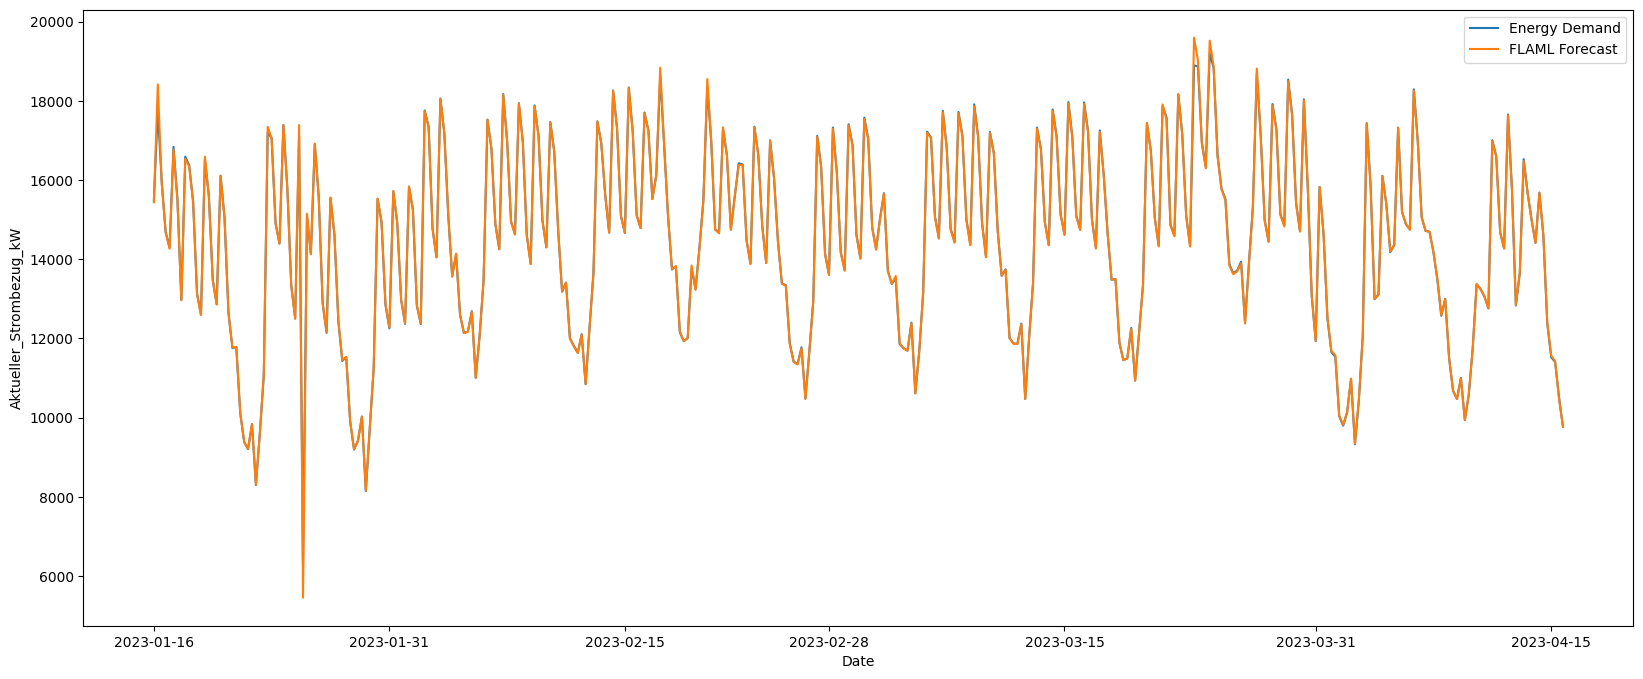

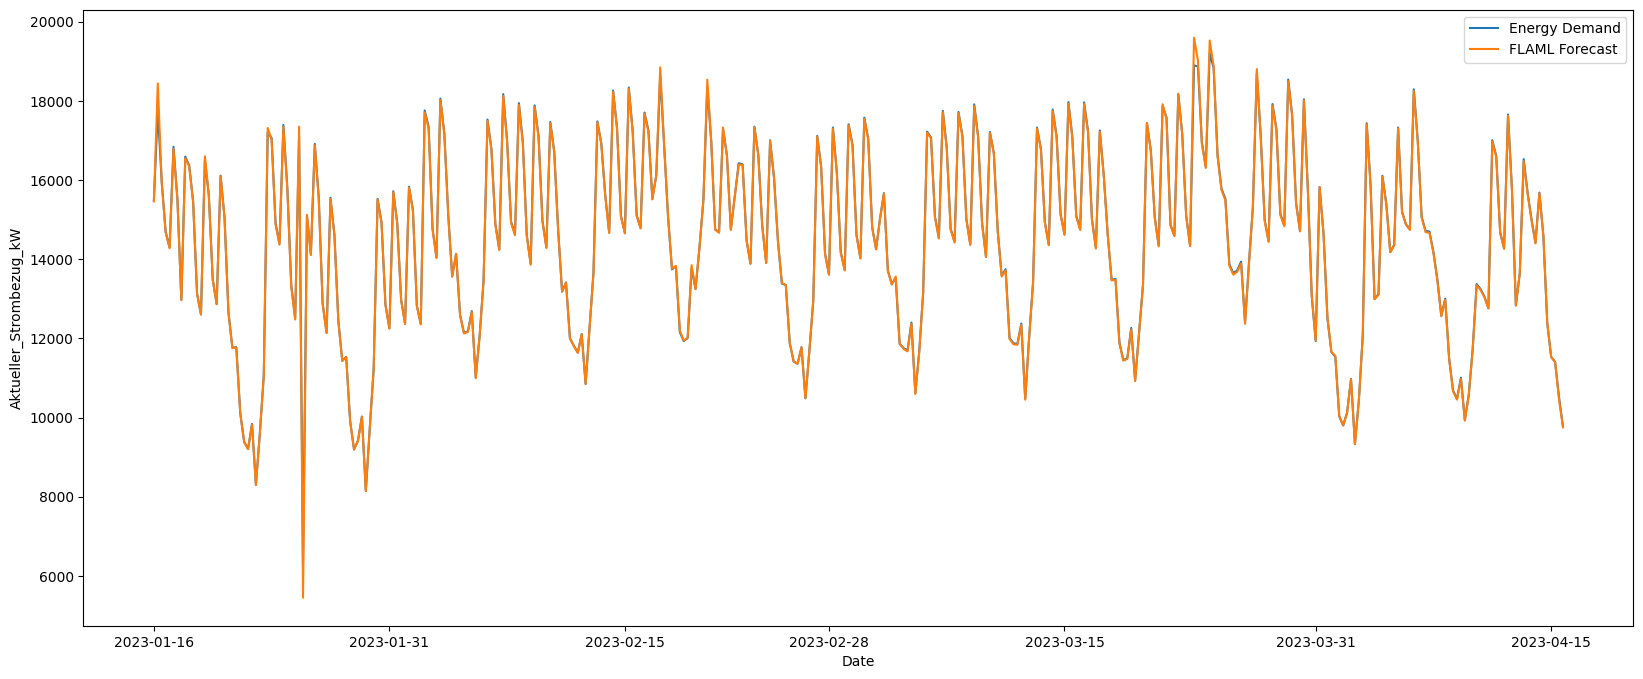

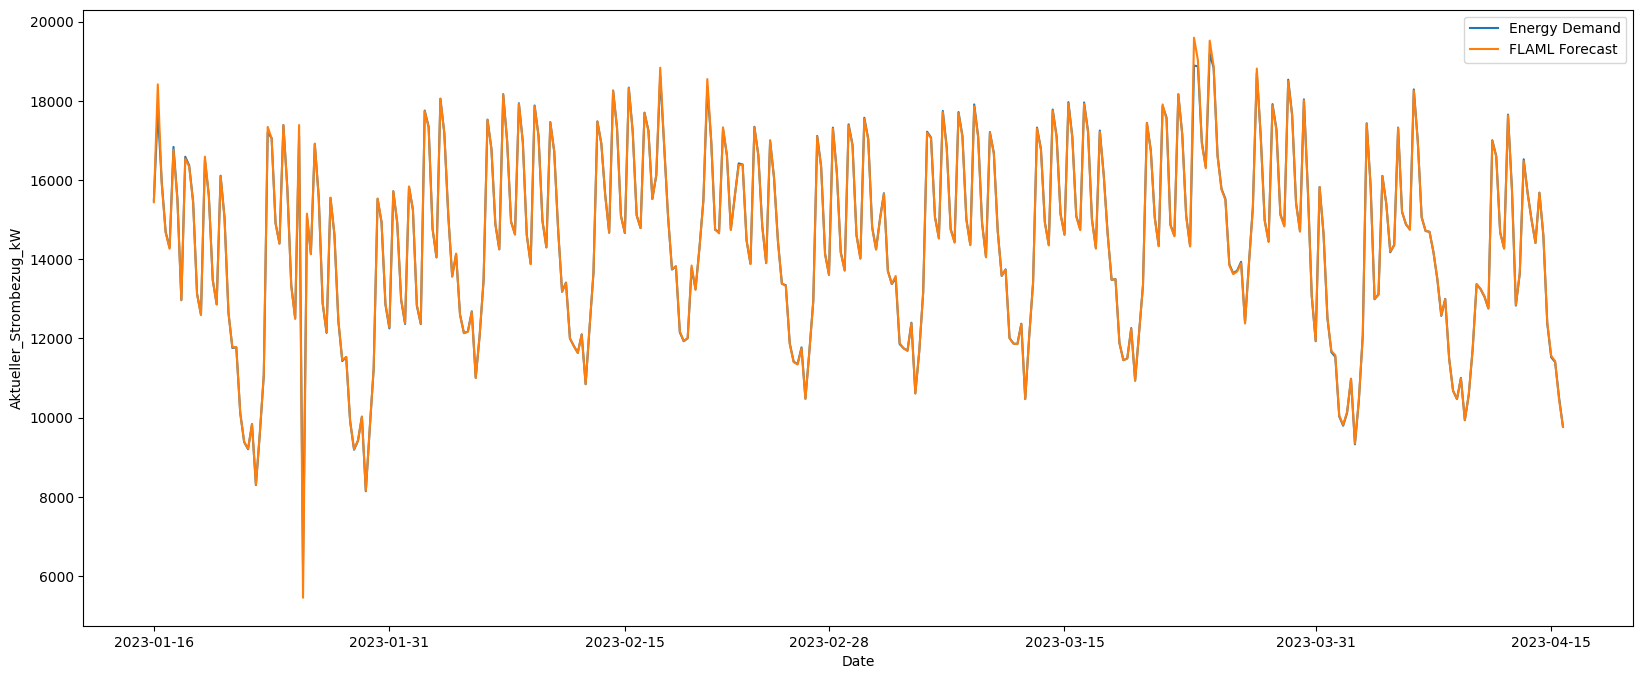

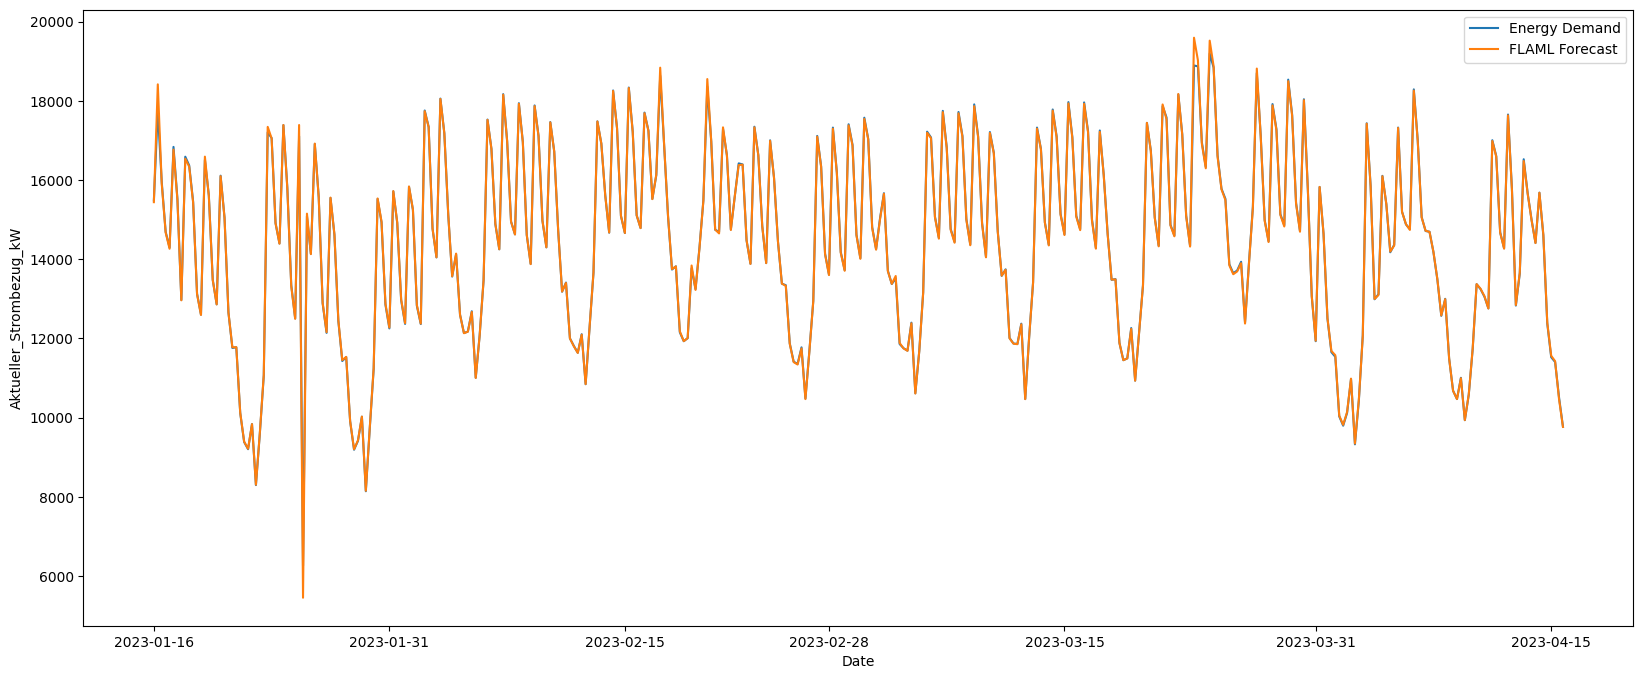

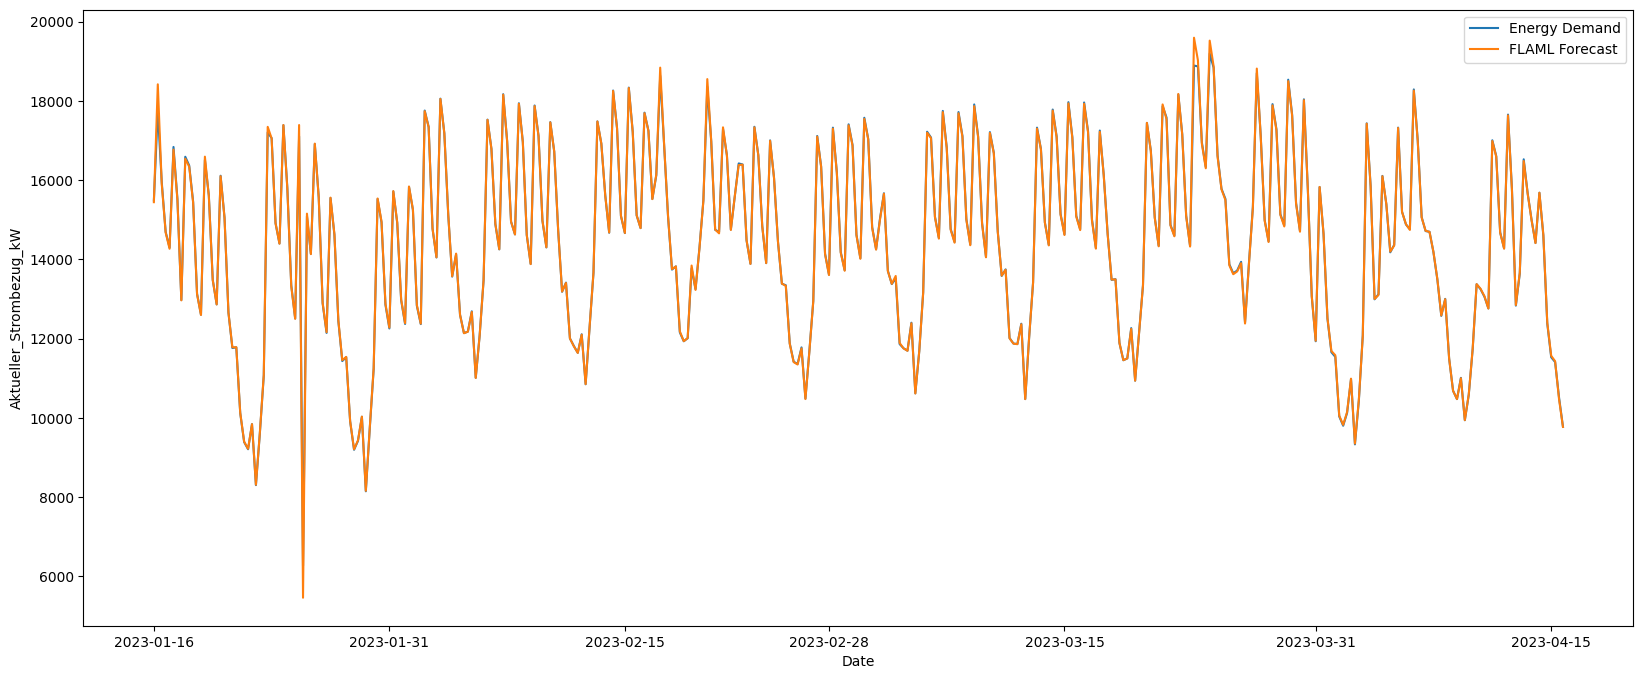

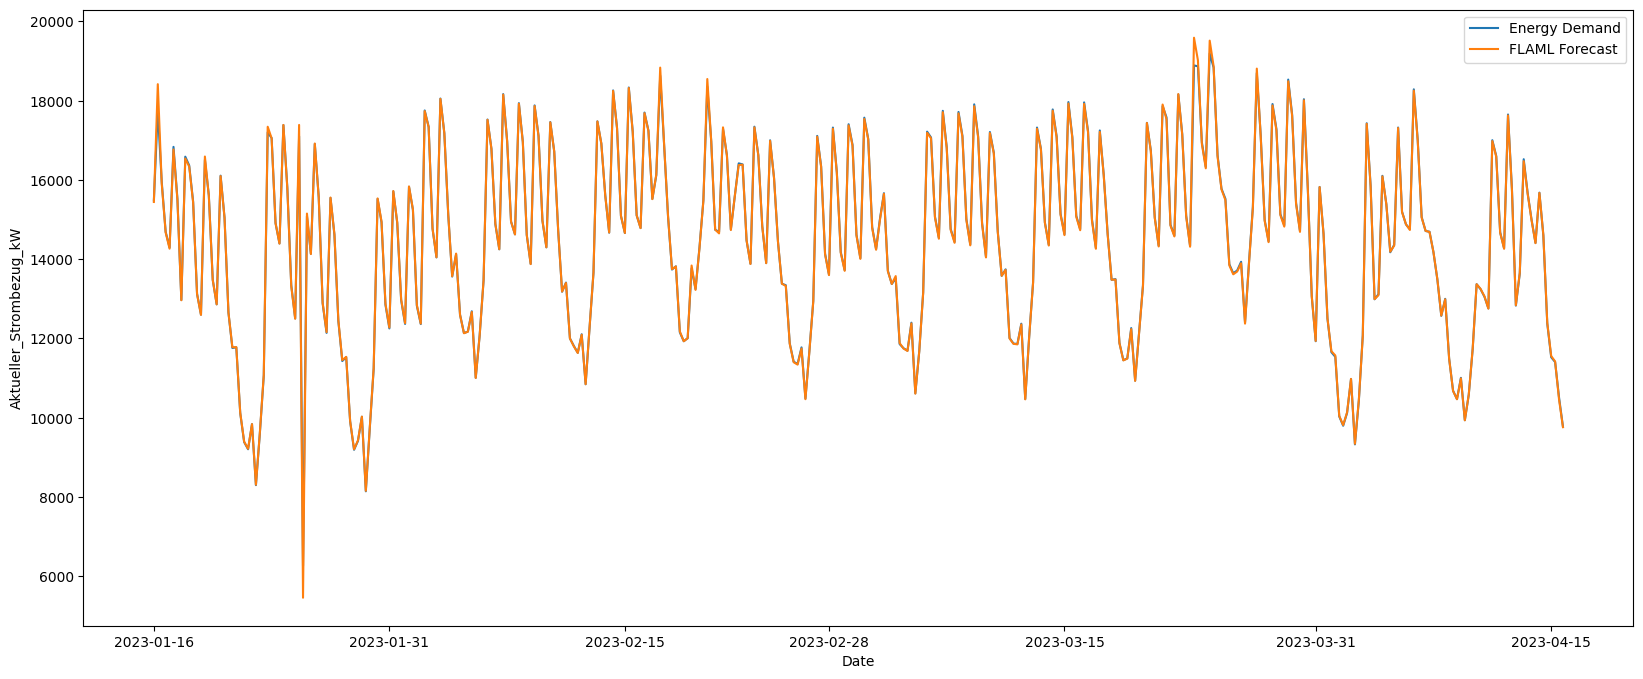

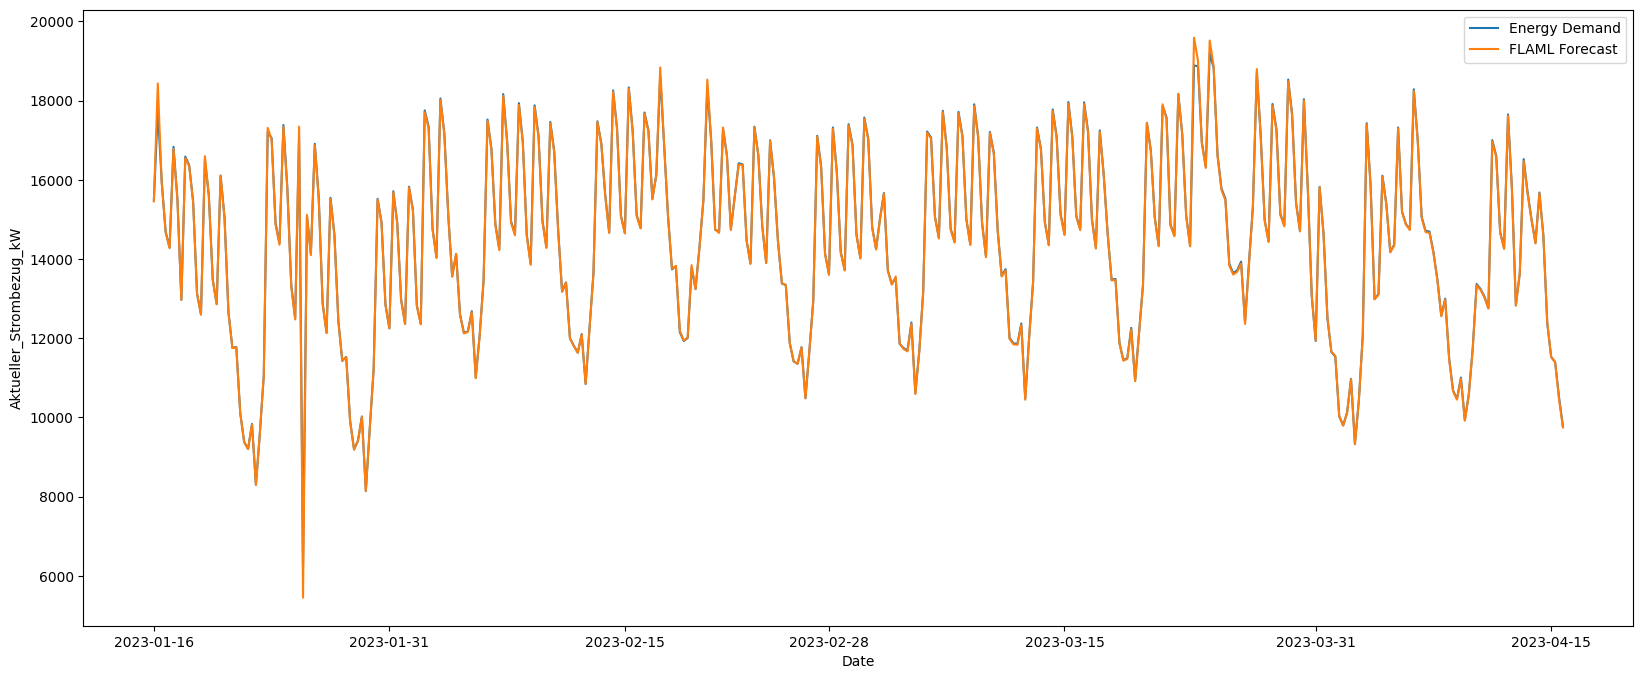

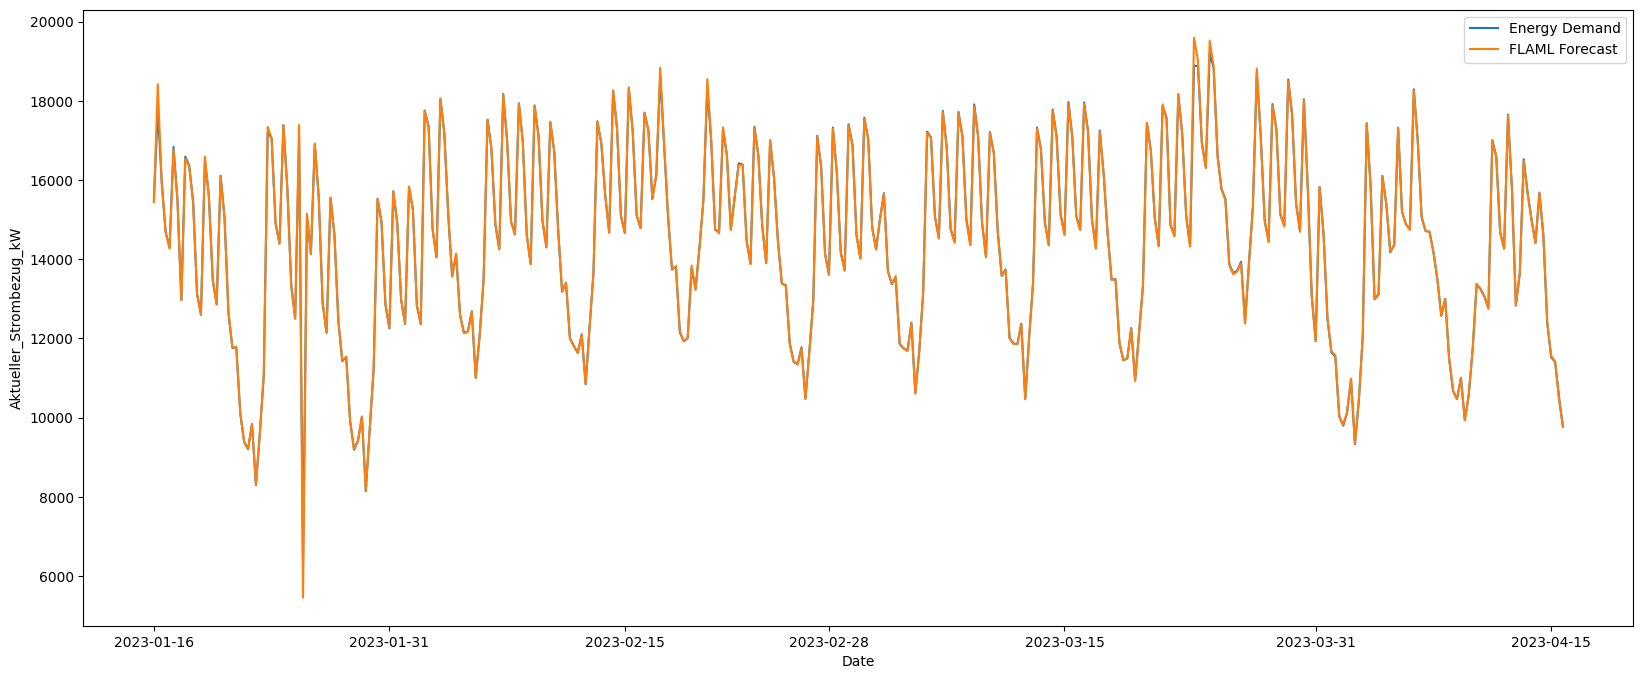

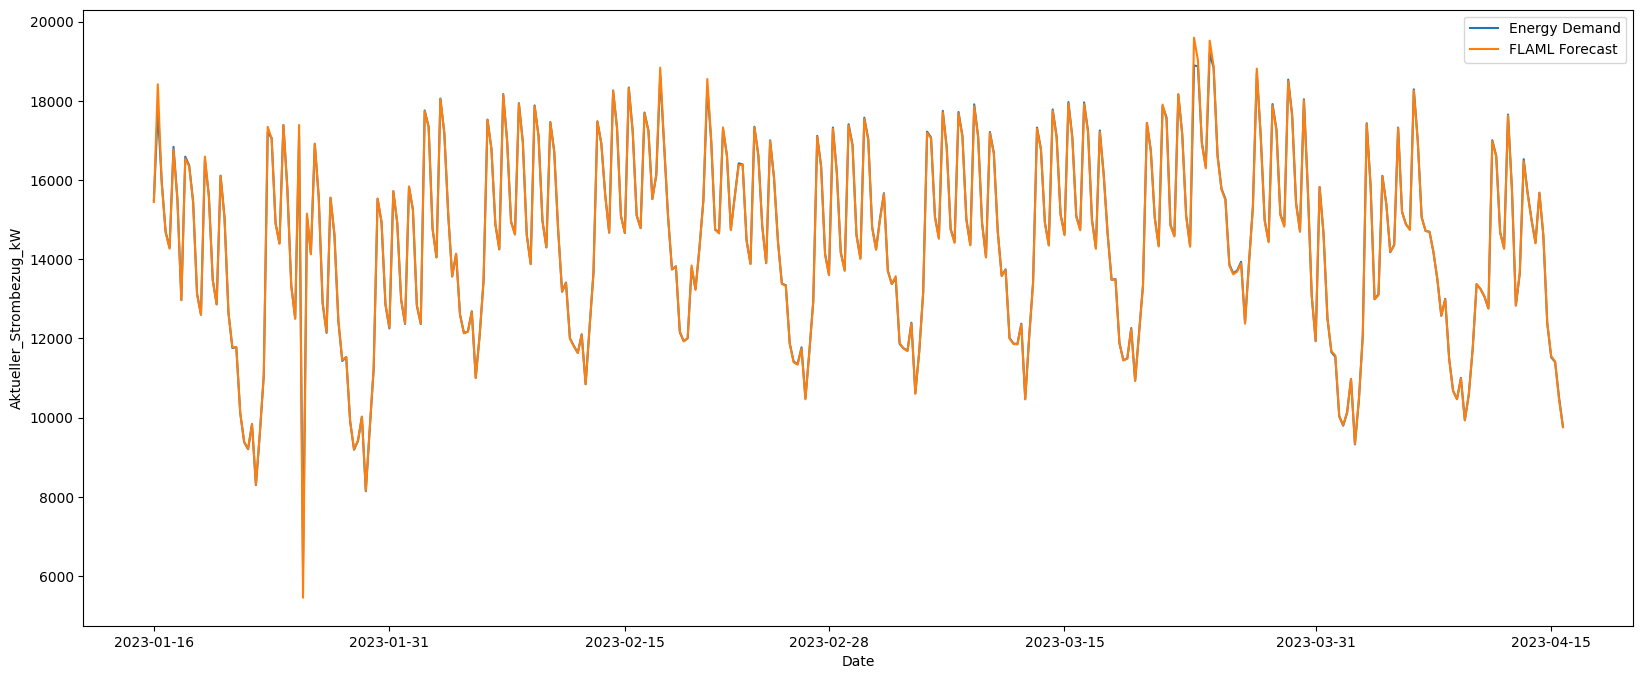

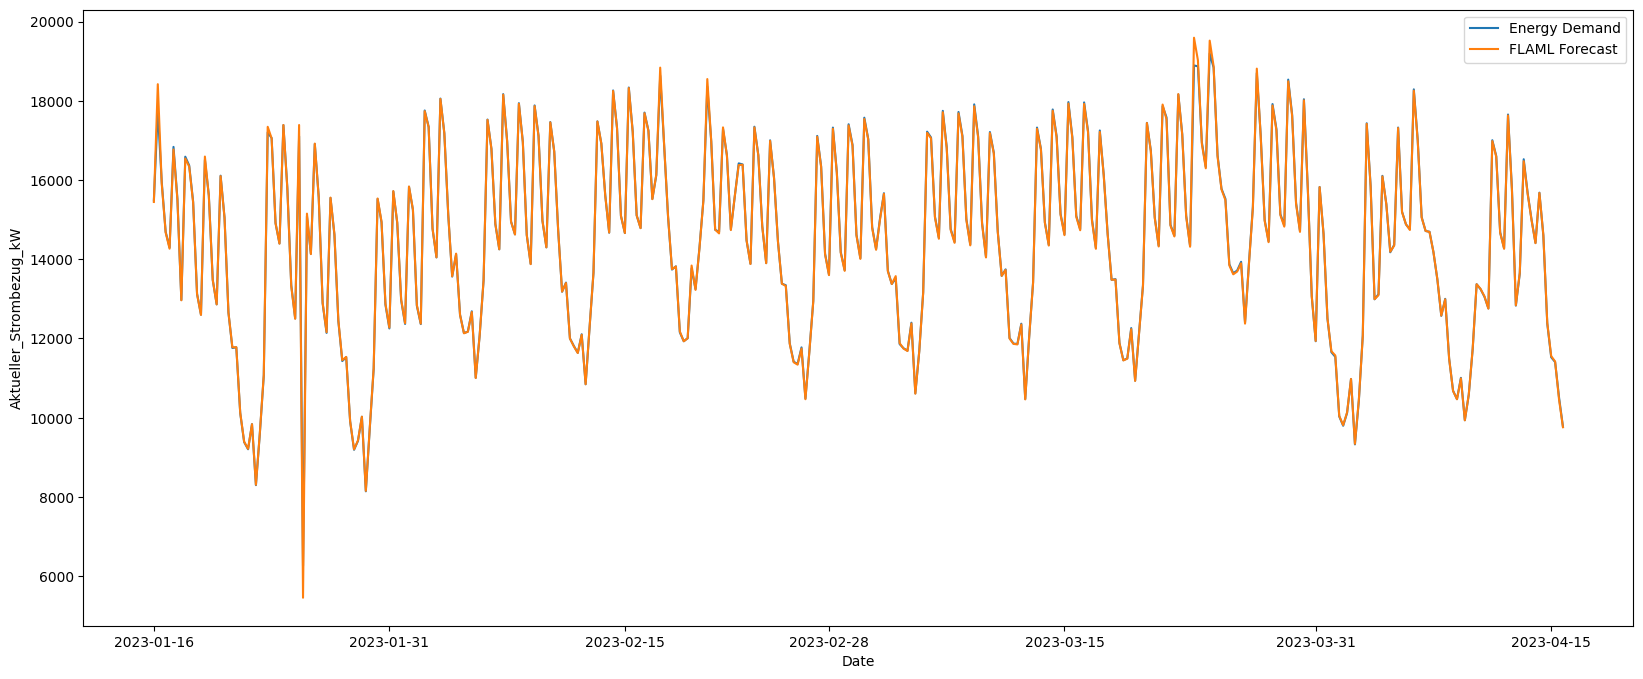

In [7]:
from flaml import AutoML
from datetime import datetime as dt
import matplotlib.pyplot as plt



# Create an empty DataFrame with the specified column names
df_metrics_FLAML = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MAPE', "Time"])
FLAML_configs = []
counter = 0
forecasts_f = []
# initialize instance
for i in seeds:   
    np.random.seed(i)
    # initialize instance
    automl = AutoML()
    # settings for fitting the model
    settings = {
        "time_budget":1800,
        "metric": "rmse",  # add metric
        "task": "ts_forecast",  # define task
        "gpu_per_trial": 1, # add gpu usage
        "period":time_horizon,
        "seed": i  # for replicatioin
    }
  
    # start time measurement
    start_time_FLAML = dt.now()
    
    # fit the model
    automl.fit(dataframe = df_train, label="Aktueller_Strombezug_kW", **settings, cache=False)
    
    # end time measurement
    end_time_FLAML = dt.now()  
    elapsed_seconds_FLAML = (end_time_FLAML - start_time_FLAML).total_seconds()
    elapsed_min_FLAML = divmod(elapsed_seconds_FLAML, 60)
    time_passed_FLAML = f"{int(elapsed_min_FLAML[0])}m{int(elapsed_min_FLAML[1])}s"
    print("Total fitting time: ", f"{int(elapsed_min_FLAML[0])}m{int(elapsed_min_FLAML[1])}s")

    #y_FLAML = df_test["Aktueller_Strombezug_kW"].to_numpy()
    y_FLAML = energy_demand[-time_horizon:]
    x_test = df_test.drop("Aktueller_Strombezug_kW", axis = 1)
    date_FLAML = x_test["Datetime"].to_numpy()
    date_FLAML = np.array(date_FLAML, dtype='datetime64')
    
    #mke the predictions
    y_pred_FLAML = automl.predict(x_test)
    
    # denormalize the forcasts
    for i in range(len(y_pred_FLAML)):
        y_pred_FLAML[i] = denormalize(y_pred_FLAML[i], max_energy, min_energy)
    
     
    forecasts_f.append(y_pred_FLAML)
    # claculate the metrics
    metric_FLAML, mse, rmse, mae, mape = calculate_metrics(y_FLAML, y_pred_FLAML)
    row = {"MSE": mse, 'RMSE': rmse, 'MAE': mae, "MAPE":mape, "Time": time_passed_FLAML}
    # save the metrics
    df_metrics_FLAML.loc[counter] = row
      
    name = "plots/FLAML/FLAML" +str(counter)
    # plot the stuff and safe
    
    plt.figure(figsize=(20, 8))
    plt.plot(date_FLAML, y_FLAML, label='Energy Demand')
    plt.plot(date_FLAML, y_pred_FLAML, label='FLAML Forecast')
    plt.xlabel('Date')
    plt.ylabel('Aktueller_Strombezug_kW')
    
    tick_positions = ['2023-01-16', '2023-01-31', '2023-02-15', '2023-02-28', 
                    '2023-03-15', '2023-03-31', '2023-04-15']
    
    plt.xticks(tick_positions, tick_positions)
    plt.legend()
    plt.savefig(name)
    
    counter += 1
    
    best_config = automl.best_config
    FLAML_configs.append(best_config)
    #best_loss = automl.best_loss
# save the metrics in a csv for later calculations    
df_metrics_FLAML.to_csv('plots/FLAML/FLAML_Metrics.csv', index=False)    
# save best configs in file
filename = "plots/FLAML/bestConfigs.txt"
with open(filename, 'w') as file:
    for config in FLAML_configs:
        for key, value in config.items():
            file.write(str(automl.best_estimator))
            file.write(f"{key}: {value}\n")
            file.write('\n') 
        file.write("---------------------")
        file.write("\n")
        
filename = "plots/FLAML/forecasts.txt"
with open(filename, 'w') as file:
    for forcast in forecasts_f:
        file.write(str(forcast))
        file.write('\n') 
        file.write("---------------------")
        file.write('\n') 

# Autogluon

In [11]:
dfa = pd.concat([df_train, df_test], ignore_index=True)

# add index to the time series, need for Autogluon to identify time series
le = len(dfa)
idx = [1]*le
# add index (needed for autogluon)
dfa["index"]  = idx
# make datetime object
dfa.Datetime=pd.to_datetime(dfa.Datetime, infer_datetime_format=True)


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:27:24.855831: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-09 14:27:25.022910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 14:27:25.530383: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cou

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	161.28  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1799.99s remaining.
	-0.0058       = Validation score (-MSE)
	180.16  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1799.99s remaining.
	-0.0232       = Validation score (-MSE)
	32.73   s     = Training runtime
	0.03    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1799.99s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1799.99s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m32s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:35:00.511334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:35:03.843956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0457149 &       0.0224378 &          1.36949    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0449517 &       0.0224378 &        180.158      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.559847  &       0.613683  &         79.7972     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.5606    &       0.544472  &         81.4713     &           7 \\
 PatchTST                  &   -0.0163689 & -0.0232047  &        0.0548143 &       0.0321321 &         32.7275     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       13.6954    &      13.2648    &          0.0068655  &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:35:46.236127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.14    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:35:48.352817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	156.21  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.17  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0229       = Validation score (-MSE)
	33.27   s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m10s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:42:56.638615: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:42:59.892071: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0459077 &       0.0232592 &          1.35886    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0451436 &       0.0232592 &        180.171      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.556782  &       0.543672  &         74.2625     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.558669  &       0.551962  &         81.9352     &           7 \\
 PatchTST                  &   -0.0160587 & -0.0229321  &        0.0527825 &       0.0225787 &         33.2677     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       13.8093    &      13.4371    &          0.00616145 &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:43:42.012275: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.14    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:43:44.148751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	162.34  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.14  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0253       = Validation score (-MSE)
	33.07   s     = Training runtime
	0.03    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m17s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:50:59.061443: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:51:02.342180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0450943 &       0.0225468 &          1.36899    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0442972 &       0.0225468 &        180.142      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.559569  &       0.550979  &         78.6362     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.576518  &       0.54723   &         83.694      &           7 \\
 PatchTST                  &   -0.0261347 & -0.0252515  &        0.0524533 &       0.0255868 &         33.0679     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       13.9848    &      13.7092    &          0.00625467 &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:51:44.674917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.17    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:51:46.828116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	159.84  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.16  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0247       = Validation score (-MSE)
	32.75   s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m13s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:58:58.591155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:59:01.823477: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.044929  &       0.0225172 &          1.36584    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0442004 &       0.0225172 &        180.16       &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.552083  &       0.563947  &         76.1835     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.554832  &       0.55656   &         83.6485     &           7 \\
 PatchTST                  &   -0.0159764 & -0.0247286  &        0.0515847 &       0.0226121 &         32.7531     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       13.9042    &      13.4456    &          0.00625253 &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:59:44.276006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.11    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 14:59:46.381320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	159.03  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.15  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0228       = Validation score (-MSE)
	33.50   s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m13s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:06:58.303242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:07:01.525228: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0467231 &       0.0228105 &          1.35959    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0459144 &       0.0228105 &        180.147      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.559841  &       0.544544  &         76.3591     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.555135  &       0.550099  &         82.6612     &           7 \\
 PatchTST                  &   -0.0197583 & -0.0228378  &        0.0543067 &       0.0229483 &         33.4967     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       14.0433    &      13.6565    &          0.00648284 &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:07:44.376575: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.17    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:07:46.549979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	160.34  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.13  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0228       = Validation score (-MSE)
	33.80   s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m15s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:15:00.246675: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:15:03.436384: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0458202 &       0.0223961 &          1.36281    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0450058 &       0.0223961 &        180.133      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.553798  &       0.574815  &         78.1644     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.548442  &       0.54812   &         82.1681     &           7 \\
 PatchTST                  &   -0.0137046 & -0.0227616  &        0.0520546 &       0.022666  &         33.7988     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       13.7126    &      13.5626    &          0.00623465 &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:15:45.080041: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.12    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:15:47.225547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	158.93  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.16  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0225       = Validation score (-MSE)
	33.05   s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m21s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:23:06.678948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:23:10.052040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0472333 &       0.0232818 &          1.38663    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0464642 &       0.0232818 &        180.156      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.580583  &       0.553336  &         77.0045     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.608051  &       0.560874  &         81.9087     &           7 \\
 PatchTST                  &   -0.0152737 & -0.0225379  &        0.0570664 &       0.0229909 &         33.0511     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       14.1288    &      13.3962    &          0.00642943 &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:23:52.998940: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.19    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:23:55.177560: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	160.52  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.15  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0227       = Validation score (-MSE)
	32.90   s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m19s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:31:12.233474: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:31:15.491271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0467646 &       0.0230298 &          1.37074    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0460193 &       0.0230298 &        180.153      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.56188   &       0.553535  &         77.3328     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.585933  &       0.565989  &         83.1761     &           7 \\
 PatchTST                  &   -0.0160336 & -0.0227211  &        0.0519347 &       0.0226321 &         32.9022     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       14.1471    &      13.7419    &          0.00630665 &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:31:58.229290: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.15    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:32:00.346371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	163.47  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.18  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0228       = Validation score (-MSE)
	34.30   s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m20s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:39:18.490616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:39:21.847502: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0492861 &       0.0232198 &          1.38194    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0485511 &       0.0232198 &        180.178      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.571454  &       0.557314  &         78.8321     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.576538  &       0.606781  &         84.625      &           7 \\
 PatchTST                  &   -0.0178436 & -0.0227714  &        0.0472178 &       0.0232689 &         34.2979     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       13.9992    &      13.8651    &          0.00647283 &           4 \\
 Theta                     &

/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:40:04.440990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
	-0.0440       = Validation score (-MSE)
	0.01    s     = Training runtime
	2.15    s     = Validation (prediction) runtime
Hyperparameter tuning model: SeasonalNaive. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:40:06.573566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 2 models while tuning DeepAR.
	-0.0143       = Validation score (-MSE)
	162.41  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0058       = Validation score (-MSE)
	180.15  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. Tuning model for up to 180.00s of the 1800.00s remaining.
	-0.0247       = Validation score (-MSE)
	34.47   s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. Tuning model for up to 180.00s of the 1800.00s remaining.
	'Series' object has no attribute 'set_index'
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 180.00s of the 1800.00s remaining.
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot ope

Total fitting time:  7m32s
\begin{tabular}{lr}
\hline
 Metric   &          Value \\
\hline
 MSE      &    2.29777e+06 \\
 RMSE     & 1515.84        \\
 MAE      & 1109.9         \\
 MAPE     &    8.45269     \\
\hline
\end{tabular}


/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:47:37.127931: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2023-08-09 15:47:40.519147: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/fabienne/Documents/MA/Code/autoML/lib/python3.10/site-packages/statsforecast/arima.py:884: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/fab

\begin{tabular}{lrrrrrr}
\hline
 model                     &   score\_test &   score\_val &   pred\_time\_test &   pred\_time\_val &   fit\_time\_marginal &   fit\_order \\
\hline
 WeightedEnsemble          &   -0.0112564 & -0.00582774 &        0.0452609 &       0.022989  &          1.38211    &          11 \\
 TemporalFusionTransformer &   -0.0112564 & -0.00582774 &        0.0444891 &       0.022989  &        180.145      &           8 \\
 DeepAR/T1                 &   -0.0120098 & -0.0193643  &        0.607289  &       0.55106   &         78.6623     &           6 \\
 DeepAR/T2                 &   -0.0126058 & -0.0142527  &        0.596637  &       0.557244  &         83.7367     &           7 \\
 PatchTST                  &   -0.0159764 & -0.0247286  &        0.0521827 &       0.0237818 &         34.4743     &           9 \\
 AutoETS                   &   -0.0316553 & -0.0495896  &       13.9754    &      13.5545    &          0.00650692 &           4 \\
 Theta                     &

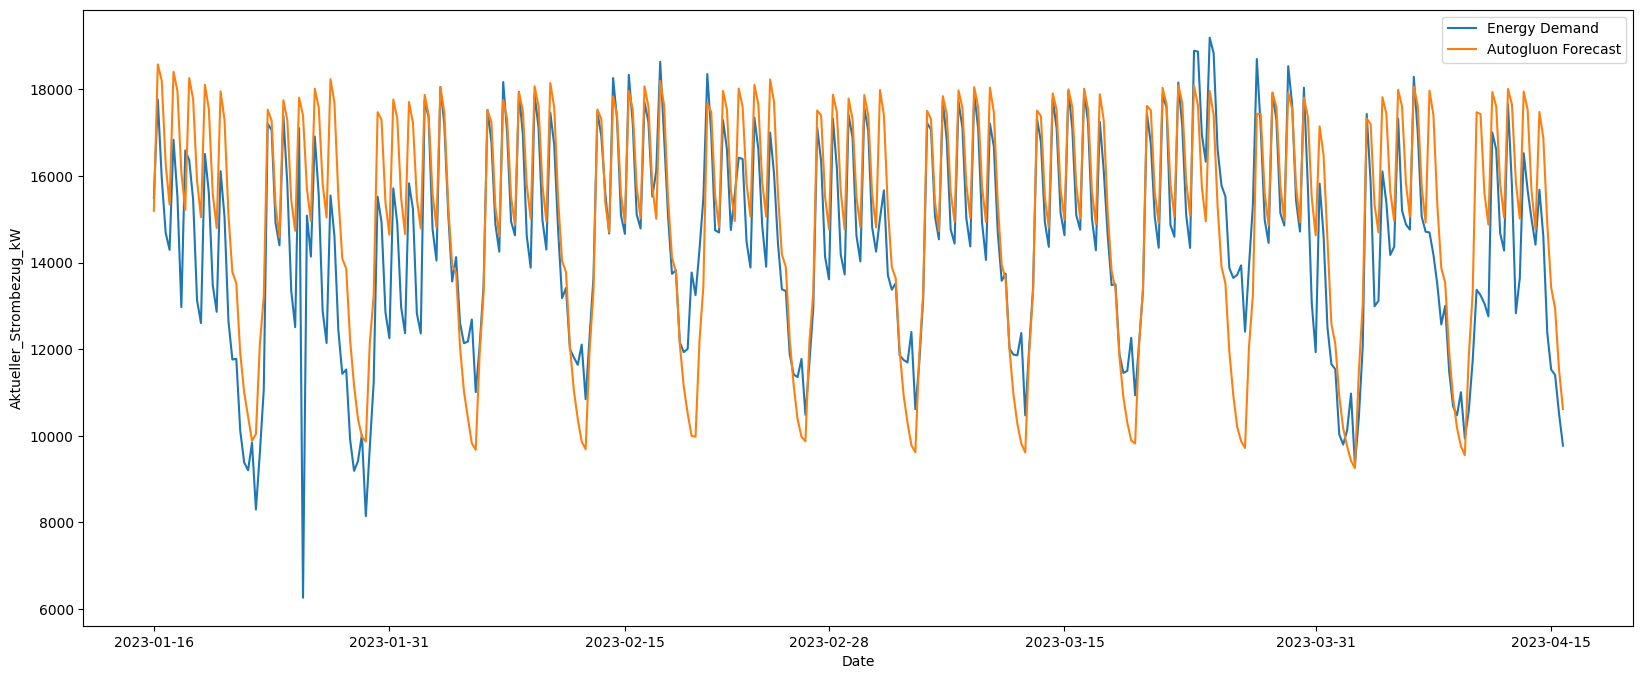

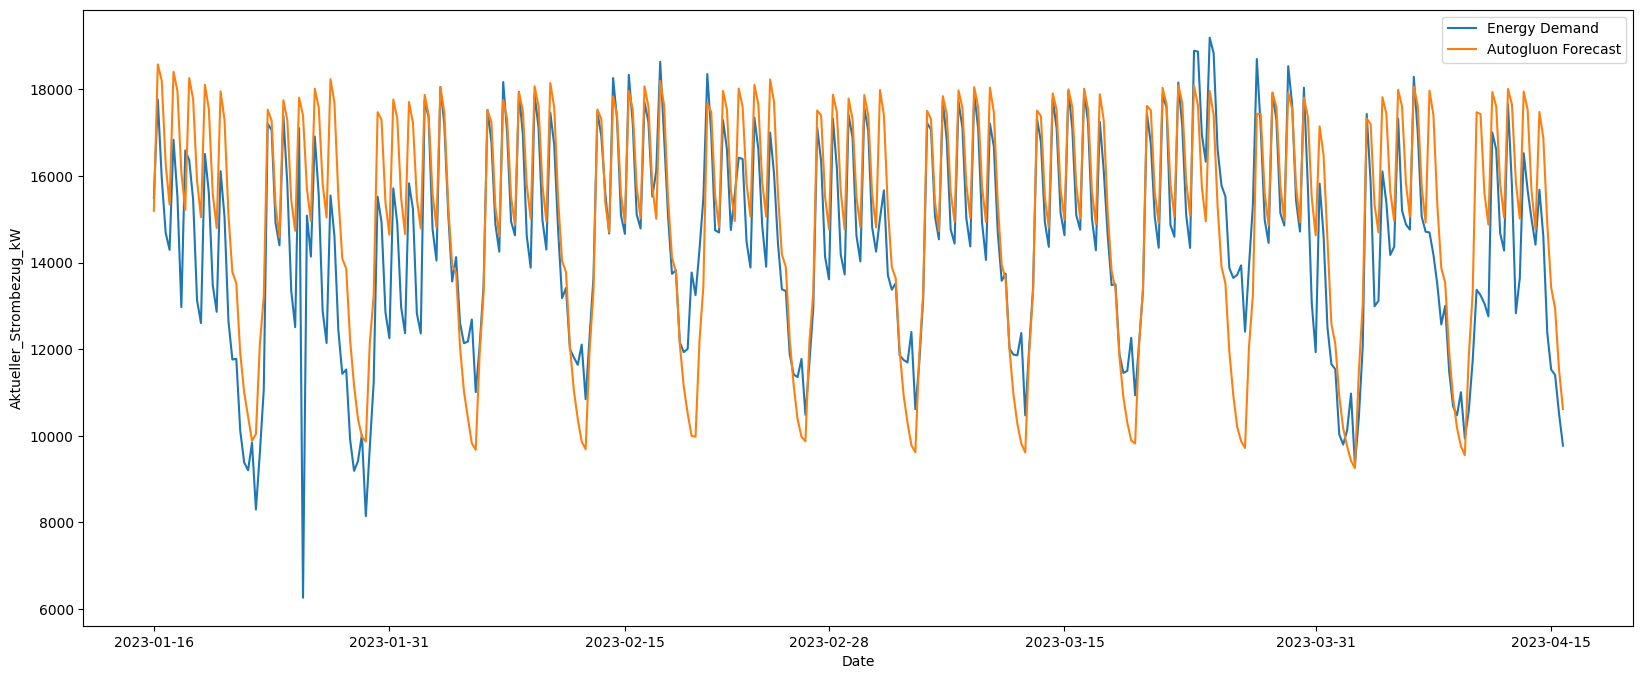

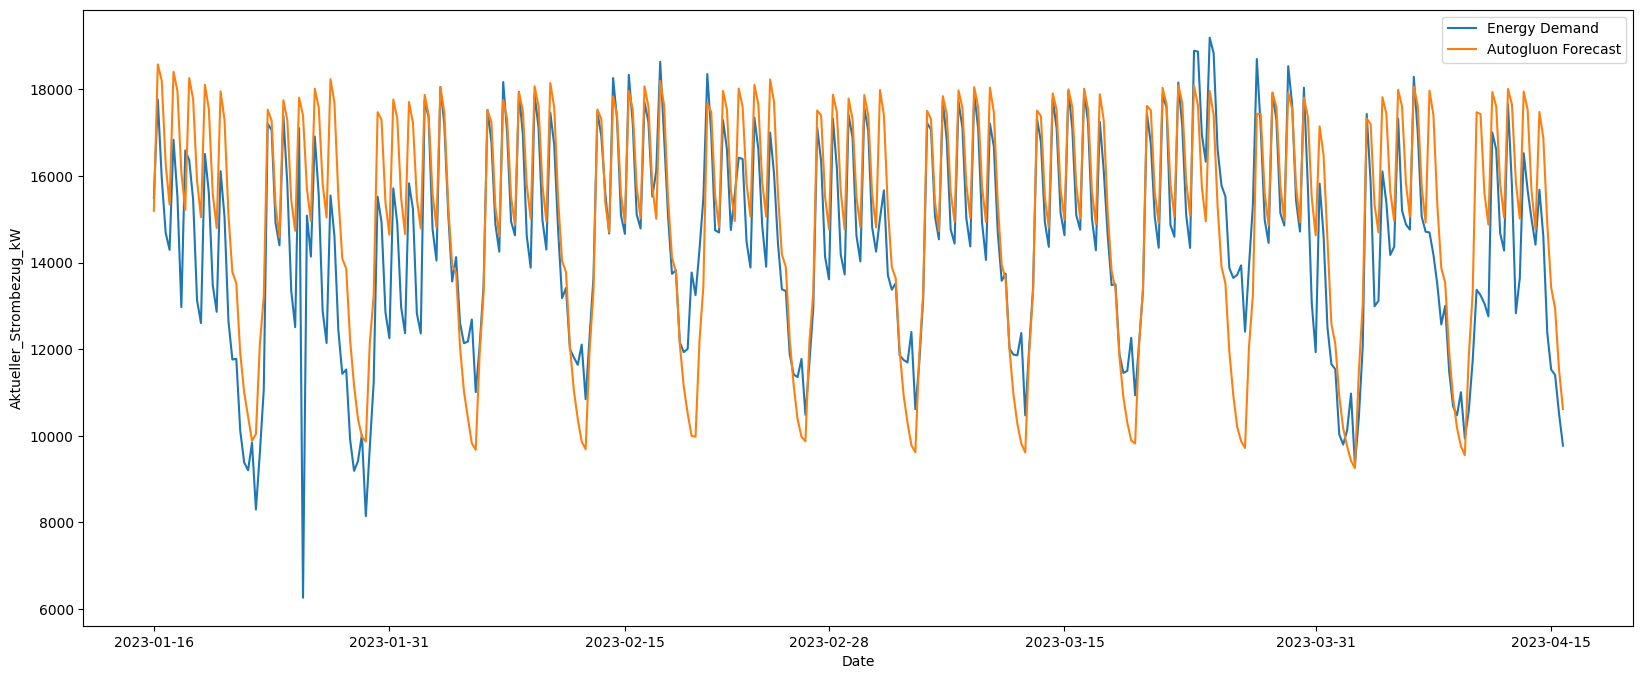

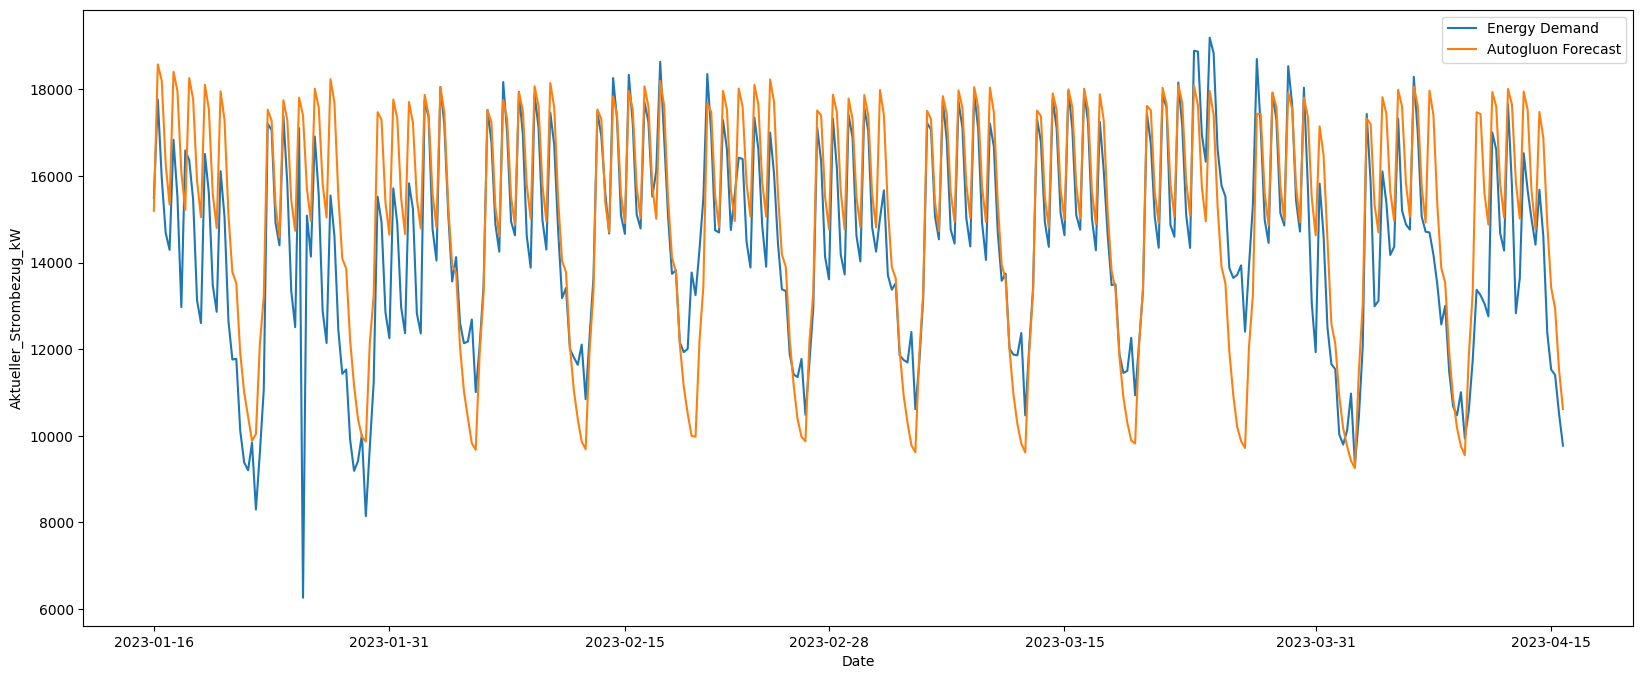

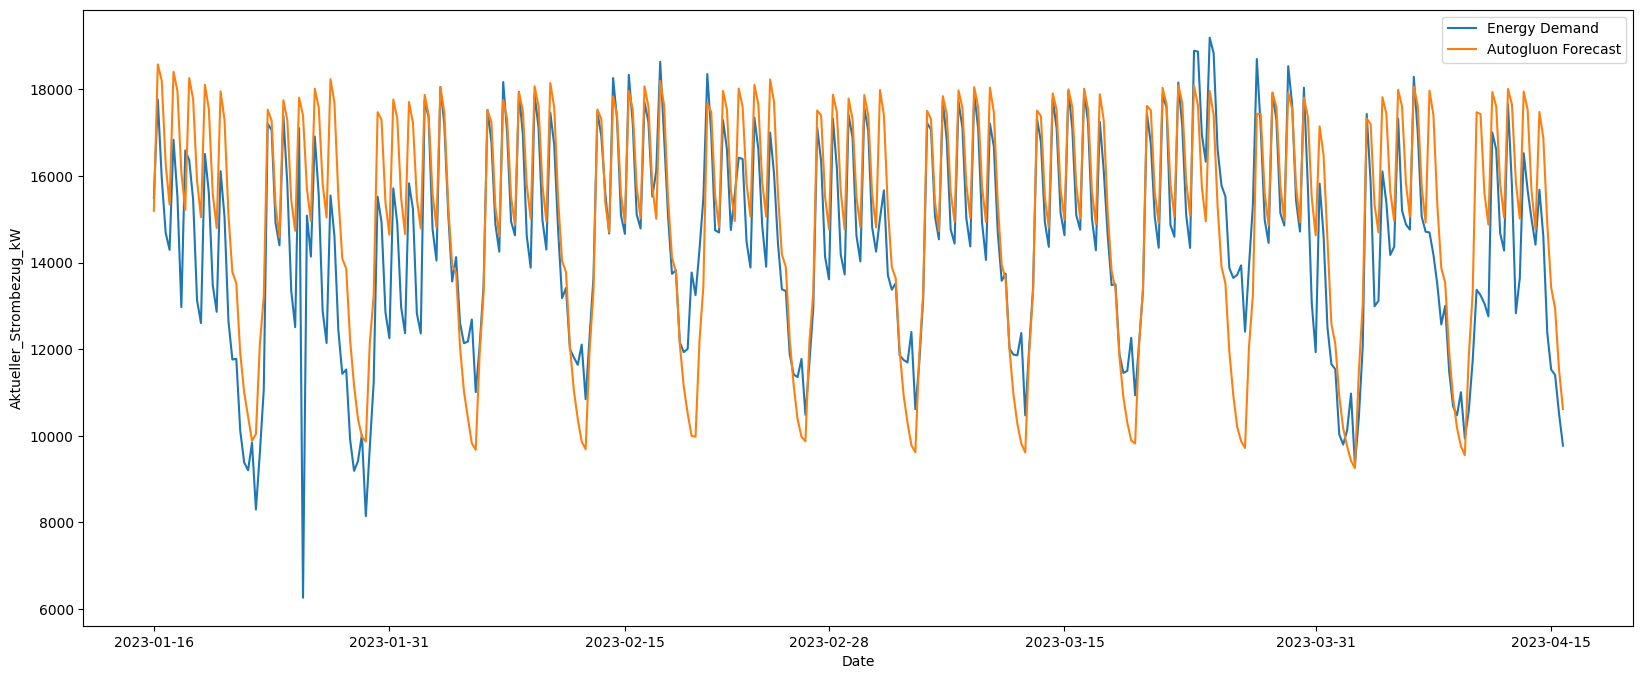

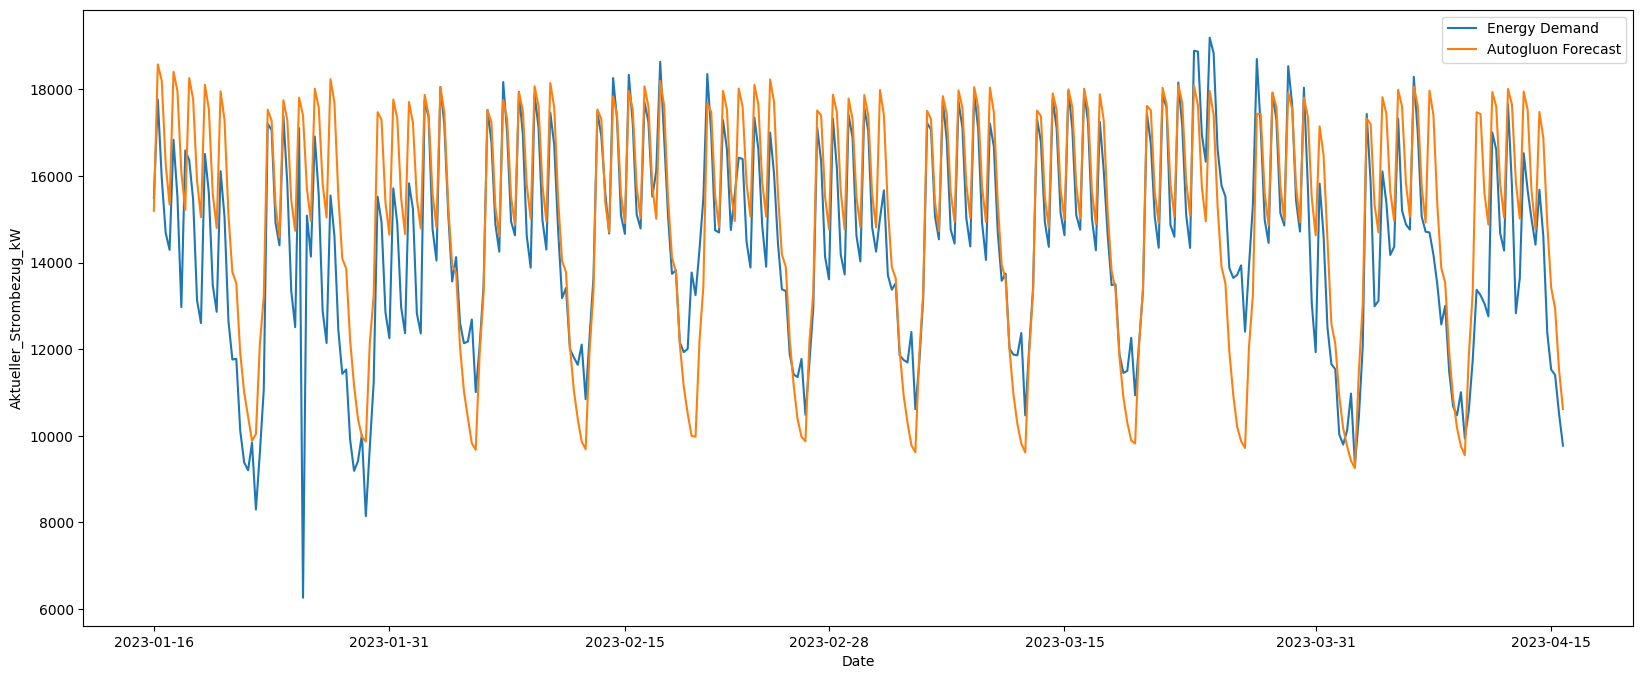

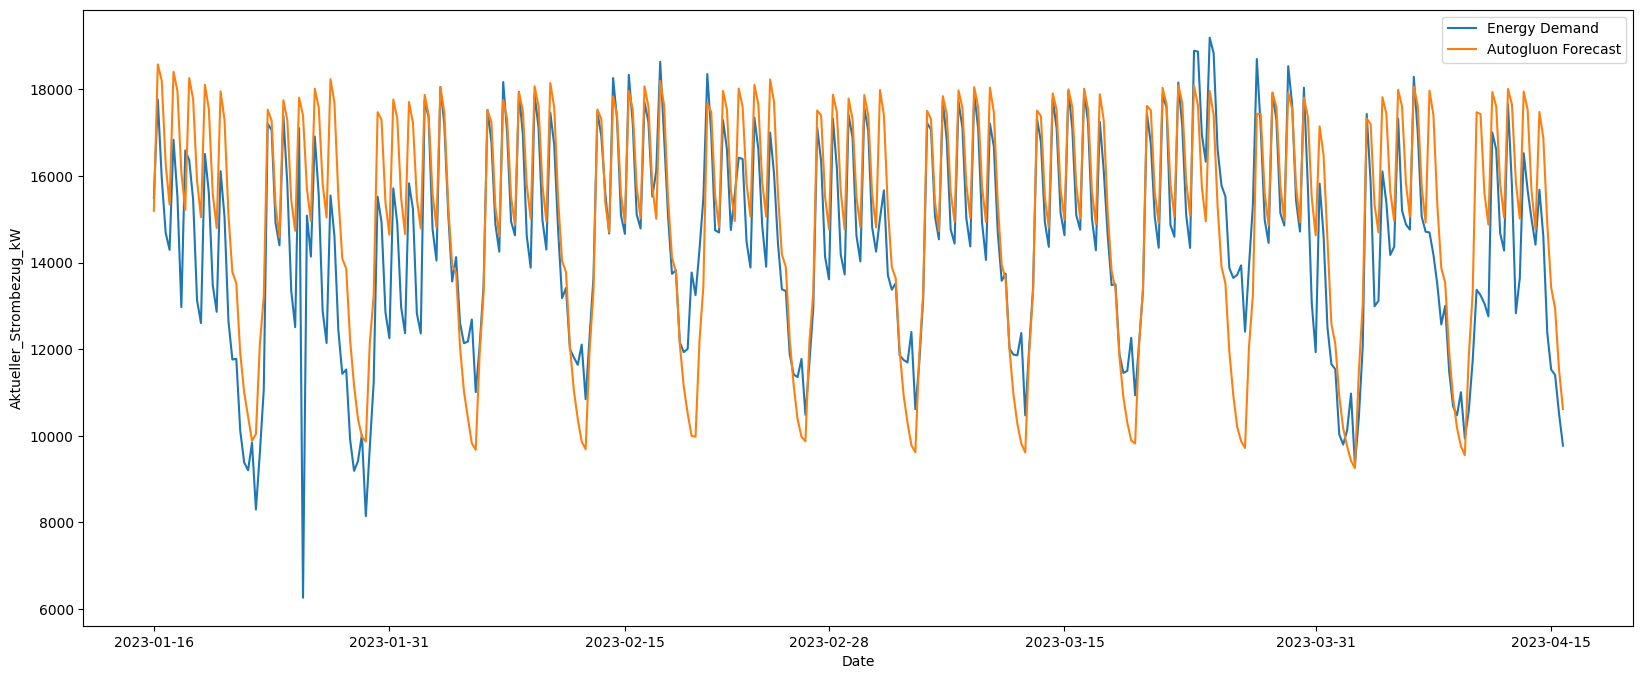

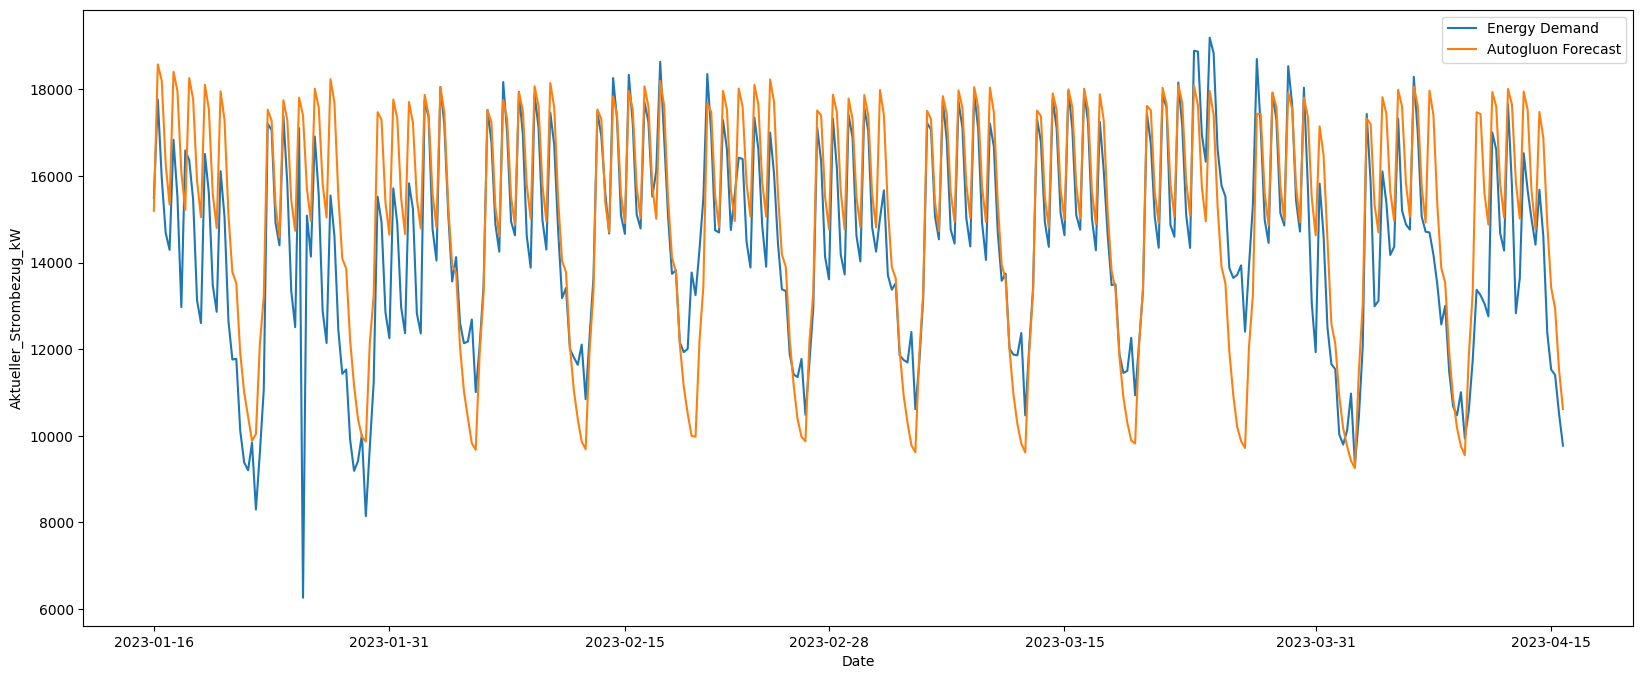

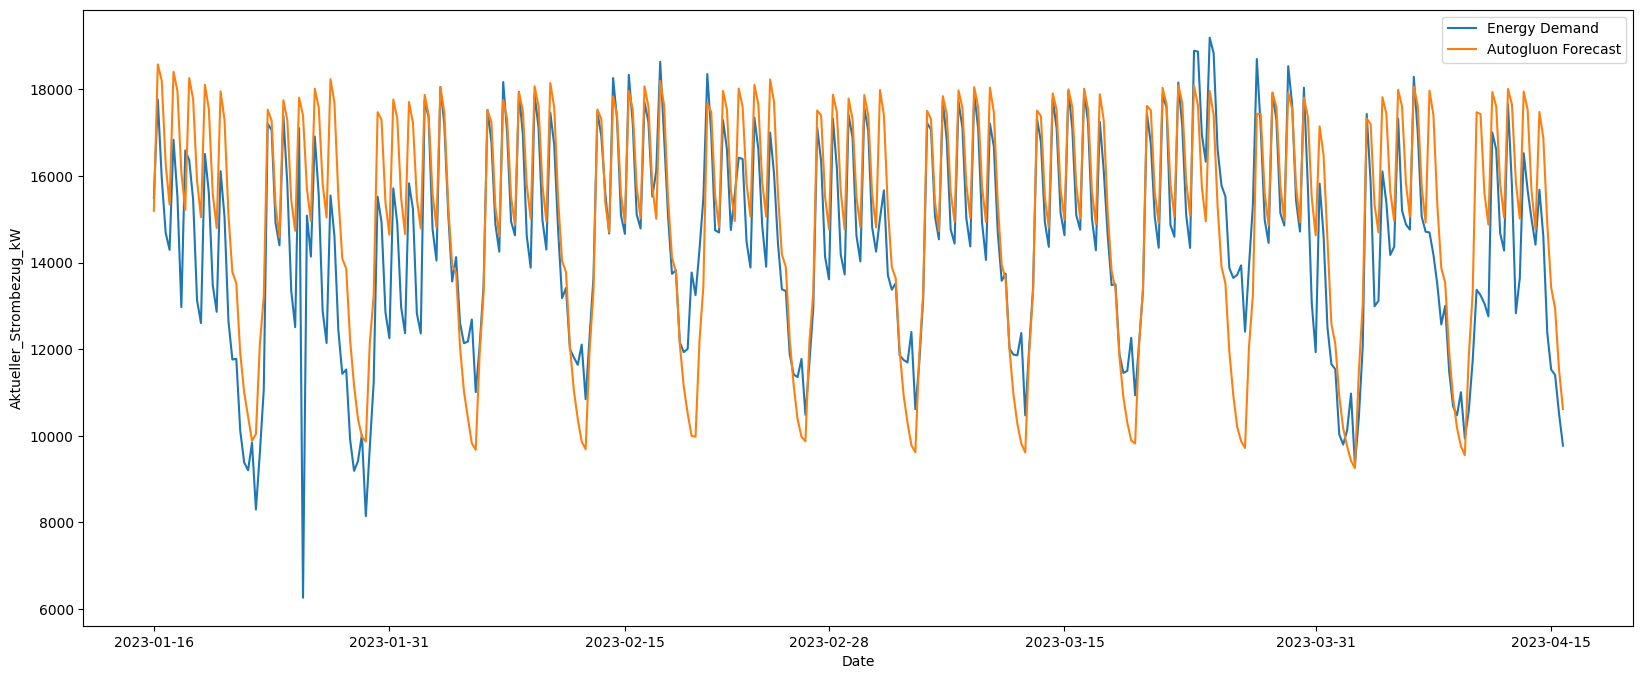

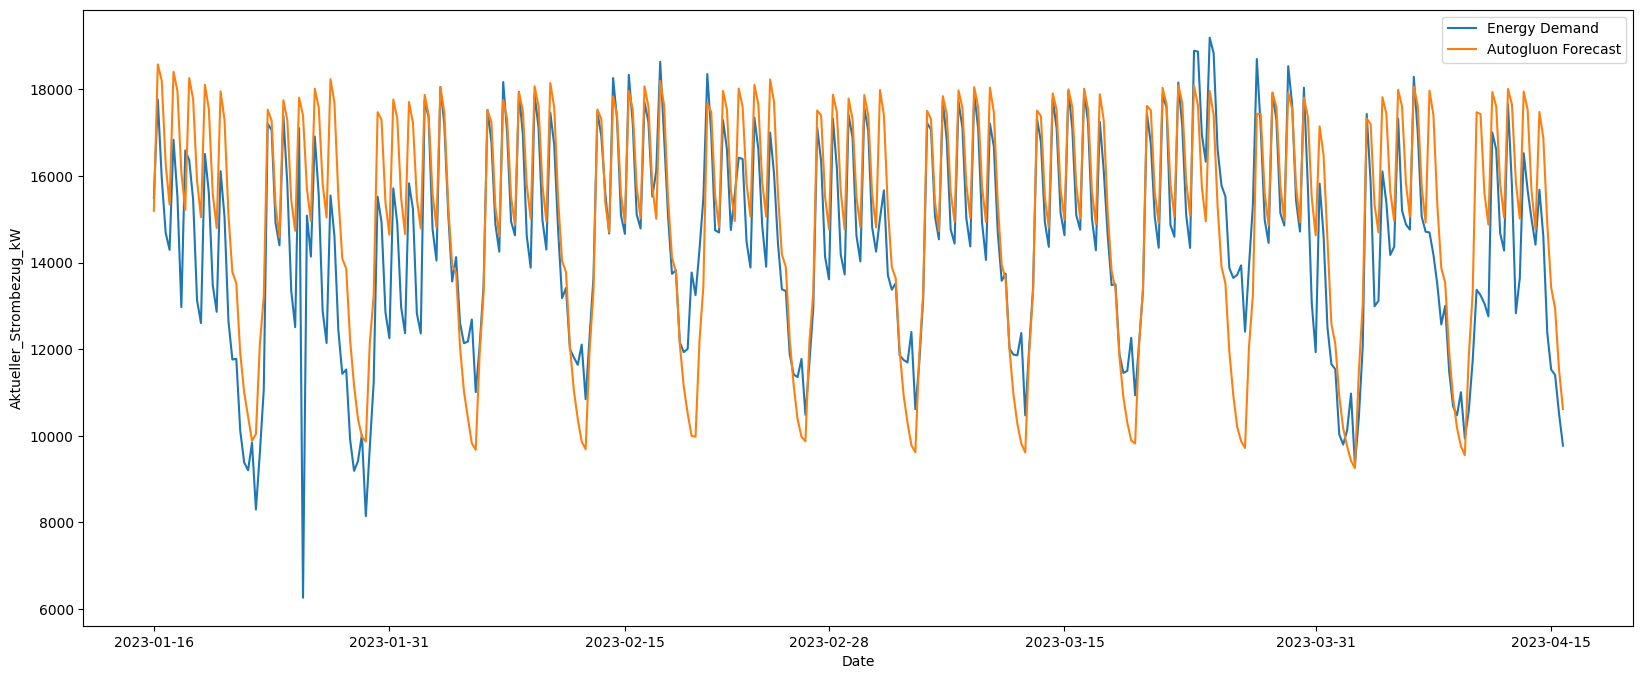

In [12]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_metrics_auto = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MAPE', "Time"])
df_models_auto = pd.DataFrame(columns=["model","score_test","score_val","pred_time_test","pred_time_val","fit_time_marginal","fit_order"])


counter = 0

for i in seeds:
    np.random.seed(i) # set seed
    data_auto = TimeSeriesDataFrame.from_data_frame(
        dfa,
        timestamp_column="Datetime",
        id_column="index"
    )

    prediction_length_a = time_horizon
    train_data_a, test_data_a = data_auto.train_test_split(prediction_length_a)

    predictor_a = TimeSeriesPredictor(
        prediction_length=prediction_length_a,
        target="Aktueller_Strombezug_kW",
        eval_metric="MSE"
        #ignore_time_index=True
        #past_covariates = ["Demand", "Occupancy"]
    )

    start_time_auto = dt.now()

    predictor_a.fit(
        train_data_a,
        time_limit = 1800, # half an hour
        presets = "best_quality" # get best model quality
    )

    end_time_auto = dt.now()  
    elapsed_seconds_auto = (end_time_auto - start_time_auto).total_seconds()
    elapsed_min_auto = divmod(elapsed_seconds_auto, 60)
    time_passed_auto = f"{int(elapsed_min_auto[0])}m{int(elapsed_min_auto[1])}s"
    print("Total fitting time: ", f"{int(elapsed_min_auto[0])}m{int(elapsed_min_auto[1])}s")


    predictions_auto = predictor_a.predict(train_data_a)
    
    y_auto = energy_demand[-time_horizon:]
    pred_auto = predictions_auto["mean"].to_numpy()
    for i in range(len(pred_auto)):
        pred_auto[i] = denormalize(pred_auto[i], max_energy, min_energy)
    
    
    table_auto, mse_a, rmse_a, mae_a, mape_a = calculate_metrics(y_auto, pred_auto)
    row_a = {"MSE": mse_a, 'RMSE': rmse_a, 'MAE': mae_a, "MAPE":mape_a, "Time":time_passed_auto}
    # save the metrics
    df_metrics_auto.loc[counter] = row_a
      

    trained_models_a = predictor_a.leaderboard(test_data_a, silent=True)
    trained_models_a
    
    df_models_auto = pd.concat([df_models_auto, trained_models_a], ignore_index=True)
    
    table_a= [["model","score_test","score_val","pred_time_test","pred_time_val","fit_time_marginal","fit_order"]]
    for i in range(0,len(trained_models_a)):
        row = trained_models_a.iloc[i].to_numpy()
        table_a.append(row)
    latex_table_a = tabulate(table_a, headers="firstrow", tablefmt='latex')
    print(latex_table_a)

    
    date_auto = df_test["Datetime"].to_numpy()
    date_auto = np.array(date_auto, dtype='datetime64')
    
    plt.figure(figsize=(20, 8))
    plt.plot(date_auto, y_auto, label='Energy Demand')
    plt.plot(date_auto, pred_auto, label='Autogluon Forecast')
    plt.xlabel('Date')
    plt.ylabel('Aktueller_Strombezug_kW')
    
    #num_ticks = 8
    # Calculate the step size for ticks
    #step_size = len(date_auto) // (num_ticks - 1)
    #Set the tick positions and labels on the x-axis
    #tick_positions = [date_auto[i] for i in range(0, len(date_auto), step_size)]
    tick_positions = ['2023-01-16', '2023-01-31', '2023-02-15', '2023-02-28', 
                    '2023-03-15', '2023-03-31', '2023-04-15']
    
    

    plt.xticks(tick_positions, tick_positions)
    plt.legend()
    plt.savefig("plots/auto/auto" +str(counter))

    counter +=1
df_metrics_auto.to_csv('plots/auto/auto_metrics.csv', index=False)
df_models_auto.to_csv('plots/auto/auto_models.csv', index=False)

# Fedot

In [6]:
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [7]:
fed_data =df_or.copy()
normalize(fed_data, "Aktueller_Strombezug_kW")
fed_data.to_csv("fedot_data.csv", index =True)

In [8]:
def create_or_append_to_csv_file(file_path, data):
    '''
    function to append metrics to a csv file
    '''
    try:
        # try to load the file
        df = pd.read_csv(file_path)
        # save the metrics
        df.loc[len(df)] = data
        df.to_csv(file_path, index=False)
    except:
        
        # if file does not exists, make file
        df_metrics_fed = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MAPE', "Time"])
        df_metrics_fed.loc[len(df_metrics_fed)] = data
        df_metrics_fed.to_csv(file_path, index=False)

In [7]:
#df_metrics_fed = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MAPE', "Time"])
counter = 0

for i in seeds:
    task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=time_horizon))
    #print(task.task_params)

    train_input = InputData.from_csv_time_series(task=task,
                                                file_path="fedot_data.csv",
                                                delimiter=',',
                                                target_column='Aktueller_Strombezug_kW'
                                                      )
    np.random.seed(i) # set seed

    train_data, test_data = train_test_data_setup(train_input)


    model = Fedot(problem='ts_forecasting', 
                  task_params=task.task_params, 
                  timeout = 15,
                  seed  =  i)
                  #with_tuning = True)
    # use pretrained model add: predefined_model = "auto"
    start_time_fed = dt.now()

    pipeline = model.fit(train_data)
    tuned = model.tune(timeout=15)
    end_time_fed = dt.now()  
    elapsed_seconds_fed = (end_time_fed - start_time_fed).total_seconds()
    elapsed_min_fed = divmod(elapsed_seconds_fed, 60)
    time_passed_fed = f"{int(elapsed_min_fed[0])}m{int(elapsed_min_fed[1])}s"
    print("Total fitting time: ", f"{int(elapsed_min_fed[0])}m{int(elapsed_min_fed[1])}s")

    pipeline.show()
    pipeline.save("plots/FEDOT/FedotPipeline" +str(i))
    #pipeline.save_plot(file_name=name)

    # Speichern Sie den Plot als Bild
    plt.savefig('pipeline_plot.png') 

    forecast = model.forecast(test_data)
    for i in range(len(forecast)):
        forecast[i] = denormalize(forecast[i], max_energy, min_energy)

   # print(model.get_metrics(metric_names=['rmse', 'mae', 'mape'], target=test_data.target))
    
    date_FEDOT = df_test["Datetime"].to_numpy()
    date_FEDOT = np.array(date_FEDOT, dtype='datetime64')
    
    te = energy_demand[-time_horizon:]   
    table = calculate_metrics(te, forecast)
    table_fed, mse_f, rmse_f, mae_f, mape_f = calculate_metrics(te, forecast)

    row_f = {"MSE": mse_f, 'RMSE': rmse_f, 'MAE': mae_f, "MAPE":mape_f, "Time":time_passed_fed}
    # save the metrics
    create_or_append_to_csv_file("plots/FEDOT/metrics.csv", row_f)

  
    # plot the stuff and safe

    plt.figure(figsize=(20, 8))
    plt.plot(date_FEDOT, forecast, label='FEDOT Forecast')
    plt.plot(date_FEDOT, te, label='Energy Demand')
    plt.xlabel('Date')
    plt.ylabel('energy demand')
   
    #Set the tick positions and labels on the x-axis
    tick_positions = ['2023-01-16', '2023-01-31', '2023-02-15', '2023-02-28', 
                    '2023-03-15', '2023-03-31', '2023-04-15']
    plt.xticks(tick_positions, tick_positions)


    plt.legend()
    plt.show()
    plt.savefig("plots/FEDOT/FEDOT" + str(i))

    counter += 1

#df_metrics_fed.to_csv('plots/FEDOT/FEDOT_metrics.csv', index=False)

NameError: name 'seeds' is not defined